# Lending Club Case Study

## Problem Statement

Lending Club is a consumer finance marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

It specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile.

Like most other lending companies, *lending loans to ‘risky’* applicants is the largest source of financial loss *(called credit loss)*. The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed.

In other words, **borrowers** who **default** cause the largest amount of **loss to the lenders**. In this case, the customers labelled as *'charged-off' are the 'defaulters'*.

The core objective of the excercise is to **help the company minimise the credit loss**. There are two potential sources of **credit loss** are:
* Applicant **likely to repay the loan**, such an applicant will bring in profit to the company with interest rates.** Rejecting such applicants will result in loss of business**.
* Applicant **not likely to repay** the loan, i.e. and will potentially default, then approving the loan may lead to a financial loss* for the company



## Objectives
This study aims to mitigate potential credit losses by identifying high-risk loan applicants. 
By leveraging exploratory data analysis (EDA) on the provided dataset, we seek to uncover characteristics that distinguish 
these applicants, enabling a reduction in such loans and minimizing financial risk.

## Data Understanding

The following dataset comprises historical data on loan applicants, detailing their loan repayment status (charged off, fully paid, or current). The objective is to develop predictive models based on these patterns, enabling informed decisions such as loan denial, reducing the amount of loan, or risk-based interest rate assignment.


#### Leading Attribute
- Loan Status - Key Attribute (*loan_status*). The column has three distinct values
    - Fully-Paid - The customer has  paid the loan completely
    - Charged-Off - The customer is "Charged-Off" or has "Defaulted"
    - Current - These are in progress loan payments and cannot contribute to conclusive evidence if the customer will default of pay in future
        - For the given case study, "Current" status rows will be ignored
        
#### Important Columns
Following are leading columns for EDA
* **Customer Related Data**
  * Annual Income (annual_inc) - Annual Income of the Customer.
  * Home Ownership (home_ownership) - Wether the customer owns a home or not.
  * Employment Length (emp_length) - Employment tenure of a customer. 
  * Debt to Income (dti) - The percentage of the salary which goes towards paying loan. Lower DTI is normally preferred while approval of loan
  * State (addr_state) - Location of the customer. 
* **Loan Attributes**
  * Loan Amount (loan_amt) 
  * Grade (grade)
  * Term (term)
  * Loan Date (issue_date)
  * Purpose of Loan (purpose)
  * **Verification Status** (verification_status) -  whether the customer details are verified or not.
  * Interest Rate (int_rate)
  * Installment (installment)
  * Public Records Bankruptcy  (public_rec_bankruptcy) - Number of bankruptcy records publocally available for the customer.

  #### Ignored Columns
   * **Customer Behaviour Columns** - Customer behaviour variables generate post the approval of loan applications. Thus these attributes wil not be considered towards the loan approval/rejection process. So these will be removed
   * **Granular Data** - Granular column like sub grade will be removedColumns which describe next level of details which may not be required for the analysis as grade column can be used.

### Data Cleaning

   #### Removal of Rows
    - Rows where loan status is current will be removed
    
   #### Removal of columns
    - Columns where all the value is Null or NA will be removed
    - Columns where more than 60% of value is Null or NA will be removed
    - Columns that have no unique value will be removed (except id column), as they won't provide much insight.
    - Columns that have only 1 unique value will be removed
    - Textual or descriptive column like title will be removed
    - There are some column like loan_amnt, funded_amnt and funded_amnt_inv which are highly co-related. We will using only loan_amnt in our analysis and removing rest
    - Behavoiurial columns will be removed .'delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                           'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d','last_credit_pull_d'
   
   #### Data Type Conversion
      - Data Type of certain column is of type object. we will identify whether they are integer/float or not and perform conversion
      - Date type field will be converted to datetime
    
    
   
   #### Remove special Characters and converting column
     - term,int_rate,emp_length will have special character and converted to int/float type
     
   
   #### Standardise Values
     - convert currency related column to 2 decimal
     
    
   #### Added new columns
     - Will be creating new field like issue_year and issue_month from issue_d.
     - We will be creating categorical variable (bucketize) from int_rate, loan_amnt, annual_inc,installment, dti.
     
 
   #### Imputing column value
      - We have NA value for emp_length and pub_rec_bankruptcies. This count is very less. We are going with impute one default value to them. this default value is added after proper analysis. Like emp_title is empty where emp_length is NA. So we can consider it as 0. Also this won't affect the overall analysis as the NA value for these column is equally distributed across various rows.
   
     

  

## Loading Data

### Including Imports

In [231]:
import warnings
warnings.filterwarnings(action='ignore')

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns

In [186]:

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

### Load the CSV and create copy

In [362]:
loan_df = pd.read_csv('loan.csv')
loan_dataset=loan_df.copy()

   #### Lets check the shape and some sample data

In [237]:
loan_dataset.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [238]:
loan_dataset.shape

(39717, 111)

There are 111 column. Lets perform data cleaning to reduce it to only required column for analysis 

## Data Cleaning

#### Let remove the columns where all the value is NAN/NA

In [363]:
def get_all_na_value_columns(df):
    """
    Returns a list of columns in a Pandas DataFrame where all values are NA/NaN.

    Args:
        df: The Pandas DataFrame.

    Returns:
        A list of column names that contain only NA/NaN values. Returns an empty list if no such columns exist.
        Returns None if the input is not a DataFrame
    """

    if not isinstance(df, pd.DataFrame):
        return None
    
    na_cols = []
    for col in df.columns:
        if df[col].isnull().all():  # Check if all values in the column are NaN
            na_cols.append(col)
    return na_cols
na_value_columns = get_all_na_value_columns(loan_dataset)
print('Following columns have just null values and will be removed:',na_value_columns)


Following columns have just null values and will be removed: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 

In [364]:
loan_dataset = loan_dataset.drop(columns=na_value_columns)

In [249]:
loan_dataset.shape

(38577, 56)

In [250]:
### Remove the row of Loan application with status as Current

In [365]:
loan_dataset.loan_status.value_counts()
loan_dataset = loan_dataset[loan_dataset.loan_status != 'Current']

In [252]:
loan_dataset.shape

(38577, 56)

#### Check null value ratio for column

In [366]:
missing_value_for_column_cnt = loan_dataset.isna().sum()
missing_value_for_column_cnt= missing_value_for_column_cnt[missing_value_for_column_cnt>0]
total_row_length = len(loan_dataset)
missing_value_percentage_for_colum = (missing_value_for_column_cnt / total_row_length) * 100
missing_value_percentage_for_colum

emp_title                       6.185033
emp_length                      2.677761
desc                           32.477901
title                           0.028514
mths_since_last_delinq         64.559193
mths_since_last_record         92.897322
revol_util                      0.129611
last_pymnt_d                    0.184047
next_pymnt_d                  100.000000
last_credit_pull_d              0.005184
collections_12_mths_ex_med      0.145164
chargeoff_within_12_mths        0.145164
pub_rec_bankruptcies            1.806776
tax_liens                       0.101097
dtype: float64

In [367]:
## Lets get the column name where more than 60 % of data is NA
column_to_remove =missing_value_percentage_for_colum[missing_value_percentage_for_colum>60].index
print('Following columns will be removed as it has more than 60% data as NA - ',column_to_remove)

Following columns will be removed as it has more than 60% data as NA -  Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [368]:
## Let remove column with more than 60% null value
loan_dataset = loan_dataset.drop(columns=column_to_remove)

In [369]:
loan_dataset.shape

(38577, 54)

#### Removing column with single value

In [370]:
##Using nunique to get the count of unqiue value of all the remaining column
unqiue_column_count=loan_dataset.nunique()
## extracting column which has only single value across all row of dataset
single_value_column_name = unqiue_column_count[unqiue_column_count.values == 1].index
print('Following column has only single value in all the rows- ',single_value_column_name)
print('We will be removing as they will not play much significant impact on analysis')

Following column has only single value in all the rows-  Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')
We will be removing as they will not play much significant impact on analysis


In [371]:
## Removing column with just one  unique value 
loan_dataset = loan_dataset.drop(columns=single_value_column_name)

In [372]:
loan_dataset.shape

(38577, 43)

#### Removing column with no unique value

In [373]:
## If the count of unique value is same as the length of dataset, then this mean all the values are different
nonunique_val_column_name = unqiue_column_count[unqiue_column_count.values == len(loan_dataset)].index
print('Following column has only no unique value - ',nonunique_val_column_name)
print('Removing member_id and url as they will not have much impact on analysis' )
loan_dataset = loan_dataset.drop(columns=['member_id', 'url'])
loan_dataset.shape

Following column has only no unique value -  Index(['id', 'member_id', 'url'], dtype='object')
Removing member_id and url as they will not have much impact on analysis


(38577, 41)

#### We will limit our analysis till Group level only. Hence deleting the subgroups.

In [374]:
loan_dataset = loan_dataset.drop(columns = ['sub_grade'])


#### Remove behavioural columns

#### Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.

In [375]:
behavioural_columns=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                           'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'last_pymnt_d','last_credit_pull_d']

loan_dataset=loan_dataset.drop(columns = behavioural_columns)
loan_dataset.shape

(38577, 22)

#### Removing Textual and Descriptive column



In [376]:
## emp_title, title and Desc can be removed as they are textual data and won't make much impact in our EDA
loan_dataset=loan_dataset.drop(columns=['desc','emp_title','title'])
loan_dataset.shape

(38577, 19)

#### Removing loan amount related field with high positive corelation

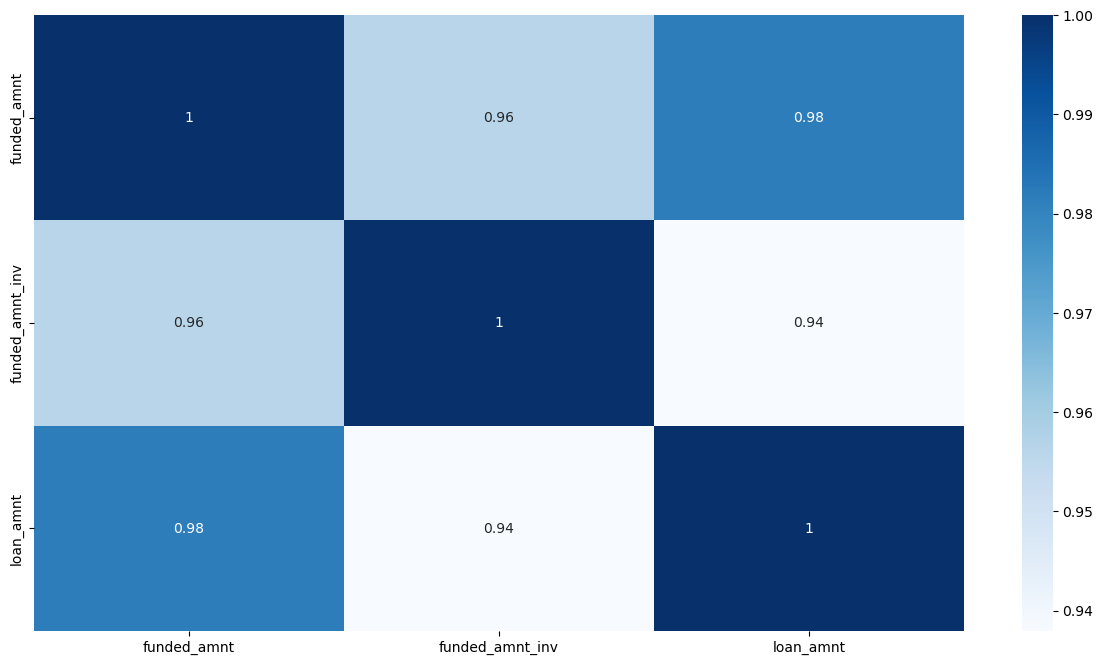

In [280]:
# Identifying key correlations
corr = loan_dataset.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True, cmap='Blues')
plt.show()

In [377]:
#### From above heatmap it is clear that 'funded_amnt', 'funded_amnt_inv', 'loan_amnt' are highly positively corelated and 
#### we can use just the loan_amnt in our further analysis. Removing the remaining 2 column
loan_dataset=loan_dataset.drop(columns=['funded_amnt', 'funded_amnt_inv'])
loan_dataset.shape

(38577, 17)

### Data Conversion

In [205]:
#### Let first take a look at the remaining columns and there type
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  zip_code              38

#### Following column can be converted to Numerical Variable - term, emp_length and int_rate

In [32]:
## Let first see the existing values.
loan_dataset.term.value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

In [378]:
## Let us remove the ' months' from term and convert it into int
loan_dataset.term = loan_dataset.term.apply(lambda x: int(x.strip().split()[0]))

In [34]:
## New value after conversion
loan_dataset.term.value_counts()

term
36    29096
60     9481
Name: count, dtype: int64

In [283]:
## let's look at some sample data for int_rate
loan_dataset.int_rate.value_counts()[:3]

int_rate
10.99%    913
11.49%    790
7.51%     787
Name: count, dtype: int64

In [379]:
## removing % symbol and converting to float
loan_dataset.int_rate = loan_dataset.int_rate.apply(lambda x: float(x.strip('%')))

In [300]:
## New value after conversion
loan_dataset.int_rate.value_counts().index

Index([10.99, 11.49,  7.51, 13.49,  7.88,  7.49,  9.99,   7.9,  5.42, 11.71,
       ...
       17.46, 22.64, 17.54, 17.34, 18.72, 16.96, 18.36, 16.15, 16.01,  16.2],
      dtype='float64', name='int_rate', length=370)

In [301]:
## let's look at some sample data for emp_length
loan_dataset.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [380]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
loan_dataset['emp_length'] = loan_dataset['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

In [303]:
## Data after conversion
loan_dataset.emp_length.value_counts()

emp_length
10.0    8488
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: count, dtype: int64

####  Converting currency column to float

In [381]:
loan_dataset = loan_dataset.astype({'loan_amnt':'float'})
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  float64
 2   term                  38577 non-null  int64  
 3   int_rate              38577 non-null  float64
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            37544 non-null  float64
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  zip_code              38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

####  Formatting currency related column, interest rate and dti column to 2 digit

In [382]:
for c in ['loan_amnt', 'int_rate', 'dti','installment','annual_inc']:
    loan_dataset[c] = loan_dataset[c].apply(lambda x: round(x,2))

#### Let convert issue_d from object to datetime

In [383]:
loan_dataset['issue_d'] = pd.to_datetime(loan_dataset['issue_d'], format='%b-%y')

### Dropping or imputing rows

In [311]:
loan_dataset['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: count, dtype: int64

In [384]:
### There are NONE values which can be replaced with OTHER
loan_dataset['home_ownership'].replace('NONE', 'OTHER', inplace = True)

In [313]:
### Lets calculate the remaining NA % in existing columns
(loan_dataset.isnull().sum()*100)/len(loan_dataset)

id                      0.000000
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [385]:
#### emp_length and pub_rec_bankruptcies still have NA values
#### Since the percentage is very less and they are evenly distributed across different data points. We 
#### have decided to set 0 value to them
loan_dataset.emp_length.fillna(0,inplace=True)
loan_dataset.pub_rec_bankruptcies.fillna(0,inplace=True)

In [386]:

print(f'Remaining number of Rows are {loan_dataset.shape[0]}')
print(f'Remaining number of Columns are {loan_dataset.shape[1]}')

Remaining number of Rows are 38577
Remaining number of Columns are 17


### Derived Columns

 #### Create new columns to show month and year of loan issue

In [387]:
loan_dataset['issue_month'] = loan_dataset.issue_d.dt.month
loan_dataset['issue_year'] = loan_dataset.issue_d.dt.year

In [388]:
## func to get quantile and lower/upper bound data
iqr_multiplier = 1.5
def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar50 = df[column].quantile(0.50)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile25': quar25,'quartile50':quar50, 'quartile75': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}
def plot_box(df, column):
    sns.boxplot(df[column], orient="v")
    plt.show()

In [325]:
## lets check quantile for some of the fields
print('loan_amnt',get_iqr(loan_dataset, 'loan_amnt'))
print('annual_inc',get_iqr(loan_dataset, 'annual_inc'))
print('int_rate',get_iqr(loan_dataset, 'int_rate'))

loan_amnt {'quartile25': 5300.0, 'quartile50': 9600.0, 'quartile75': 15000.0, 'iqr': 9700.0, 'lower_bound': -9250.0, 'upper_bound': 29550.0}
annual_inc {'quartile25': 40000.0, 'quartile50': 58868.0, 'quartile75': 82000.0, 'iqr': 42000.0, 'lower_bound': -23000.0, 'upper_bound': 145000.0}
int_rate {'quartile25': 8.94, 'quartile50': 11.71, 'quartile75': 14.38, 'iqr': 5.440000000000001, 'lower_bound': 0.7799999999999976, 'upper_bound': 22.540000000000003}


In [389]:
### Based on it,let's create bucket category
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    

In [390]:

loan_dataset['loan_amnt_bucket'] = loan_dataset.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)
loan_dataset['loan_amnt_bucket']= loan_dataset['loan_amnt_bucket'].astype('category')
loan_dataset['annual_inc_bucket'] = loan_dataset.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)
loan_dataset['annual_inc_bucket']= loan_dataset['annual_inc_bucket'].astype('category')
loan_dataset['int_rate_bucket'] = loan_dataset.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)
loan_dataset['int_rate_bucket']= loan_dataset['int_rate_bucket'].astype('category')

In [328]:
## check quantile data for installment
loan_dataset['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [391]:
# Creating categorical buckets for installment
loan_dataset["installment_bucket"] = pd.cut(loan_dataset['installment'], 
                               list(range(0,1401,200)), 
                               labels = ['0 - 200', '200 - 400', '400 - 600', '600 - 800', 
                                         '800 - 1000', '1000 - 12000', '12000+'])

In [ ]:
## check quantile data for installment
loan_dataset['dti'].describe()



In [392]:
# Creating categorical buckets for dti
bins = [0, 5, 10, 15, 20, 25, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25+']  # Corrected label
loan_dataset['dti_bucket'] = pd.cut(loan_dataset['dti'], bins=bins, labels=labels, right=False)


In [393]:
### checking current shape of dataset

print(f'Remaining number of Rows are {loan_dataset.shape[0]}')
print(f'Remaining number of Columns are {loan_dataset.shape[1]}')

Remaining number of Rows are 38577
Remaining number of Columns are 24


In [ ]:
##### We are done with data cleaning and conversion step
#### Let move toward  Analysis now

## Univerate Analysis

In [456]:
#### Defining all the required labels for all the columns
column_titles = {
    'loan_amnt': 'Loan Amount',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_year': 'Issue Year',
    'issue_month': 'Issue Month',
    'loan_amnt_bucket': 'Loan Amount Bins',
    'installment_bucket': 'Installment Bins',
    'funded_amnt_inv_bucket': 'Investor Funded Bins',
    'funded_amnt_bucket': 'Funded Amount Bins',
    'annual_inc_bucket': 'Annual Income Bins',
    'int_rate_bucket': 'Interest Rate Bins',
    'dti_bucket': 'DTI Bins'
}

In [395]:
#### Define common function that can be used to plot graphs

## This function will plot a dist and box plot for column passed
def univariate_analysis_dist_box_plot(df, column):
    """
    Generates a distplot and box plot.

    Args:
        df: DataFrame.
        column: Column for which graph will be plotted
    """
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()
    
def plot_count_percentage(df,column):
 plt.figure(figsize=(10,6))
 """
    Generates a bar chart containing percentage of column values.

    Args:
        df: DataFrame.
        column: Column for which bar chart will be plotted
 """
 colors = sns.color_palette('viridis')
 ax = (df[column].value_counts(normalize=True)*100).plot.bar(color=colors)
 plt.ylabel('Percentage')
 plt.xlabel(column_titles[column])
 plt.title(f'Distribution of {column_titles[column]}')
 plt.xticks(rotation=45, ha='right')
 for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')
 plt.tight_layout()
 plt.show()    


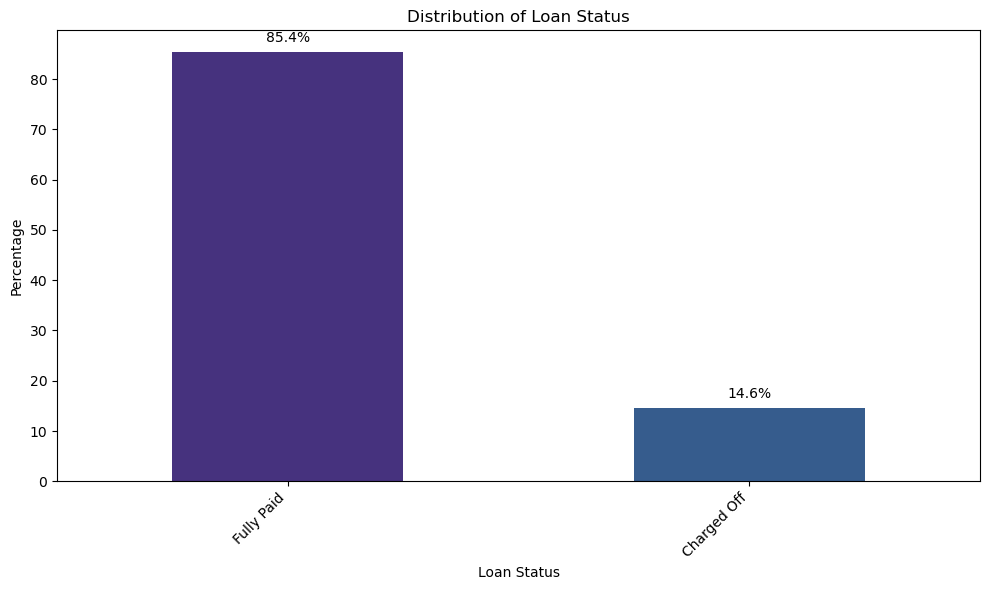

In [396]:
## Let see percentage of loan application that charged off or fully paid 
plot_count_percentage(loan_dataset,'loan_status')

In [162]:
#### Around 14.6% of the laon are charged off.Which is high by industry standard

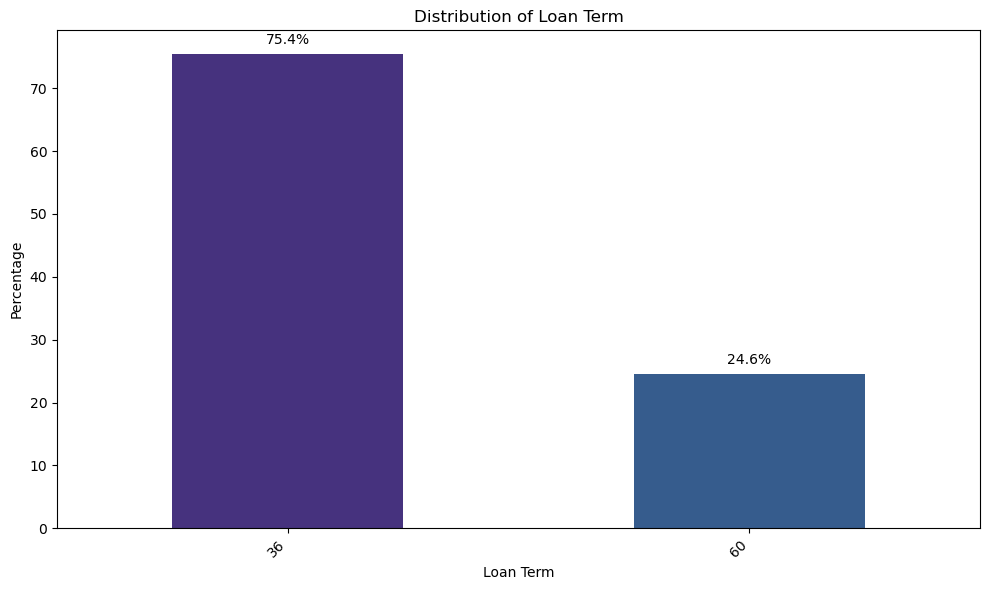

In [397]:

## Let see percentage of laon per term
plot_count_percentage(loan_dataset,'term')


In [ ]:
#### 3/4 of loan is for 36 month and 1/4 is for 60 month. Higher term usually result in default by industry standards

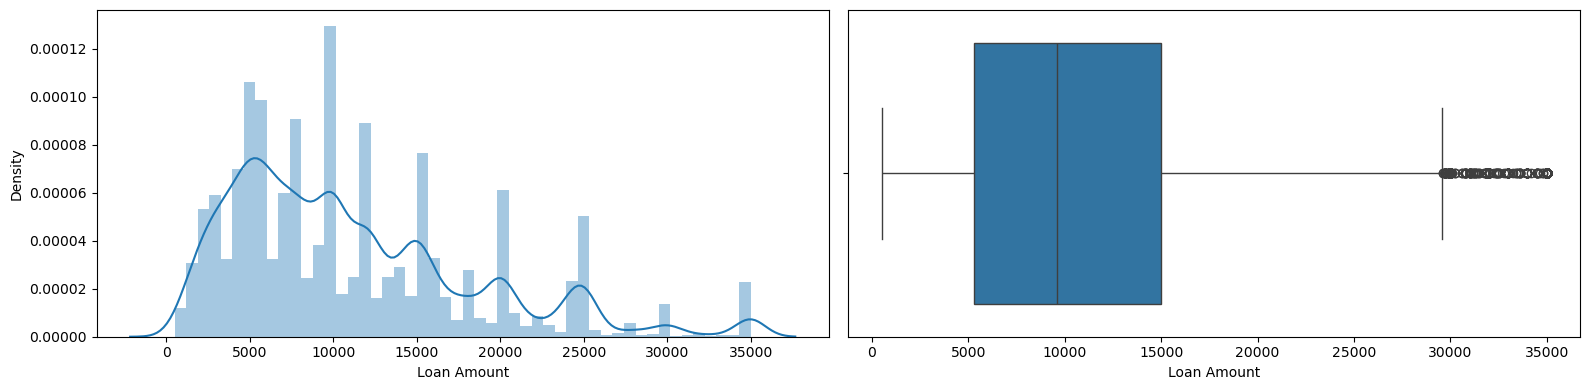

In [398]:
univariate_analysis(loan_dataset,'loan_amnt')

In [ ]:
#### Based on both the histogram and the box plot, the majority of loan amounts are concentrated between $5,000 and $15,000,
#### with a particularly high concentration between $5,000 and $10,000. Loan amounts above $20,000 are much less frequent.

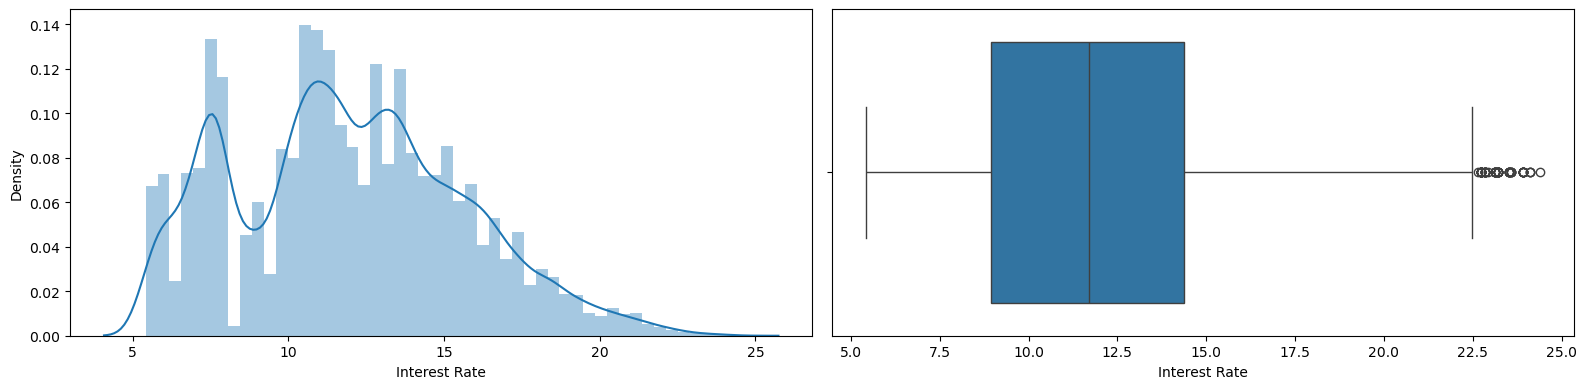

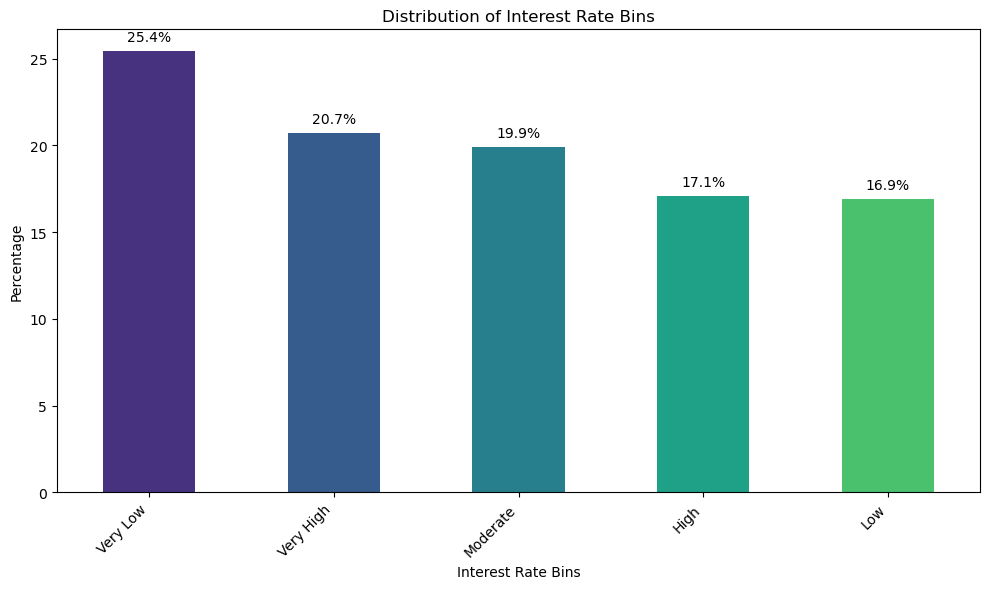

In [406]:
univariate_analysis(loan_dataset,'int_rate')
plot_count_percentage(loan_dataset,'int_rate_bucket')

In [448]:
### There appear to be two main peaks:
 #  - One around 7-8%
 #  - Another around 10-12%
### Skewness: The distribution is slightly right-skewed (or positively skewed),
 #     meaning there's a tail extending towards higher interest rates. 
 #     This indicates that most loans have lower interest rates, with fewer loans having very high rates.
### The interest rates range from approximately 5% to 15%.
### The right skewness and outliers indicate that some borrowers are paying significantly higher interest rates. 
#       This might be due to lower credit scores, higher risk loans, or specific loan characteristics.

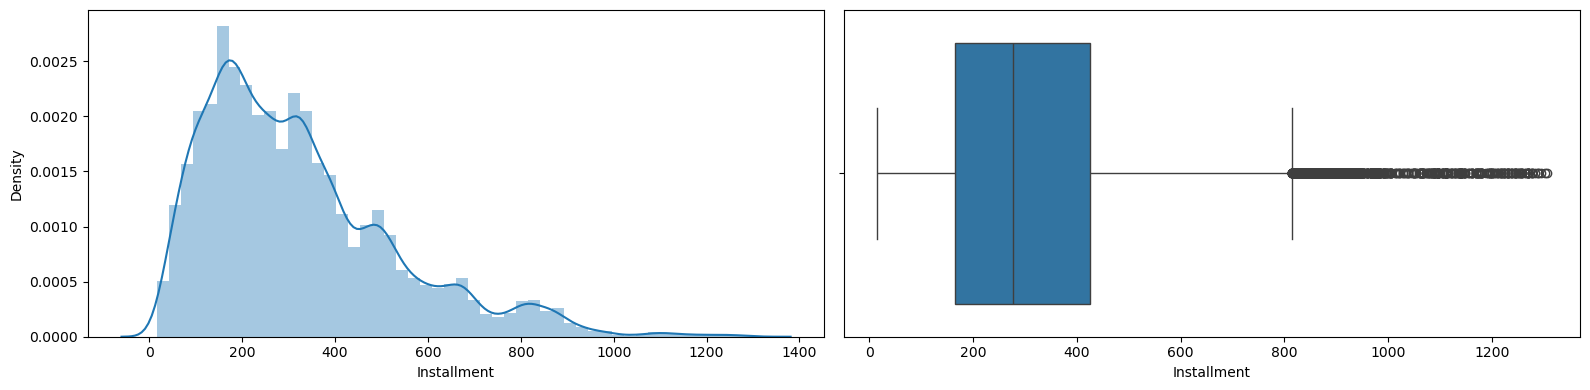

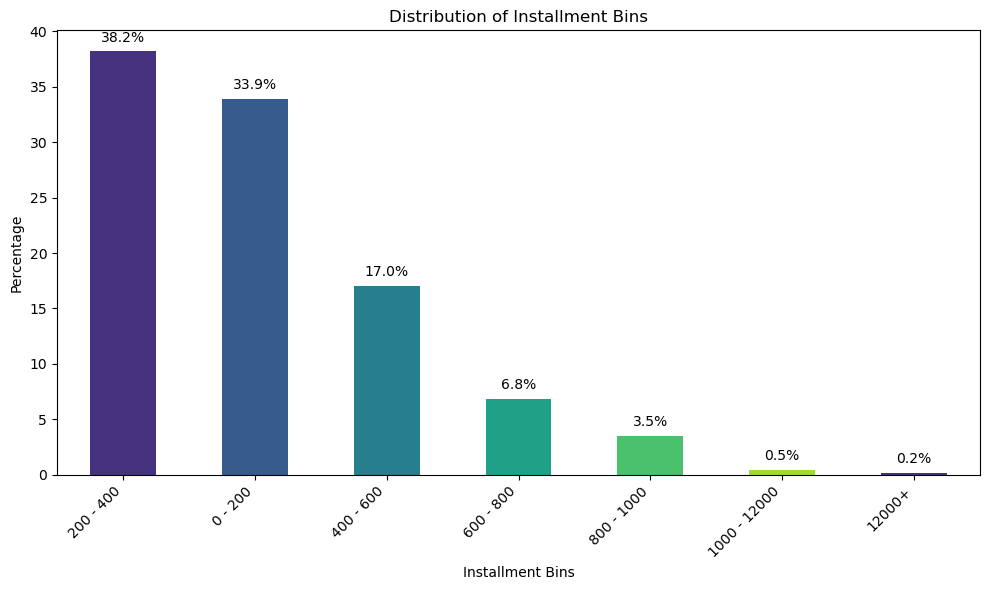

In [405]:
univariate_analysis(loan_dataset, 'installment')
plot_count_percentage(loan_dataset,'installment_bucket')

In [433]:
#### Most of installment lies between 200 to 400.


id  loan_amnt  term  int_rate  installment grade  emp_length  \
30107  513542     5000.0    36     12.73       167.84     C        10.0   

      home_ownership  annual_inc verification_status    issue_d loan_status  \
30107       MORTGAGE   6000000.0     Source Verified 2010-05-01  Fully Paid   

                purpose zip_code addr_state   dti  pub_rec_bankruptcies  \
30107  home_improvement    939xx         CA  0.01                   0.0   

       issue_month  issue_year loan_amnt_bucket annual_inc_bucket  \
30107            5        2010           0 - 5K       80k - above   

      int_rate_bucket installment_bucket dti_bucket  
30107        Moderate            0 - 200        0-5

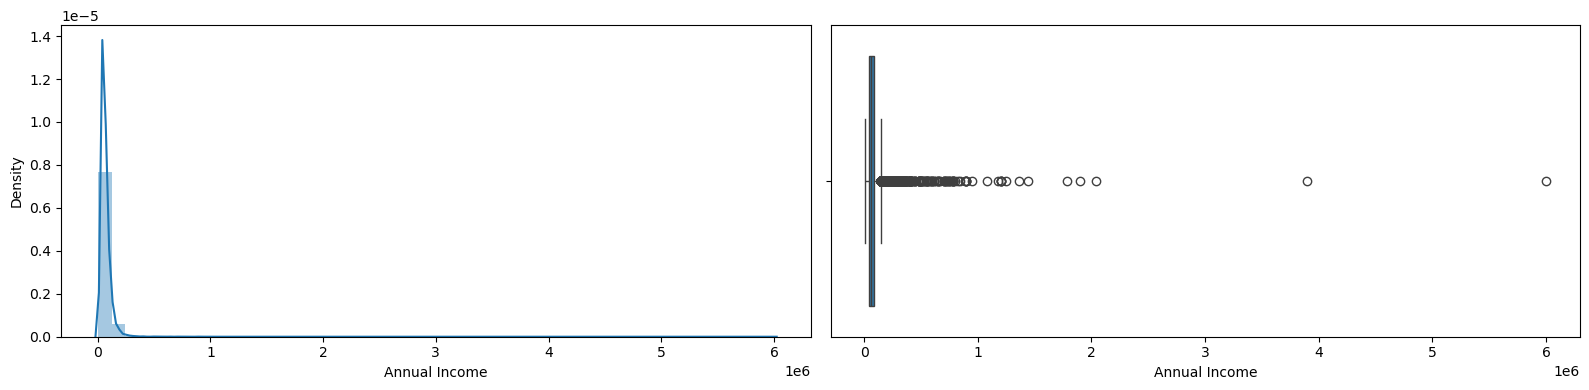

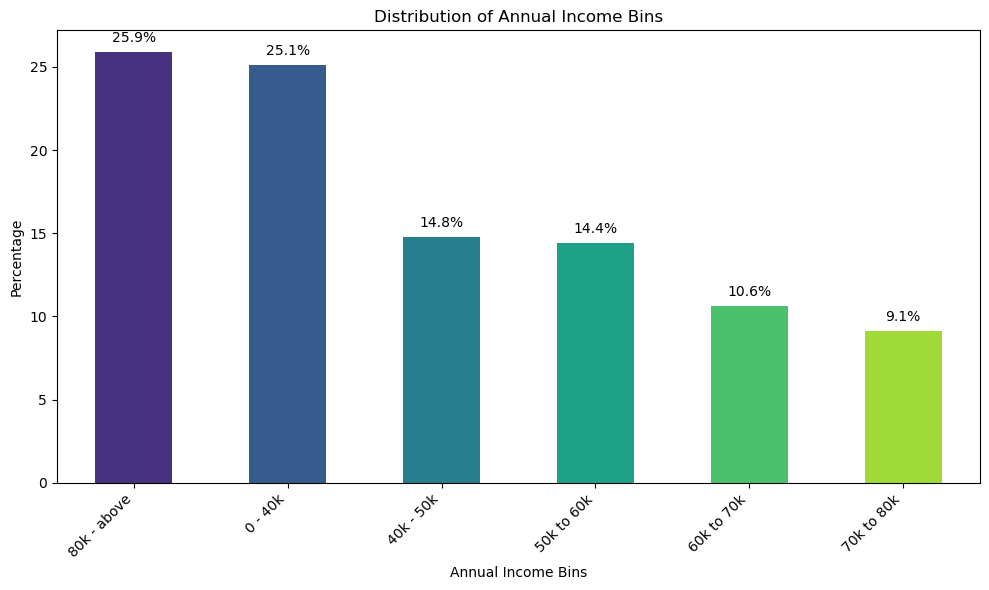

In [424]:
univariate_analysis(loan_dataset, 'annual_inc')
plot_count_percentage(loan_dataset, 'annual_inc_bucket')

In [434]:
#### There are applicant with very high income.

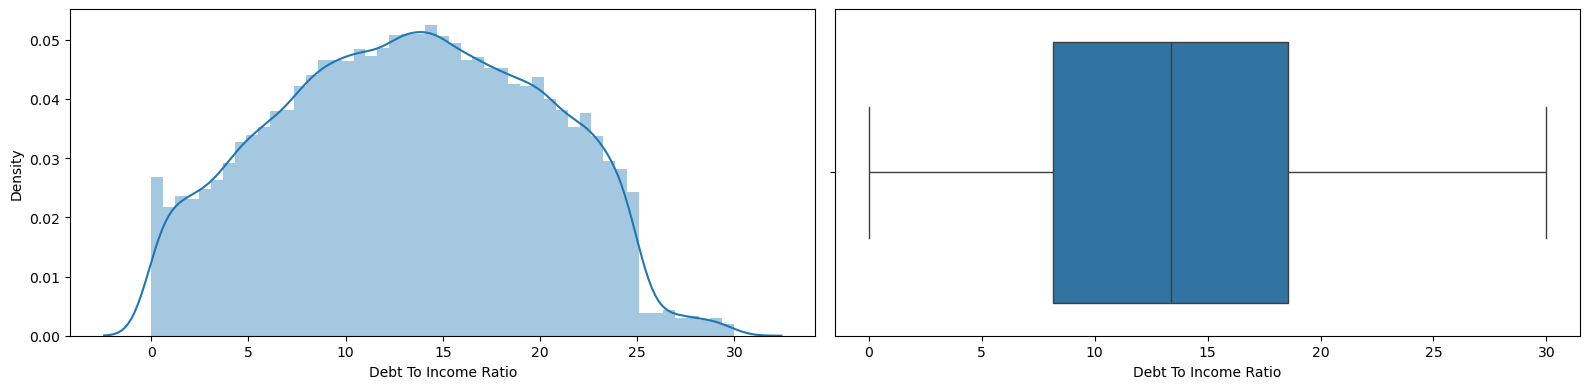

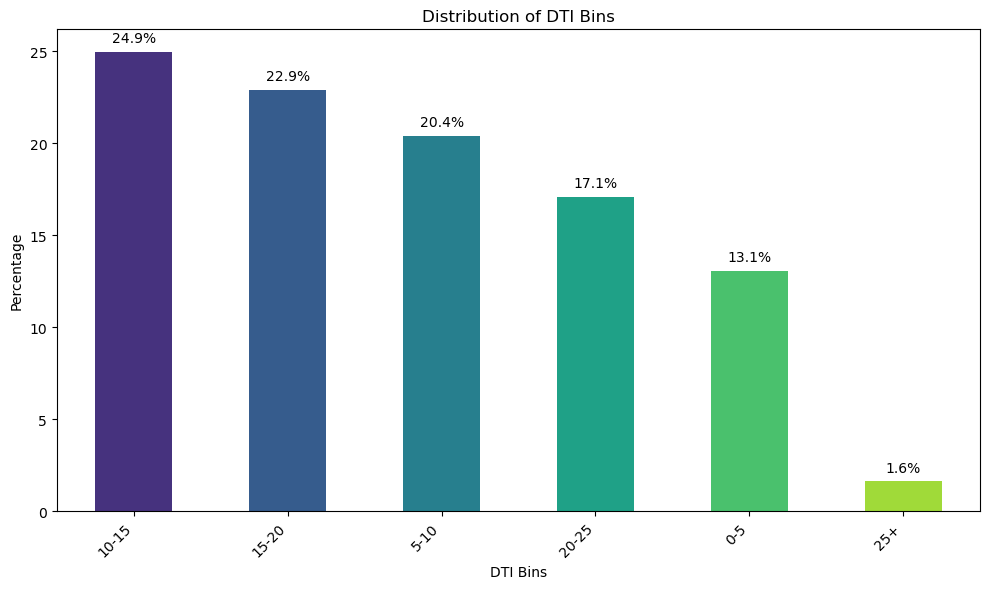

In [438]:
univariate_analysis(loan_dataset, 'dti')
plot_count_percentage(loan_dataset, 'dti_bucket')

In [440]:
#Dti is between 8-18

<Axes: xlabel='home_ownership'>

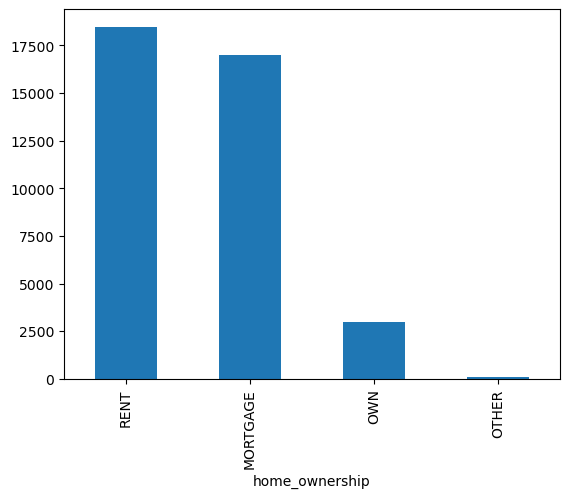

In [439]:
loan_dataset['home_ownership'].value_counts().plot.bar()

In [ ]:
## Majority of applicant does not have own house

<Axes: xlabel='purpose'>

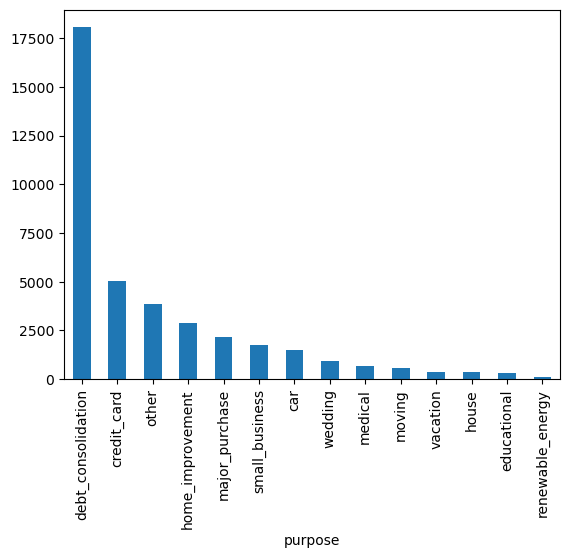

In [408]:
loan_dataset['purpose'].value_counts().plot.bar()

In [ ]:
## Majority of the loan application is for debt consolidation and credit card

<Axes: xlabel='grade'>

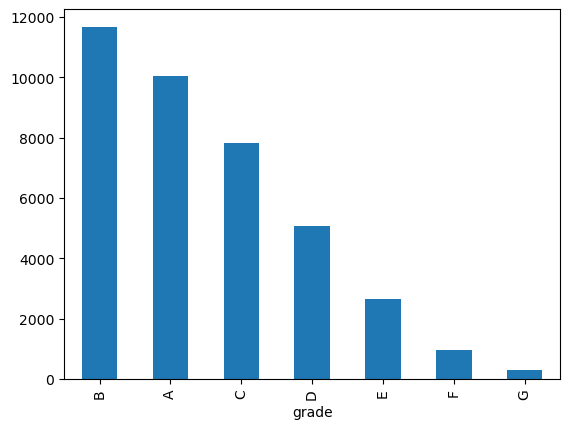

In [410]:
loan_dataset['grade'].value_counts().plot.bar()

In [411]:
## Grade B has most number of loan record

<Axes: xlabel='emp_length'>

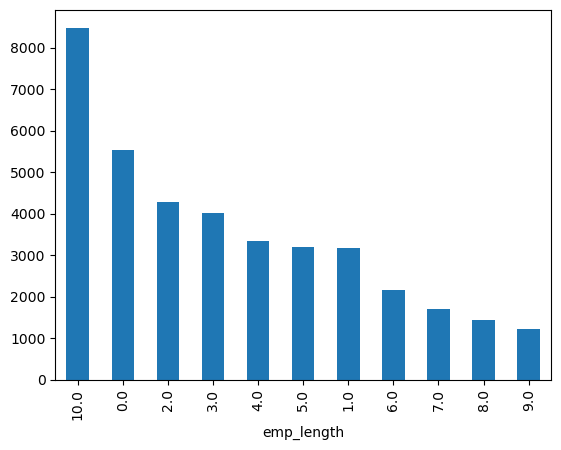

In [417]:
loan_dataset['emp_length'].value_counts().plot.bar()

In [ ]:
## Max number of the employee has 10+ experience

<Axes: xlabel='pub_rec_bankruptcies'>

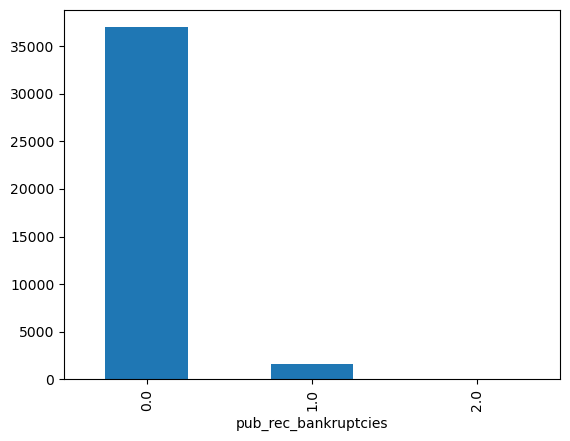

In [416]:
loan_dataset['pub_rec_bankruptcies'].value_counts().plot.bar()

In [ ]:
## most of the loan applicant does not have a record of bankruptcies

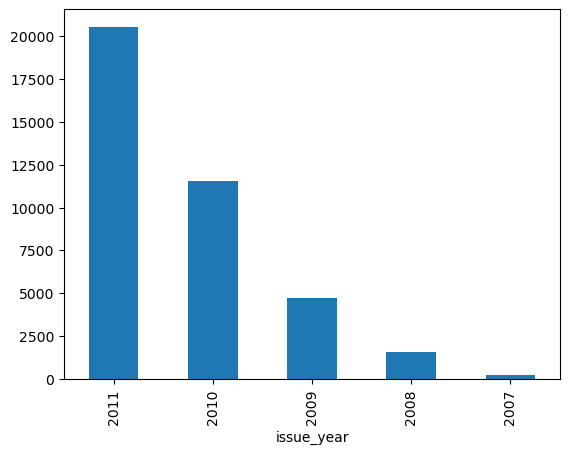

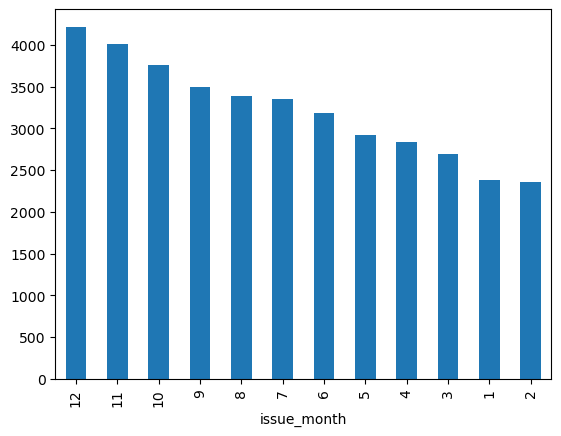

In [449]:
loan_dataset['issue_year'].value_counts().plot.bar()
plt.show()
loan_dataset['issue_month'].value_counts().plot.bar()
plt.show()

In [ ]:
### Gradual increase in count of loan application over year
### Most the loan are taken in the last quarter.


<Axes: xlabel='addr_state'>

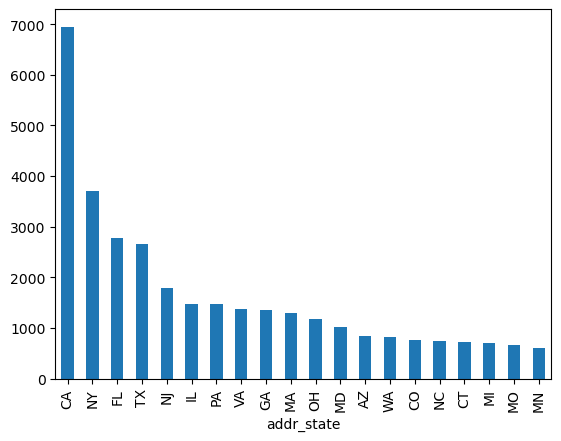

In [453]:
loan_dataset.addr_state.value_counts()[:20].plot.bar()

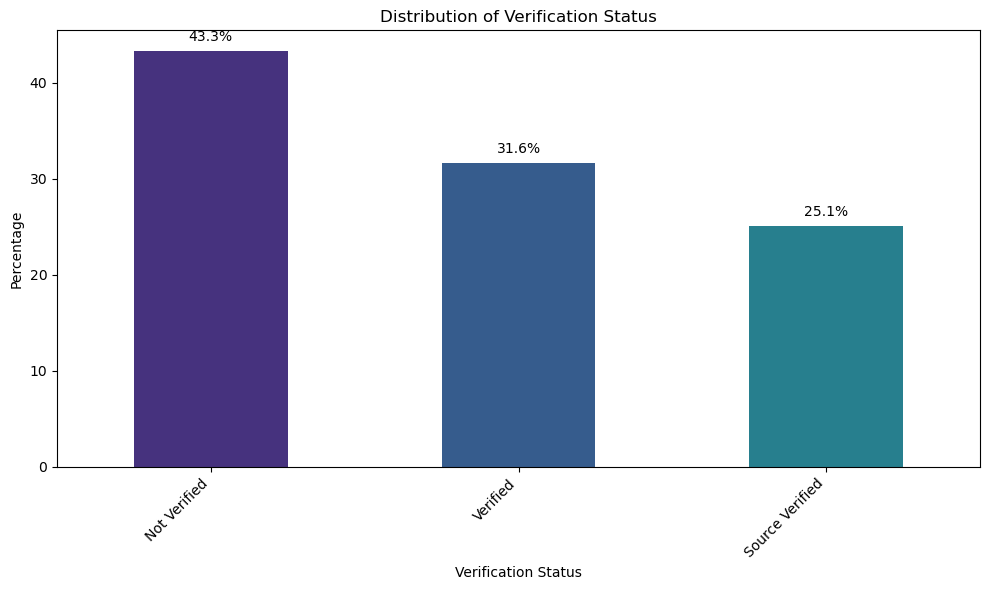

In [442]:

plot_count_percentage(loan_dataset, 'verification_status')

<Axes: xlabel='installment_bkt'>

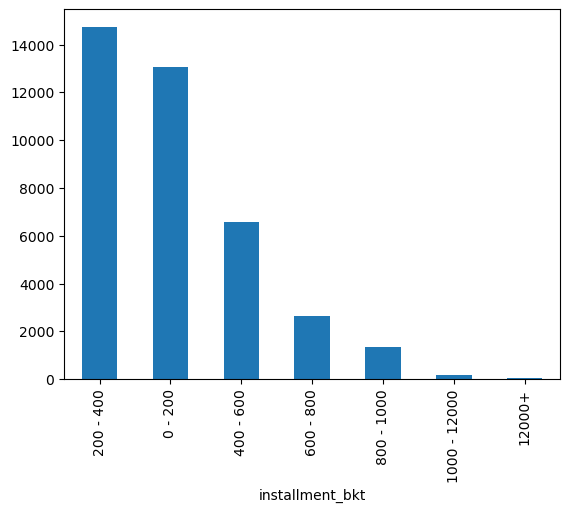

In [78]:
## more than 40% of the application is not verified

## Univariate Analysis Summary

 - We have a very high percentage of charged off loan which greater than industry standard.
 - Majority of the loan (75%) has 36month term. 1/4 of the loan is for 60 month. Usually high term result in default.
 - majority of loan amounts are concentrated between 5,000 and 15,000
 - Majority of interest rate is between 5 to 15.
 - Some borrowers are paying significantly higher interest rates. 
   This might be due to lower credit scores, higher risk loans, or specific loan characteristics.    
 - Debit consolidation and credit card is the most common reason to take loan
 - Most of the loan are taken in the last quarter of the year. This fits with the loan purpose. As people usually try to clear their debt by EOY
 - There is gradual increase in number of loans per year
 - Majority of the loan applicant has 10+ year of exp.
 - Majority of loan has B grade. Overall most of them has high grade.
 - Most of the loan applicant does not own house. They are rented or mortaged.
 - Max number of loan have 200- 400 installment amount
 
 

## Bivariate Analysis

In [530]:
## Common bivariate plot function

def plot_by_counts_and_percentage(df, xaxis_column , yaxis_column, order=None):
    """
    Plots the percentage and count of a given column by loan status.

    Args:
        df: The loan dataset DataFrame.
        column_name: The name of the column to plot.
    """

    if xaxis_column not in df.columns:
        raise ValueError(f"Column '{xaxis_column}' not found in DataFrame.")
    elif yaxis_column not in df.columns:
        raise ValueError(f"Column '{yaxis_column}' not found in DataFrame.")


    # Calculate percentages
    status_counts_percent = df.groupby(yaxis_column)[xaxis_column].value_counts(normalize=True).mul(100).rename('percent').reset_index()

    # Calculate counts
    status_counts = df.groupby(yaxis_column)[xaxis_column].value_counts().rename('count').reset_index()

    # Create the plot using GridSpec
    fig = plt.figure(figsize=(16, 16))
    gs = gridspec.GridSpec(2, 1)

    # Percentage Plot
    ax0 = plt.subplot(gs[1])
    sns.barplot(x=yaxis_column, y='percent', hue=xaxis_column, data=status_counts_percent,order= order, palette=['#1f77b4','#ff7f0e'], ax=ax0)
    ax0.set_ylabel('Percentage')
    ax0.set_title(f'Percentage of {column_titles[yaxis_column]} by {column_titles[xaxis_column]}')
    ax0.tick_params(axis='x', rotation=45, labelsize = 10)
    for p in ax0.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax0.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=9)

    # Count Plot
    ax1 = plt.subplot(gs[0])
    sns.countplot(x=yaxis_column, hue=xaxis_column, data=df,order=order, palette=['#1f77b4','#ff7f0e'], ax=ax1)
    ax1.set_ylabel('Count')
    ax1.set_title(f'Count of {column_titles[yaxis_column]} by {column_titles[xaxis_column]}')
    ax1.tick_params(axis='x', rotation=45, labelsize = 10)
    for p in ax1.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),  # Format as integer
                        ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=12)

    plt.tight_layout()
    plt.show()

def plot_column_kde_by_loan_status(df,columnName):
    """Plots KDE of column name by loan status."""

    # Filter out 'Current' loans
    df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[df['loan_status'] == 'Fully Paid'][columnName], label='Fully Paid')
    sns.kdeplot(df[df['loan_status'] == 'Charged Off'][columnName], label='Charged Off')
    plt.xlabel(f'{column_titles[columnName]}')
    plt.ylabel('Density')
    plt.title(f'{column_titles[columnName]} KDE by Loan Status')
    plt.legend()
    plt.show()
    
def plot_violin_by_loan_status(df, numerical_column):
    """
    Plots a violin plot of a numerical column by loan status.

    Args:
        df: The loan dataset DataFrame.
        numerical_column: The name of the numerical column.
    """

    if numerical_column not in df.columns:
        raise ValueError(f"Column '{numerical_column}' not found in DataFrame.")

    # Filter out 'Current' loans
    df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

    plt.figure(figsize=(8, 6))
    sns.violinplot(x='loan_status', y=numerical_column, data=df, palette=['#1f77b4','#ff7f0e'])
    plt.ylabel(numerical_column)
    plt.xlabel('Loan Status')
    plt.title(f'{numerical_column} Distribution by Loan Status')
    plt.show()



def plot_column_histograms_by_loan_status(df,columnName):
    """Plots histograms of interest rates by loan status."""

    # Filter out 'Current' loans
    df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

    plt.figure(figsize=(8, 6))
    plt.hist(df[df['loan_status'] == 'Fully Paid'][columnName], alpha=0.5, label='Fully Paid')
    plt.hist(df[df['loan_status'] == 'Charged Off'][columnName], alpha=0.5, label='Charged Off')
    plt.xlabel(f'{column_titles[columnName]}')
    plt.ylabel('Frequency')
    plt.title(f'{column_titles[columnName]} Histograms by Loan Status')
    plt.legend()
    plt.show()
    
def plot_emp_length_by_status_grade(df):
    """Plots a heatmap of employment length counts by loan status and grade."""

    grouped_data = df.groupby(by=['loan_status', 'grade'])['emp_length'].value_counts().rename('count').unstack(level = 2, fill_value = 0)
    # Pivot the table to make 'emp_length' the columns
    #grouped_data = grouped_data.unstack(level=2, fill_value=0)
    #grouped_data = grouped_data.stack()
    #grouped_data = grouped_data.stack()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(grouped_data, annot=True, fmt='d', cmap='YlGnBu')  # fmt='d' for integer formatting
    plt.title('Employment Length Counts by Loan Status and Grade')
    plt.ylabel('Loan Status, Grade')
    plt.xlabel('Employment Length')
    plt.show()
def generic_multivariate_scatter(df, x_col, y_col, hue_col=None, title=None, figsize=(8, 6)):
    """
    Generates a multivariate scatter plot.

    Args:
        df: Pandas DataFrame.
        x_col: Name of the column for the x-axis.
        y_col: Name of the column for the y-axis.
        hue_col: (Optional) Name of the column for coloring the points (categorical).
        title: (Optional) Title of the plot. If None, a default title is generated.
        figsize: (Optional) Tuple specifying the figure size.
    """

    plt.figure(figsize=figsize)

    if hue_col:
        sns.scatterplot(x=x_col, y=y_col, data=df, hue=hue_col)
    else:
        sns.scatterplot(x=x_col, y=y_col, data=df)

    if title is None:
        title = f"{x_col.replace('_', ' ').title()} vs. {y_col.replace('_', ' ').title()}"
        if hue_col:
            title += f" (Colored by {hue_col.replace('_', ' ').title()})"
    plt.title(title)

    plt.xlabel(x_col.replace('_', ' ').title())
    plt.ylabel(y_col.replace('_', ' ').title())
    plt.show()



def plot_multiple_scatter(df, plot_pairs, hue_col=None,figsize=(8,6)):
    """Plots multiple scatter plots based on pairs of columns.

    Args:
        df: The Pandas DataFrame.
        plot_pairs: A list of tuples, where each tuple contains (x_column_name, y_column_name, title).
        hue_col: (Optional) Name of the column for coloring the points (categorical).
    """
    for x_col, y_col, title in plot_pairs:
        generic_multivariate_scatter(df, x_col, y_col, hue_col, title,figsize)


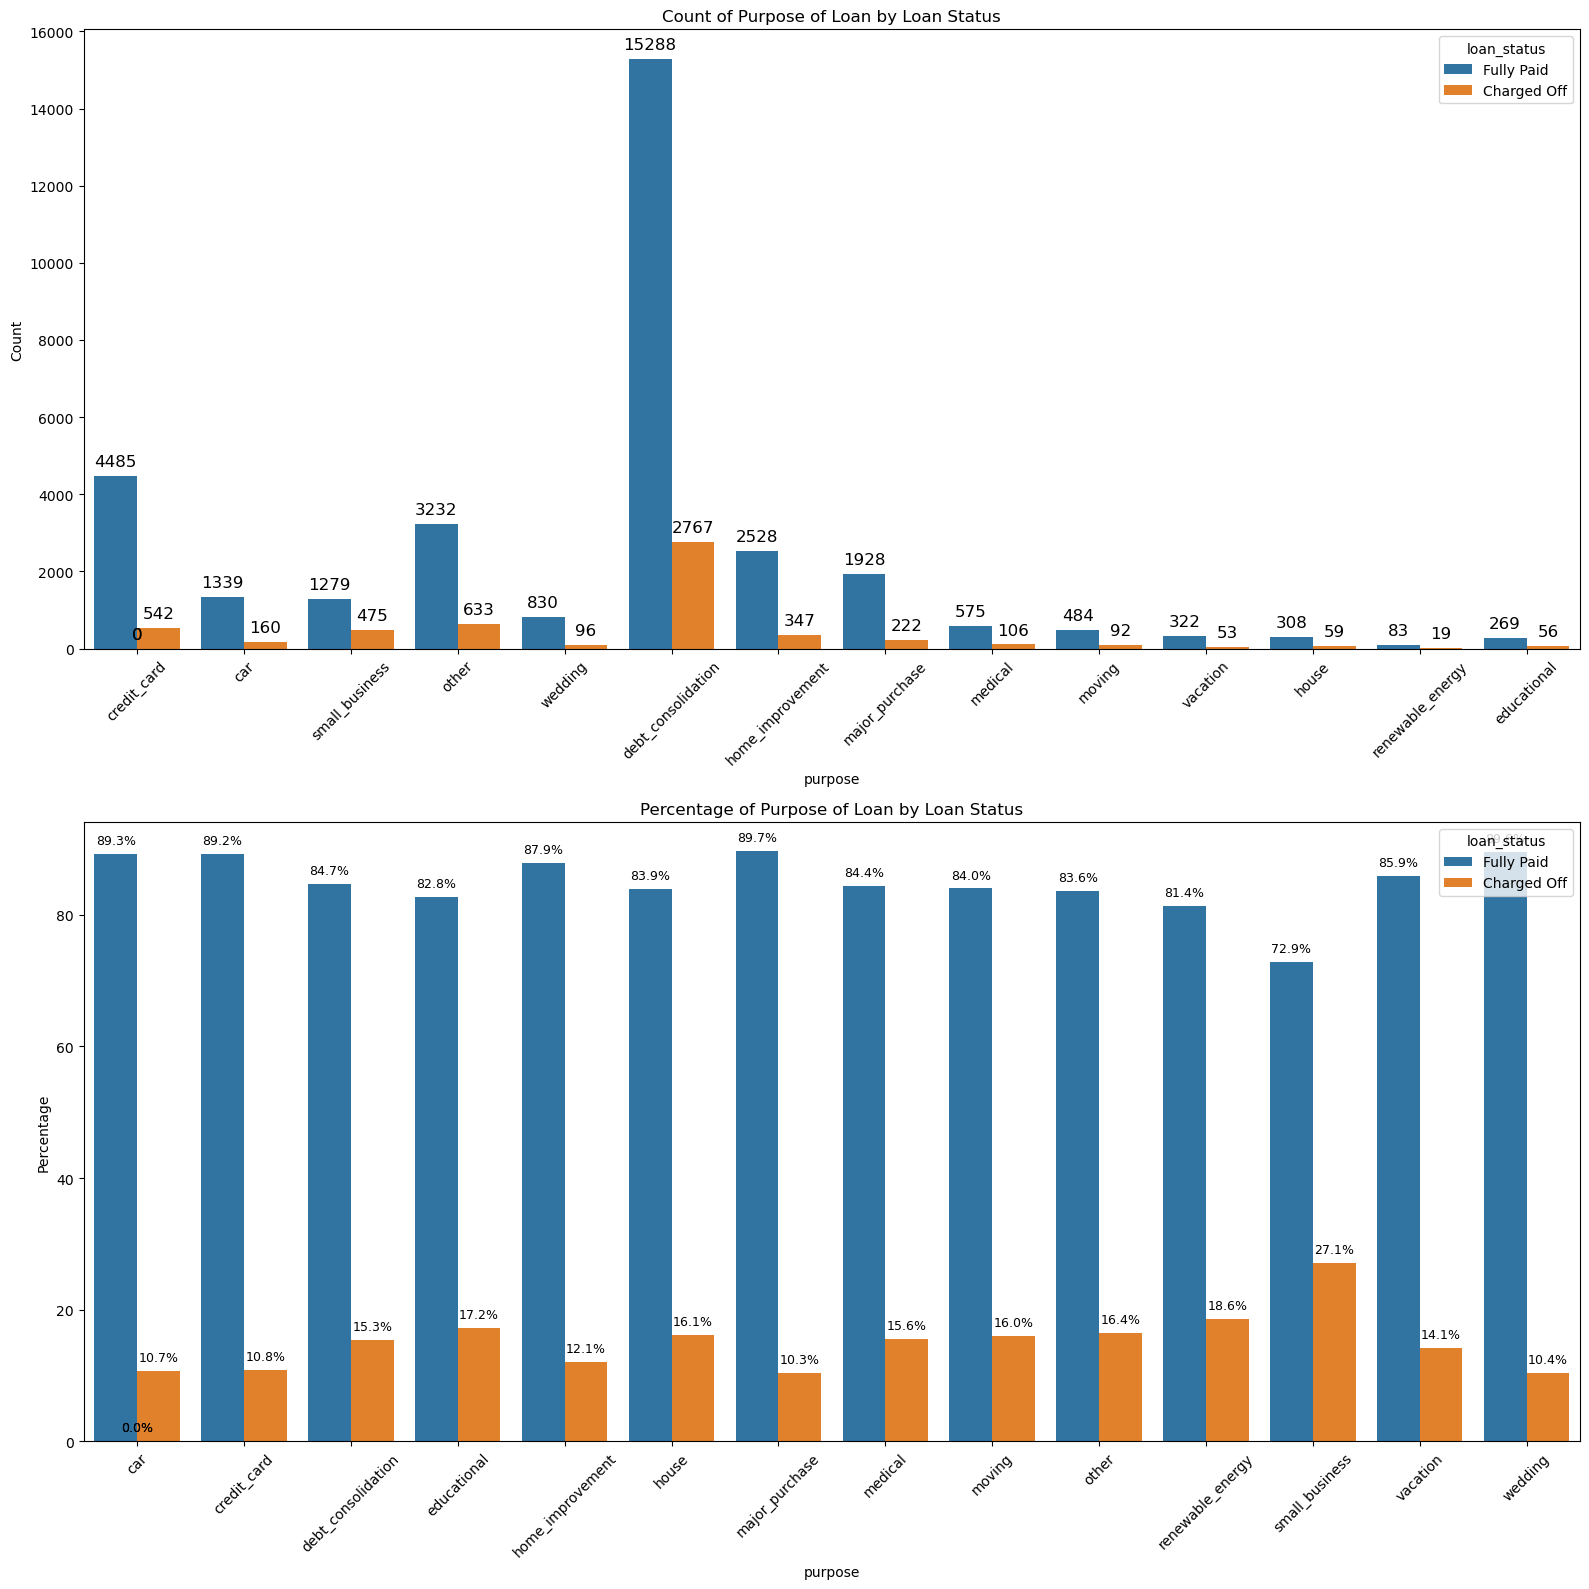

In [461]:
### Purpose vs Loan Status
plot_by_counts_and_percentage(loan_dataset, 'loan_status', 'purpose')
plt.figure(figsize=(12, 8))
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data=loan_dataset[loan_dataset['loan_status'].isin(['Charged Off', 'Fully Paid'])])
plt.xticks(rotation=45, ha='right')
plt.title('Interest Rate Distribution by Purpose and Loan Status')
plt.show()

In [ ]:
#### The percentage of charge off is similar across all the purpose of loan. But the count of debt_consolidation related loan application 
#### is high, resulting in higher charge off loans

In [471]:
### Loan Amount Bins vs Loan Status

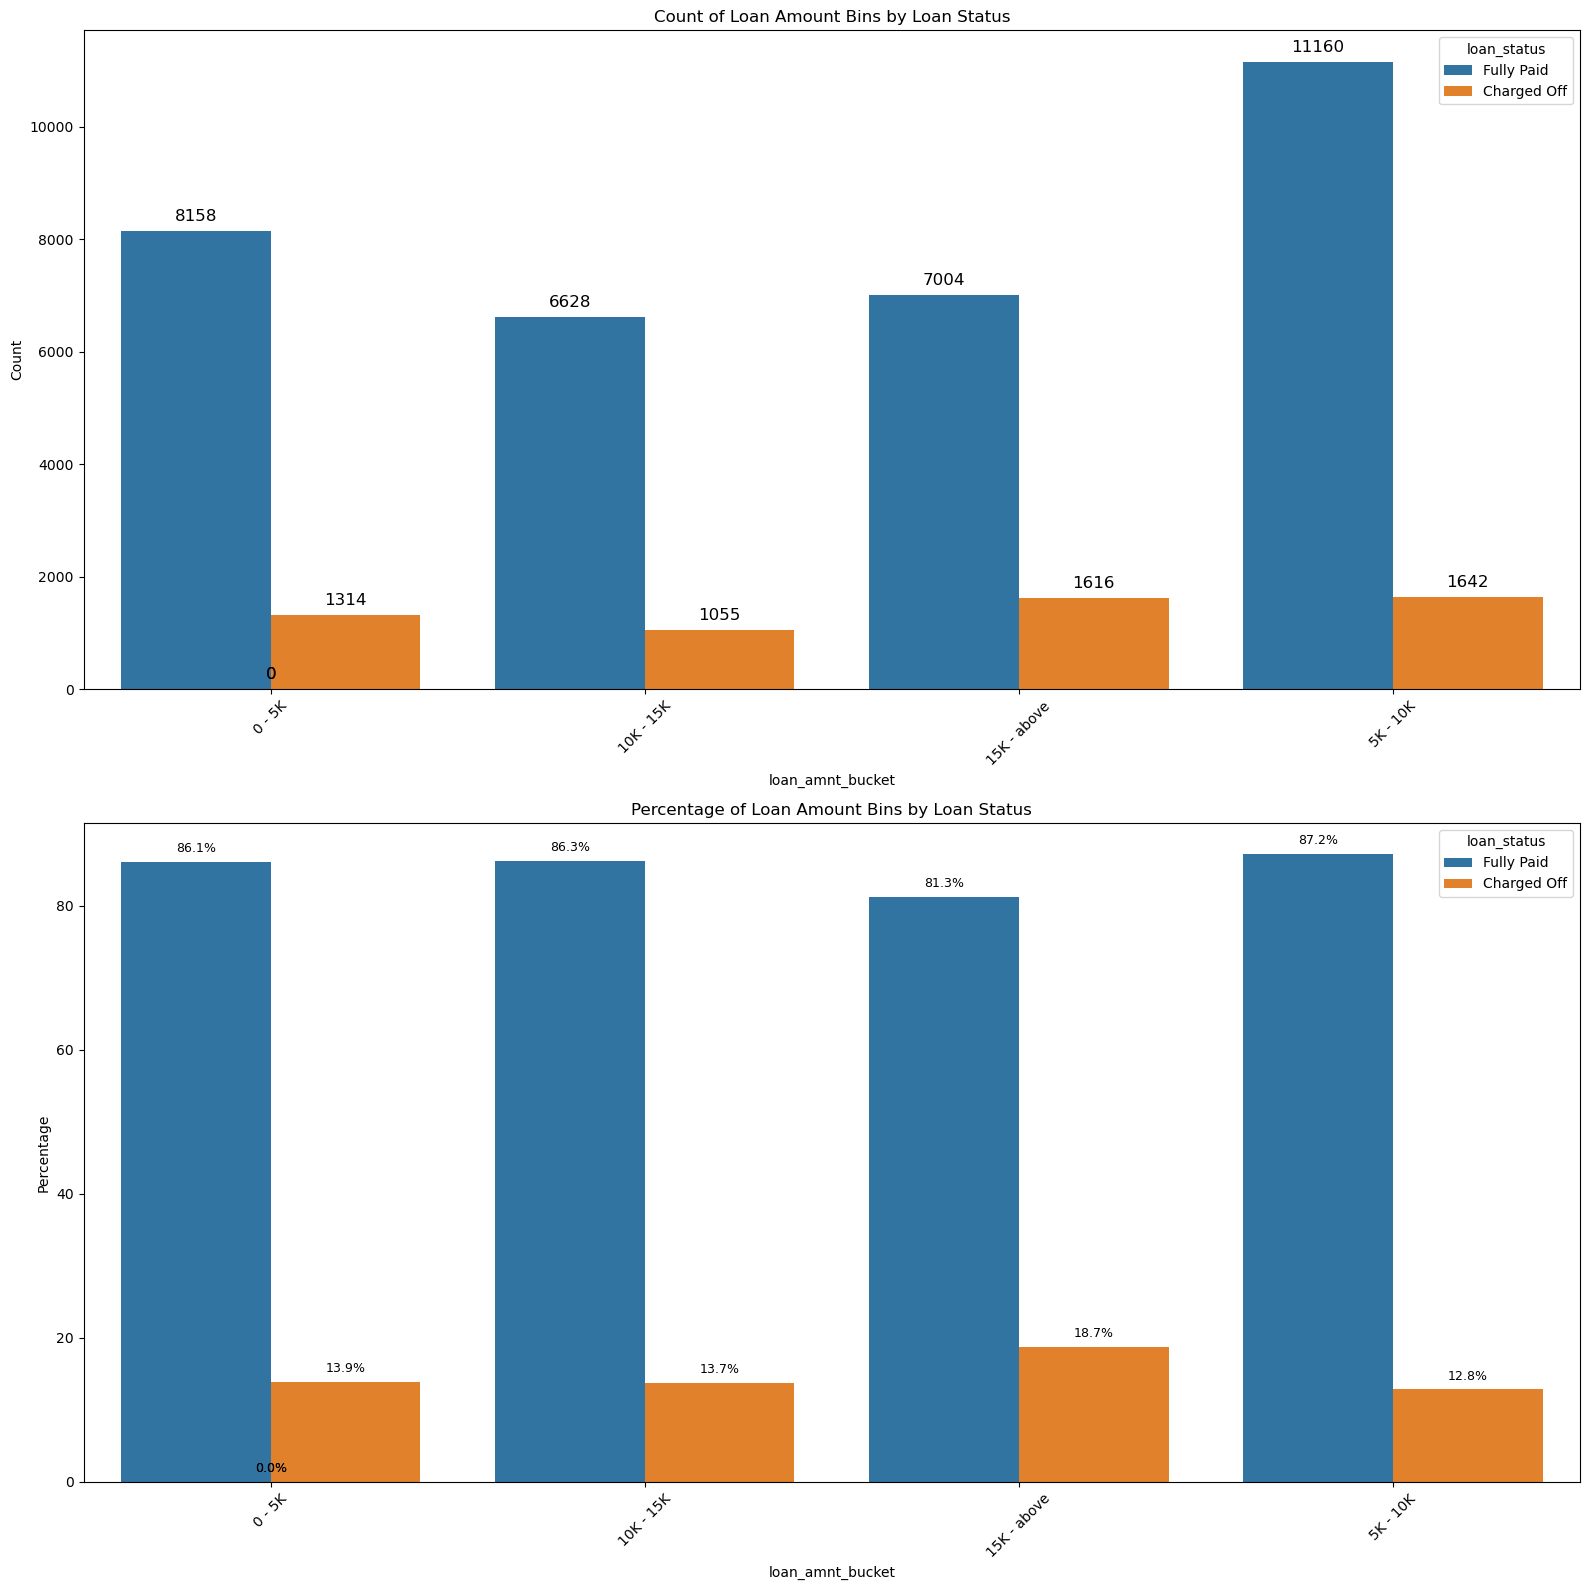

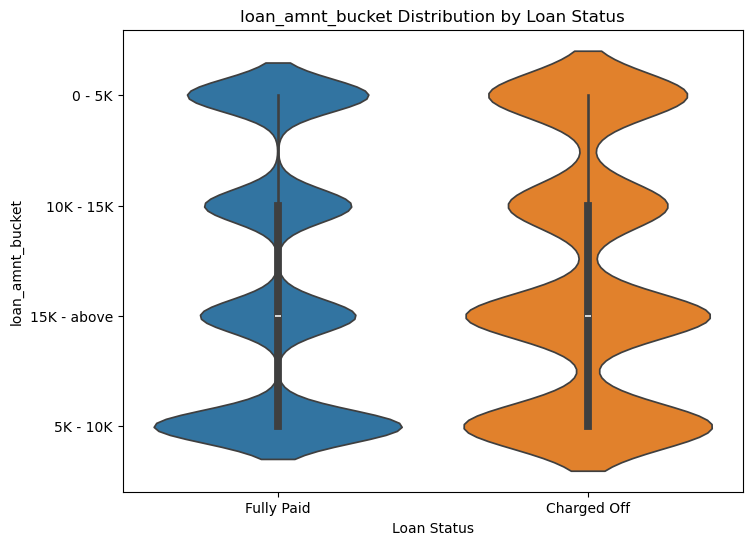

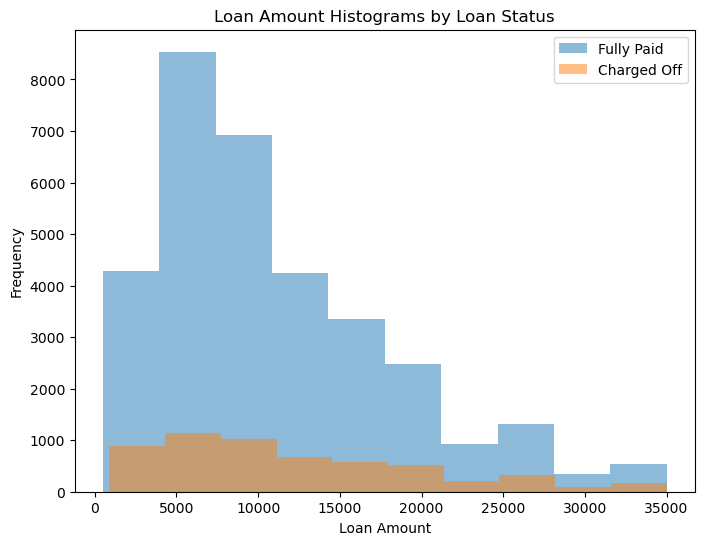

In [475]:
bucket_order = loan_dataset['loan_amnt_bucket'].unique()

def key_function(x):
    try:
      return int(x.split('K')[0].replace('0 - ','').replace(' - ',''))
    except:
      return int(x.split('- ')[0].replace('0',''))

bucket_order = sorted(bucket_order, key=key_function)

plot_by_counts_and_percentage(loan_dataset, 'loan_status', 'loan_amnt_bucket')
plot_violin_by_loan_status(loan_dataset,'loan_amnt_bucket')
plot_column_histograms_by_loan_status(loan_dataset,'loan_amnt')

In [489]:
##most of the charge off happening in 5600 to 16500 loan amount. Even in it 5k to 10k is very high
## we need to check the relationship between loan amount and interest rate
loan_dataset[loan_dataset.loan_status=='Charged Off'].groupby(by = ['int_rate_bucket','loan_amnt_bucket'])['id'].count()
## We can see Very High interest rate.

verification_status  loan_amnt_bucket
Not Verified         0 - 5K               708
                     10K - 15K            383
                     15K - above          253
                     5K - 10K             798
Source Verified      0 - 5K               387
                     10K - 15K            316
                     15K - above          292
                     5K - 10K             439
Verified             0 - 5K               219
                     10K - 15K            356
                     15K - above         1071
                     5K - 10K             405
Name: id, dtype: int64

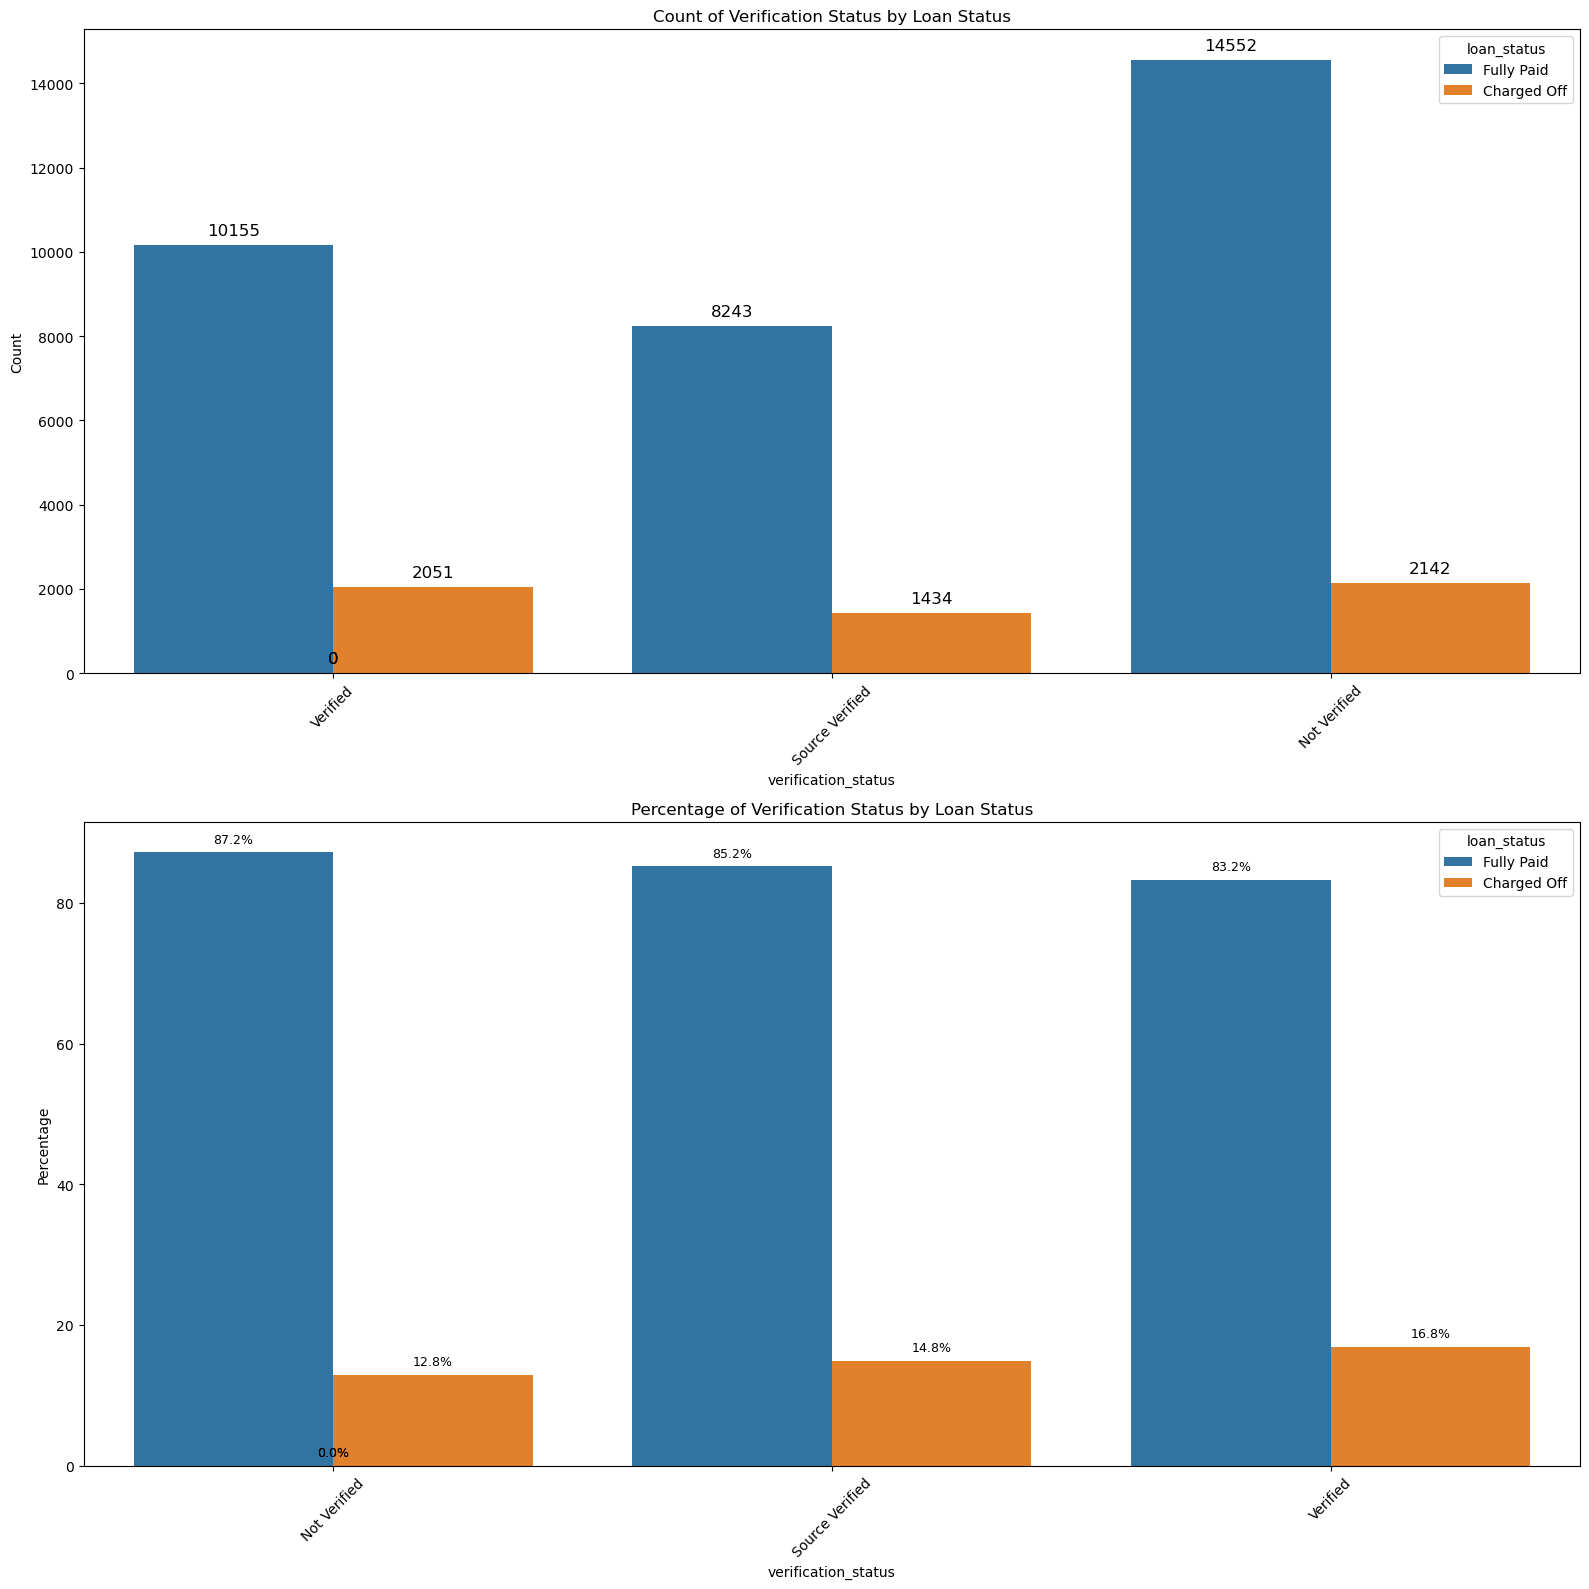

In [488]:
### Loan Amount Bins vs Loan Status
plot_by_counts_and_percentage(loan_dataset, 'loan_status',  'verification_status')

In [85]:
#### Ratio of charge off is high for Verified application. 
## This point to either incompentency or corruption

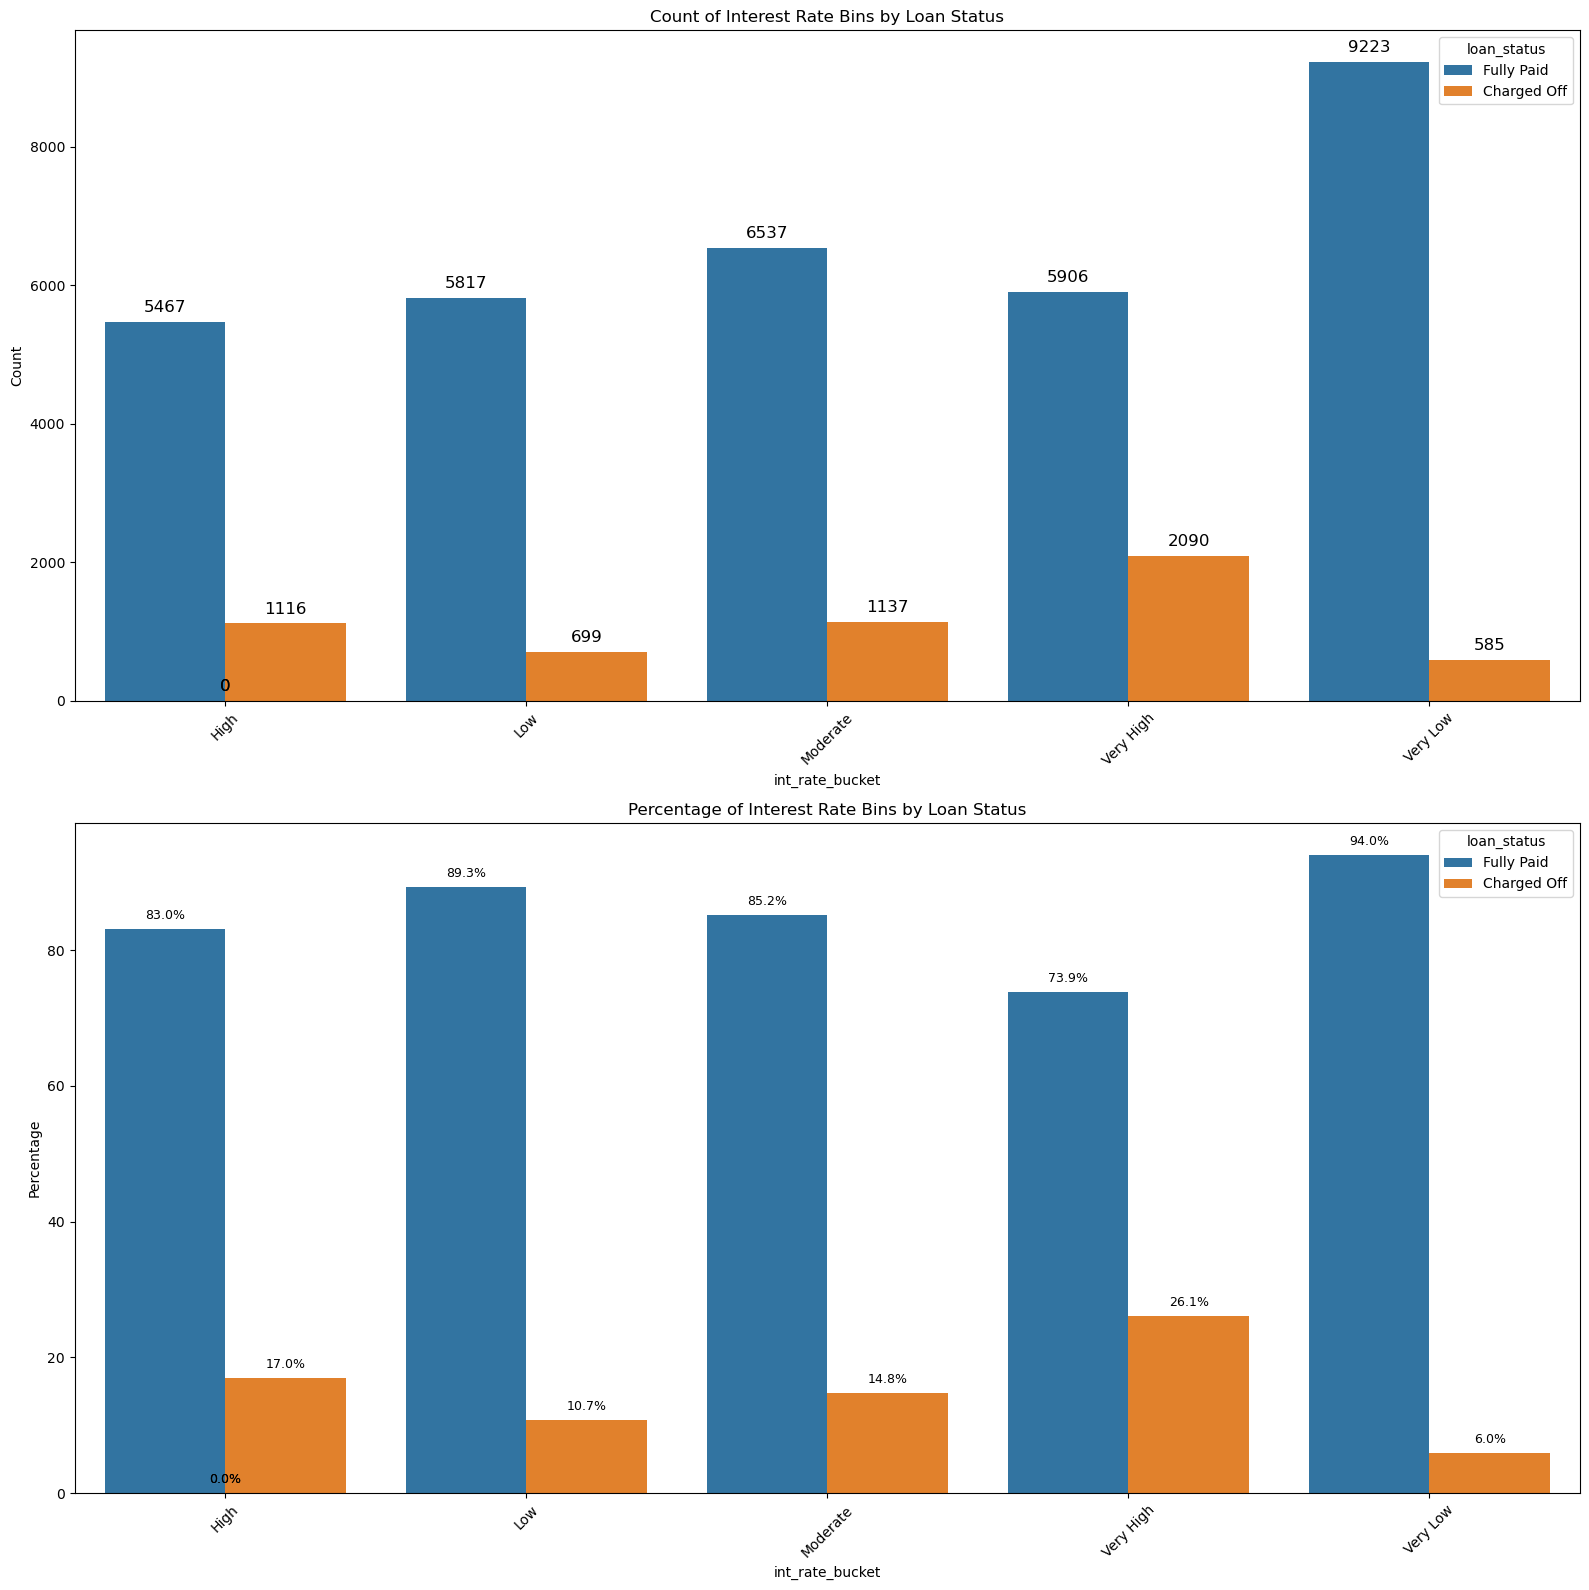

In [493]:
## Interest Rate VS Loan Status

plot_by_counts_and_percentage(loan_dataset, 'loan_status', 'int_rate_bucket')

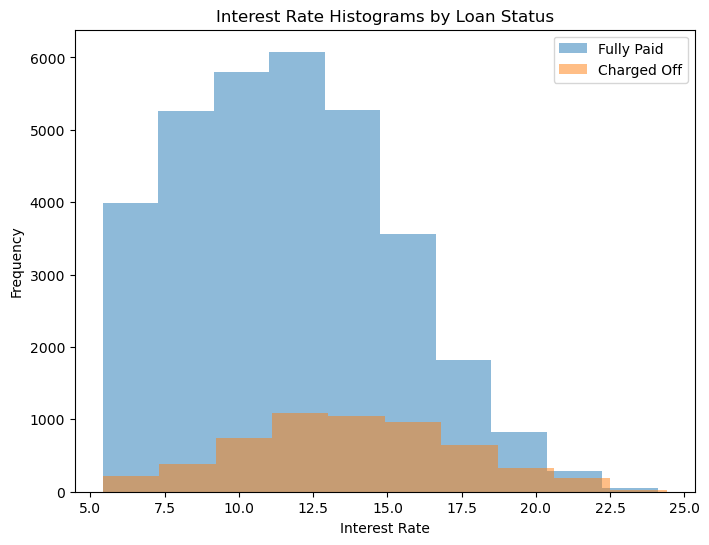

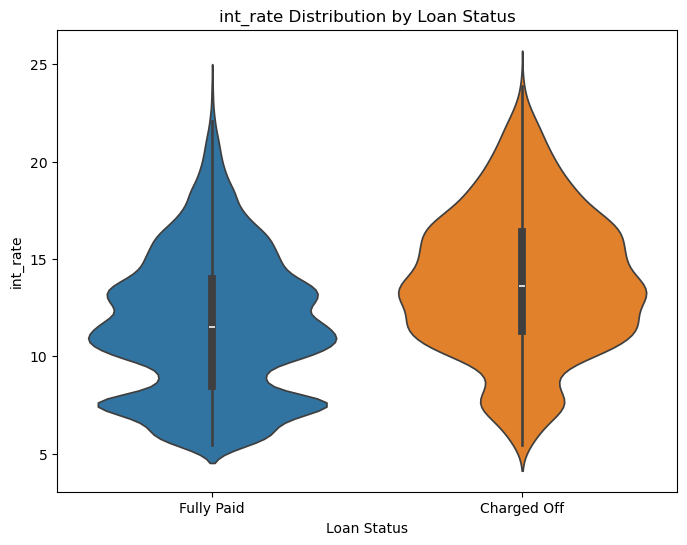

In [499]:
plot_column_histograms_by_loan_status(loan_dataset,'int_rate')
plot_violin_by_loan_status(loan_dataset,'int_rate')

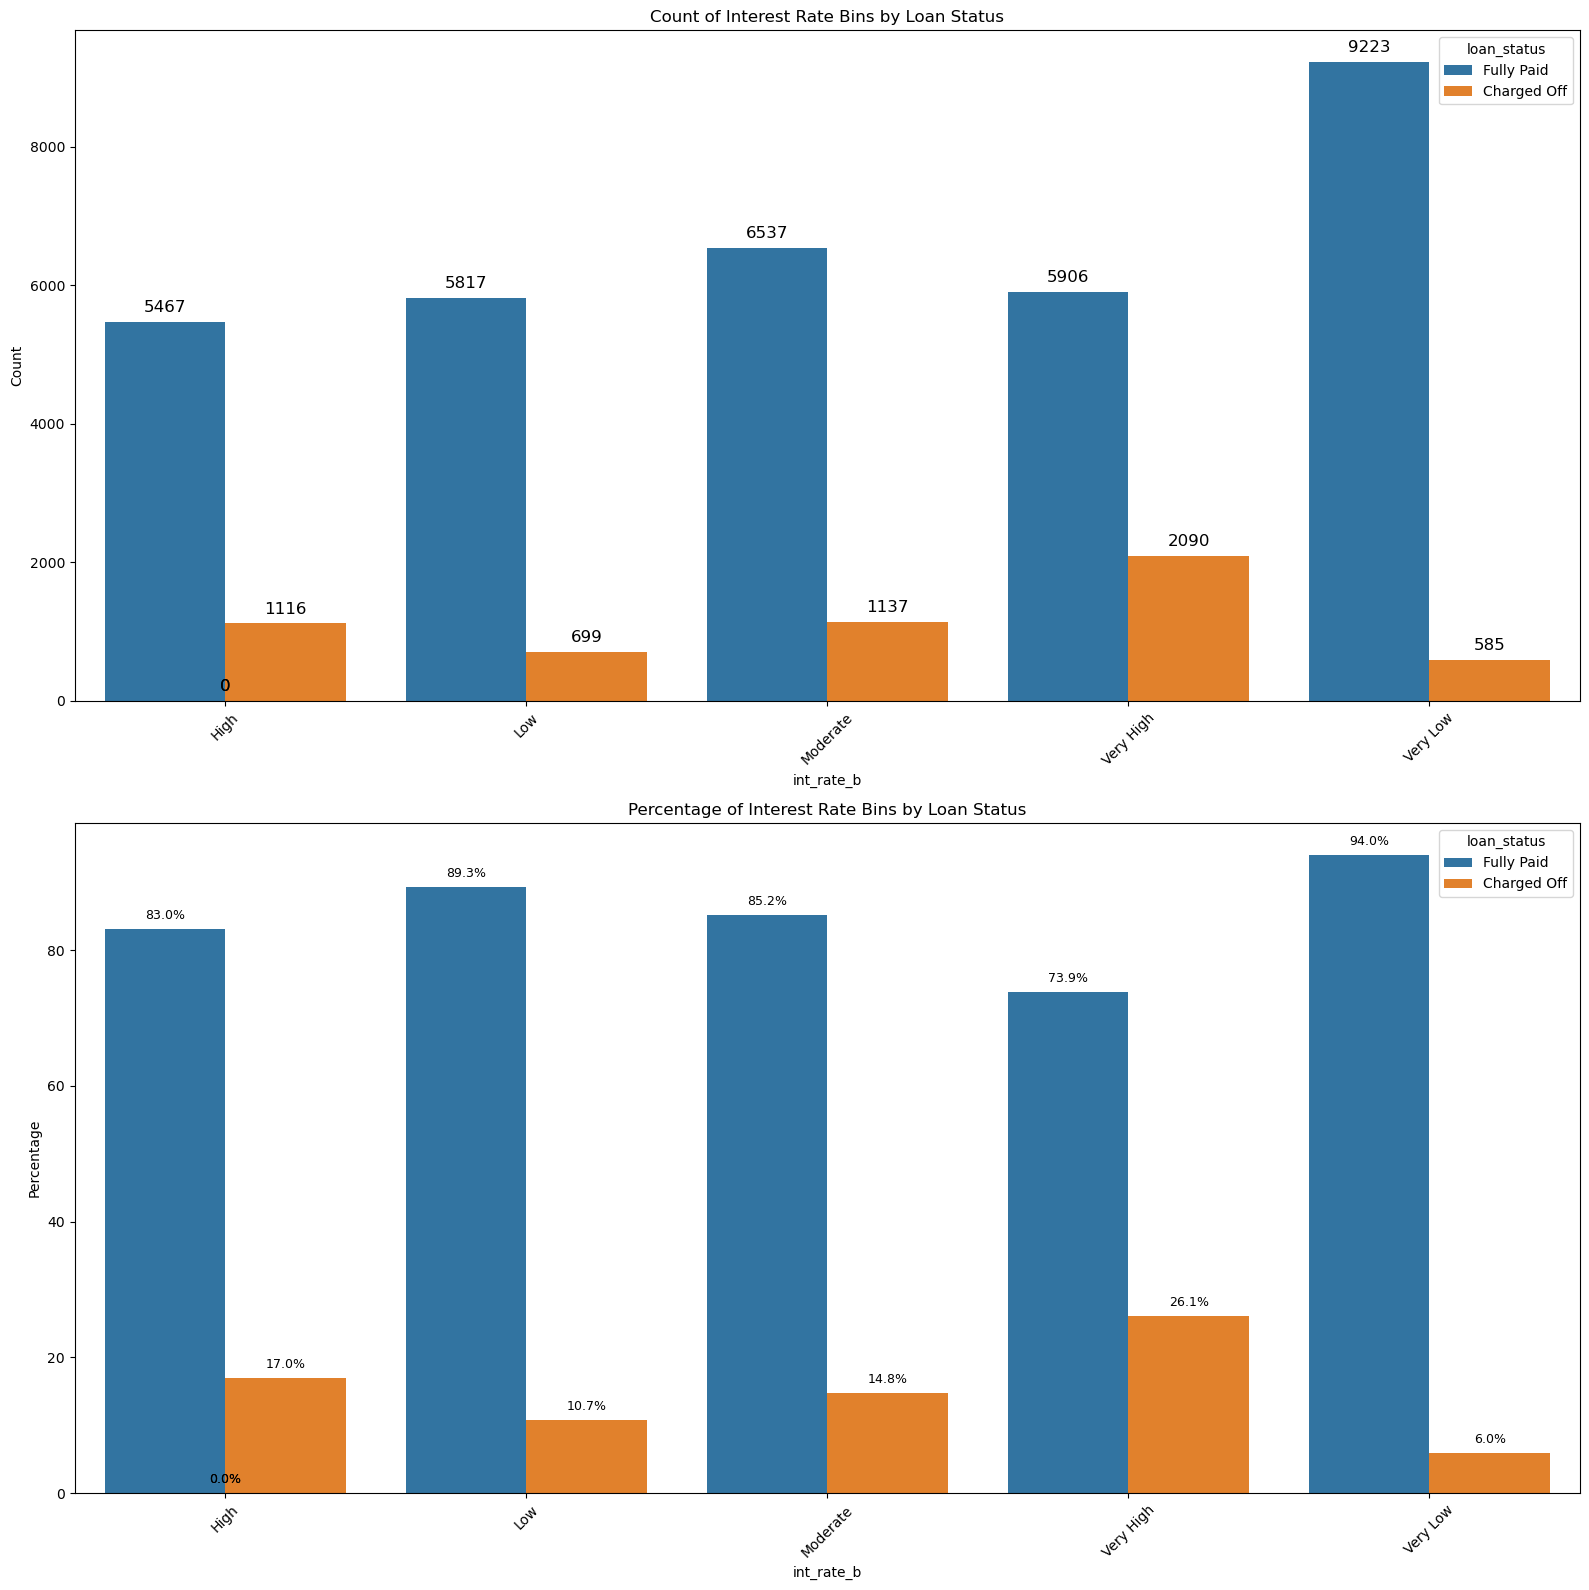

In [172]:
## Very High Interest Rate is resulting in charge off
## After breaking down using histogram we can see that it is high between 13 to 17


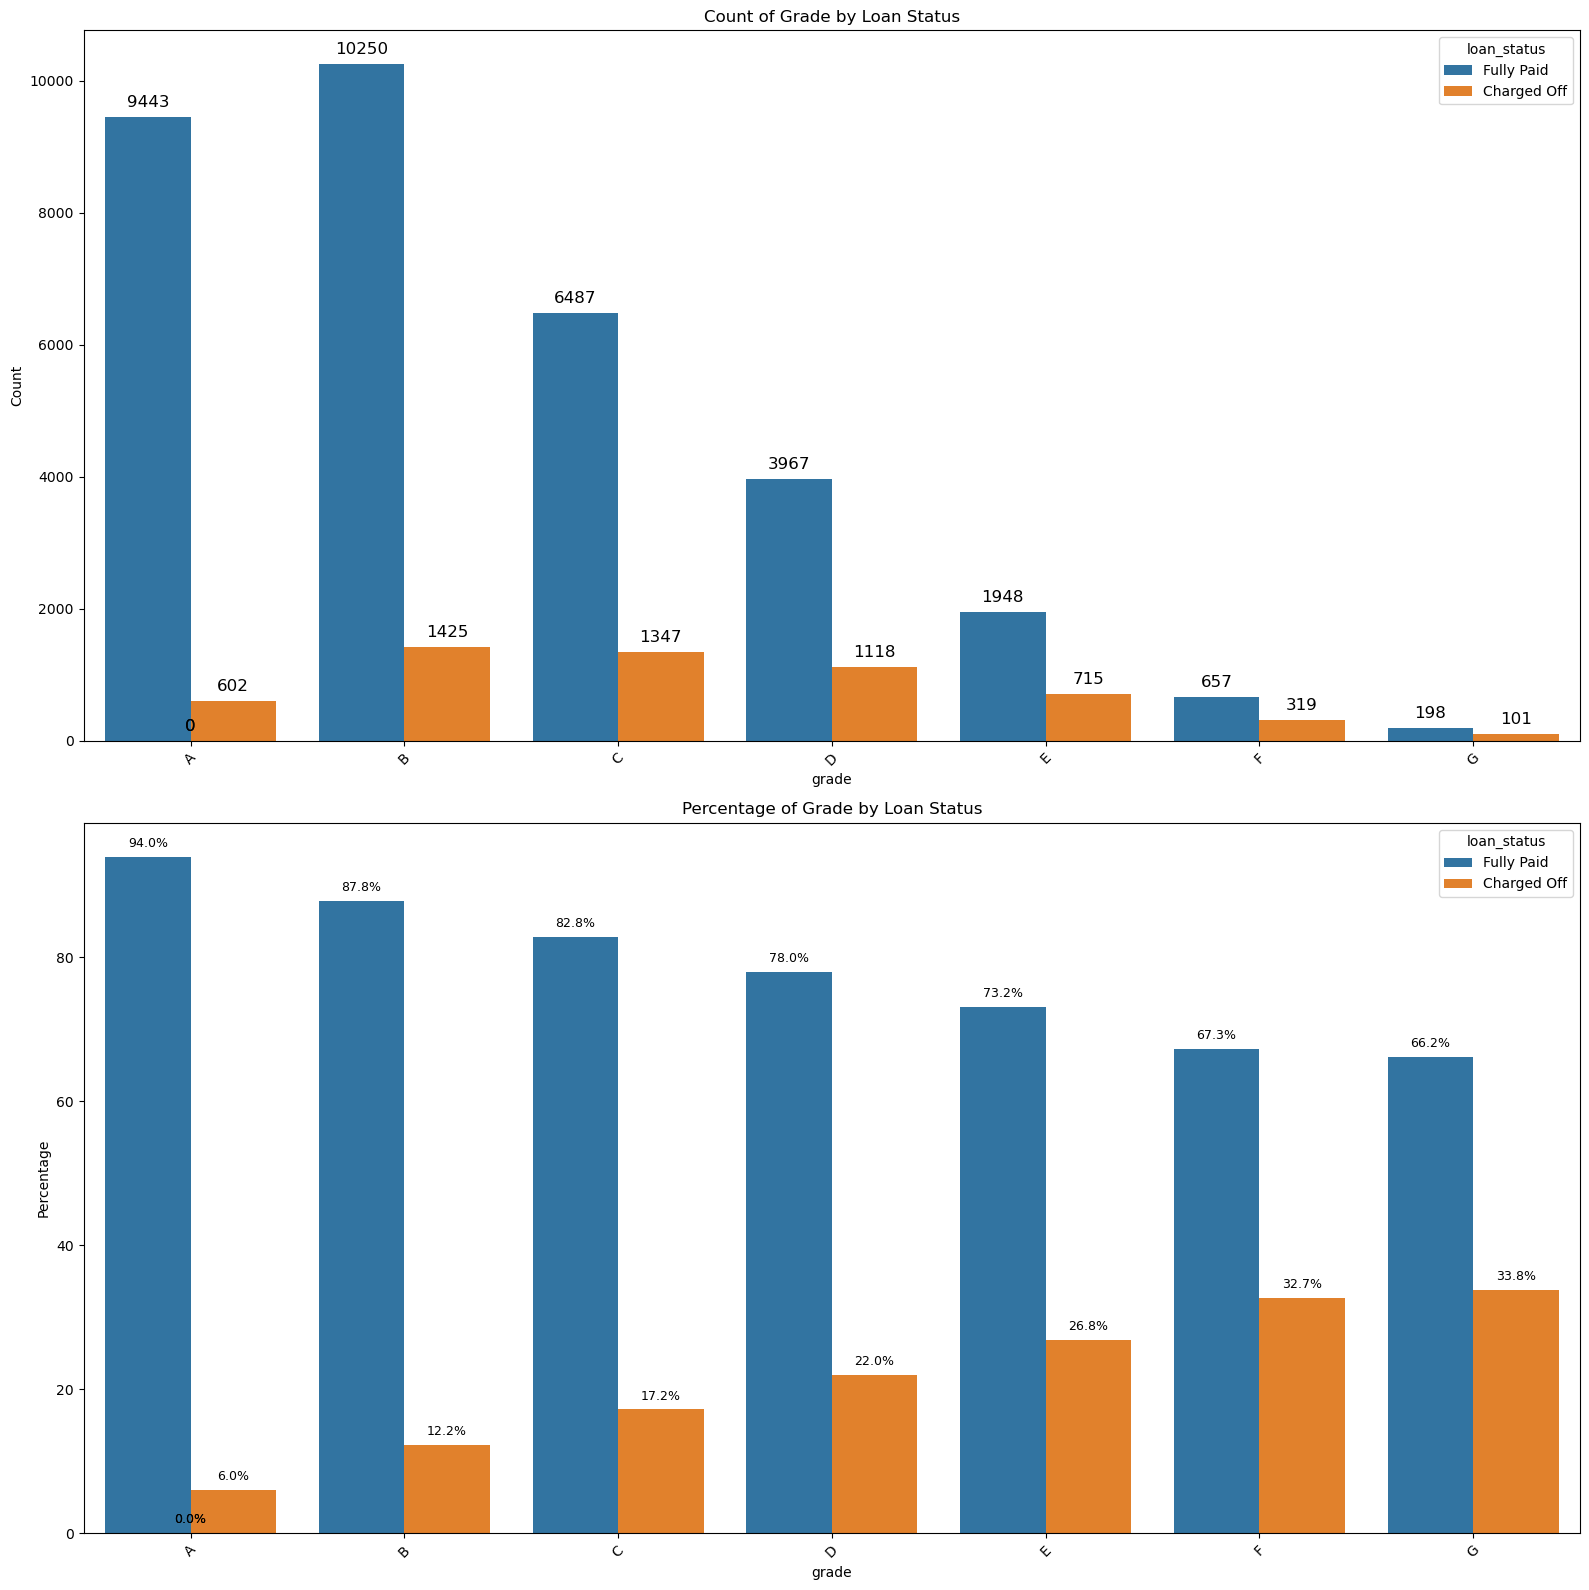

In [494]:
bucket_order = sorted(loan_dataset['grade'].unique())

plot_by_counts_and_percentage(loan_dataset, 'loan_status',  'grade',bucket_order)


In [89]:
#### Charge off possibility increases as grade is decreasing

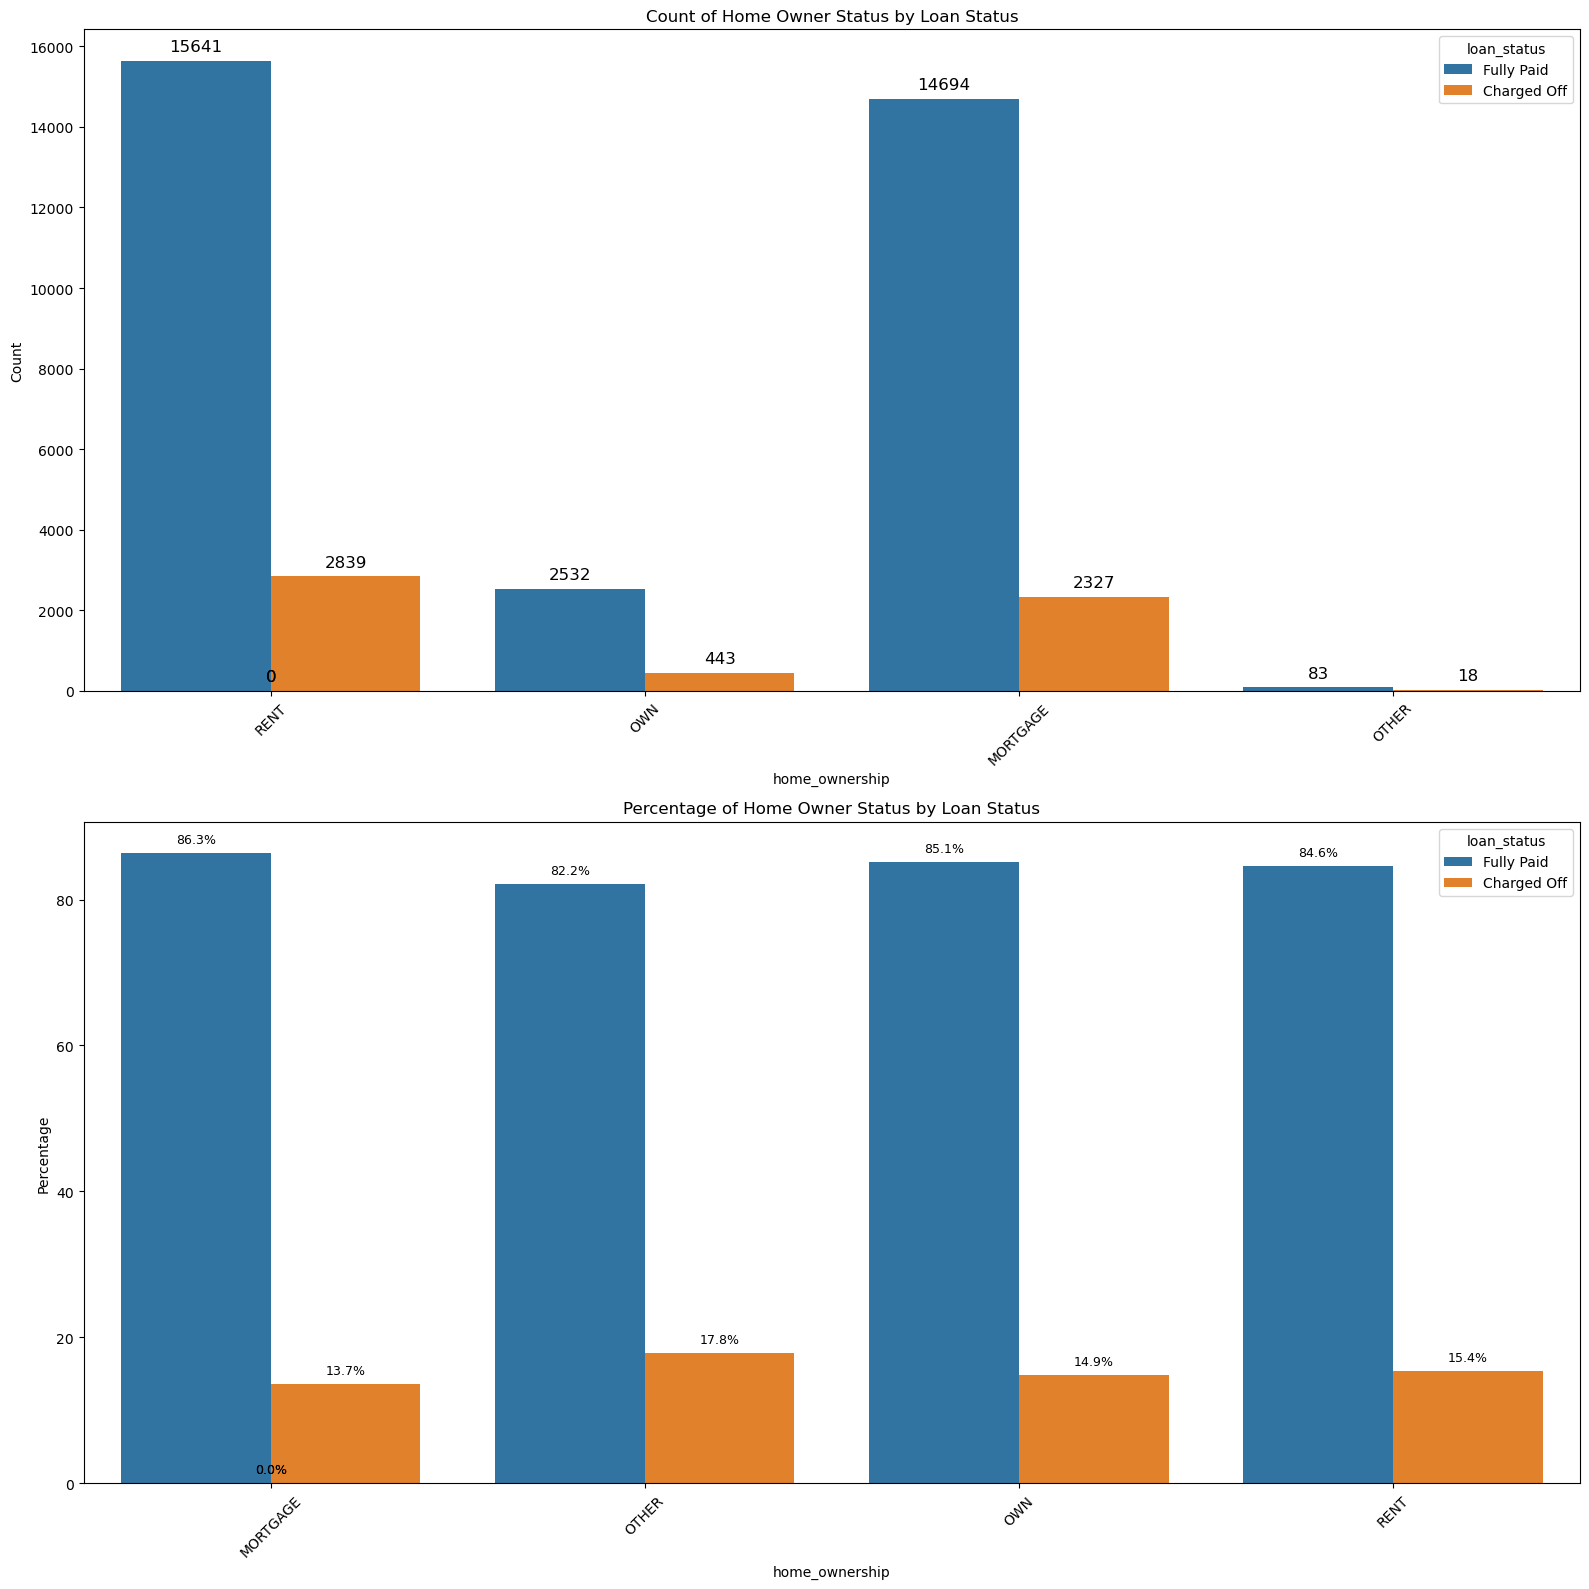

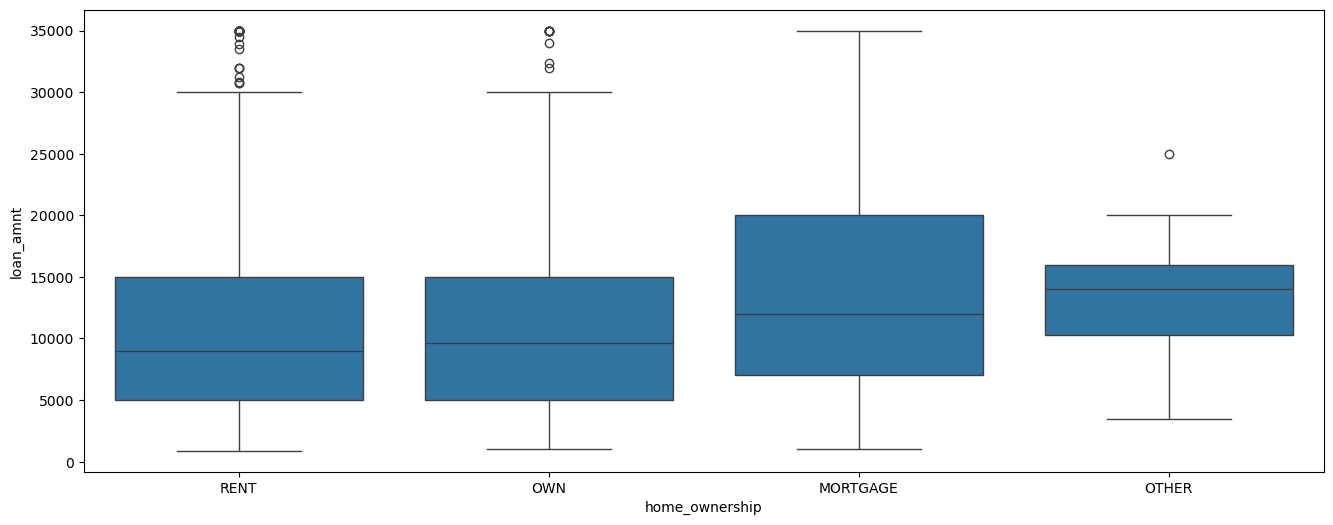

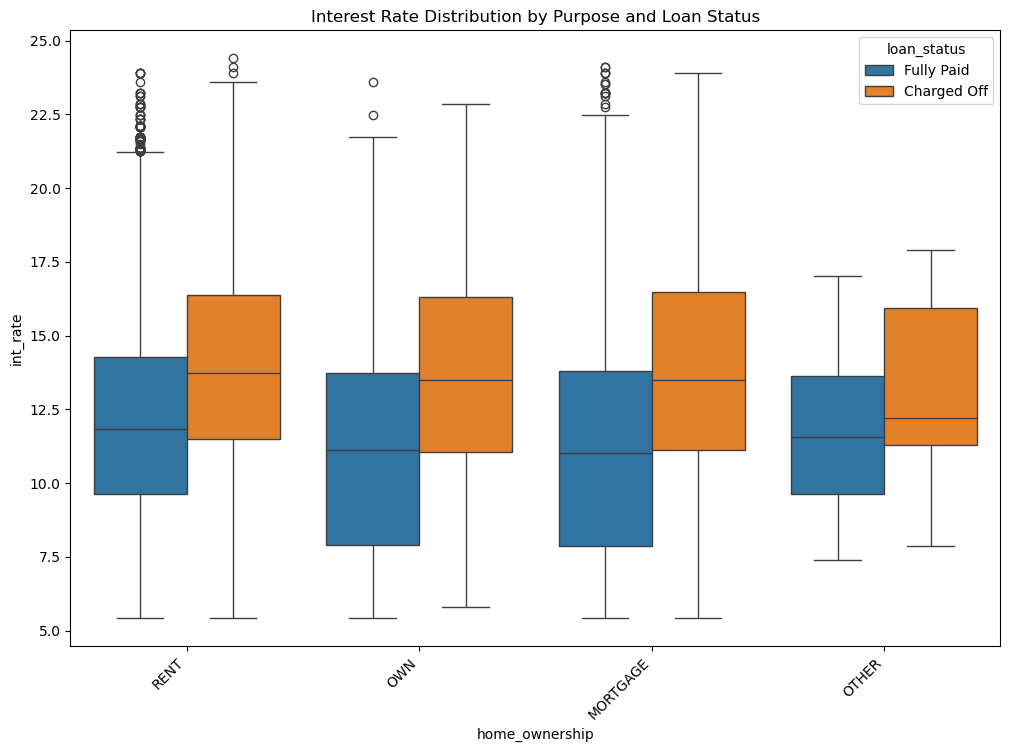

In [535]:
## Home ownership vs loan status
plot_by_counts_and_percentage(loan_dataset, 'loan_status',  'home_ownership')
plt.figure(figsize=(16,6))
charged_off_dataset = loan_dataset[loan_dataset.loan_status == 'Charged Off']
sns.boxplot(y=charged_off_dataset.loan_amnt,x=charged_off_dataset.home_ownership)
plt.show()
# Move to multivariate
plt.figure(figsize=(12, 8))
sns.boxplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_dataset[loan_dataset['loan_status'].isin(['Charged Off', 'Fully Paid'])])
plt.xticks(rotation=45, ha='right')
plt.title('Interest Rate Distribution by Purpose and Loan Status')
plt.show()

In [91]:
## For on Rent and mortage seeing higher charge off count.


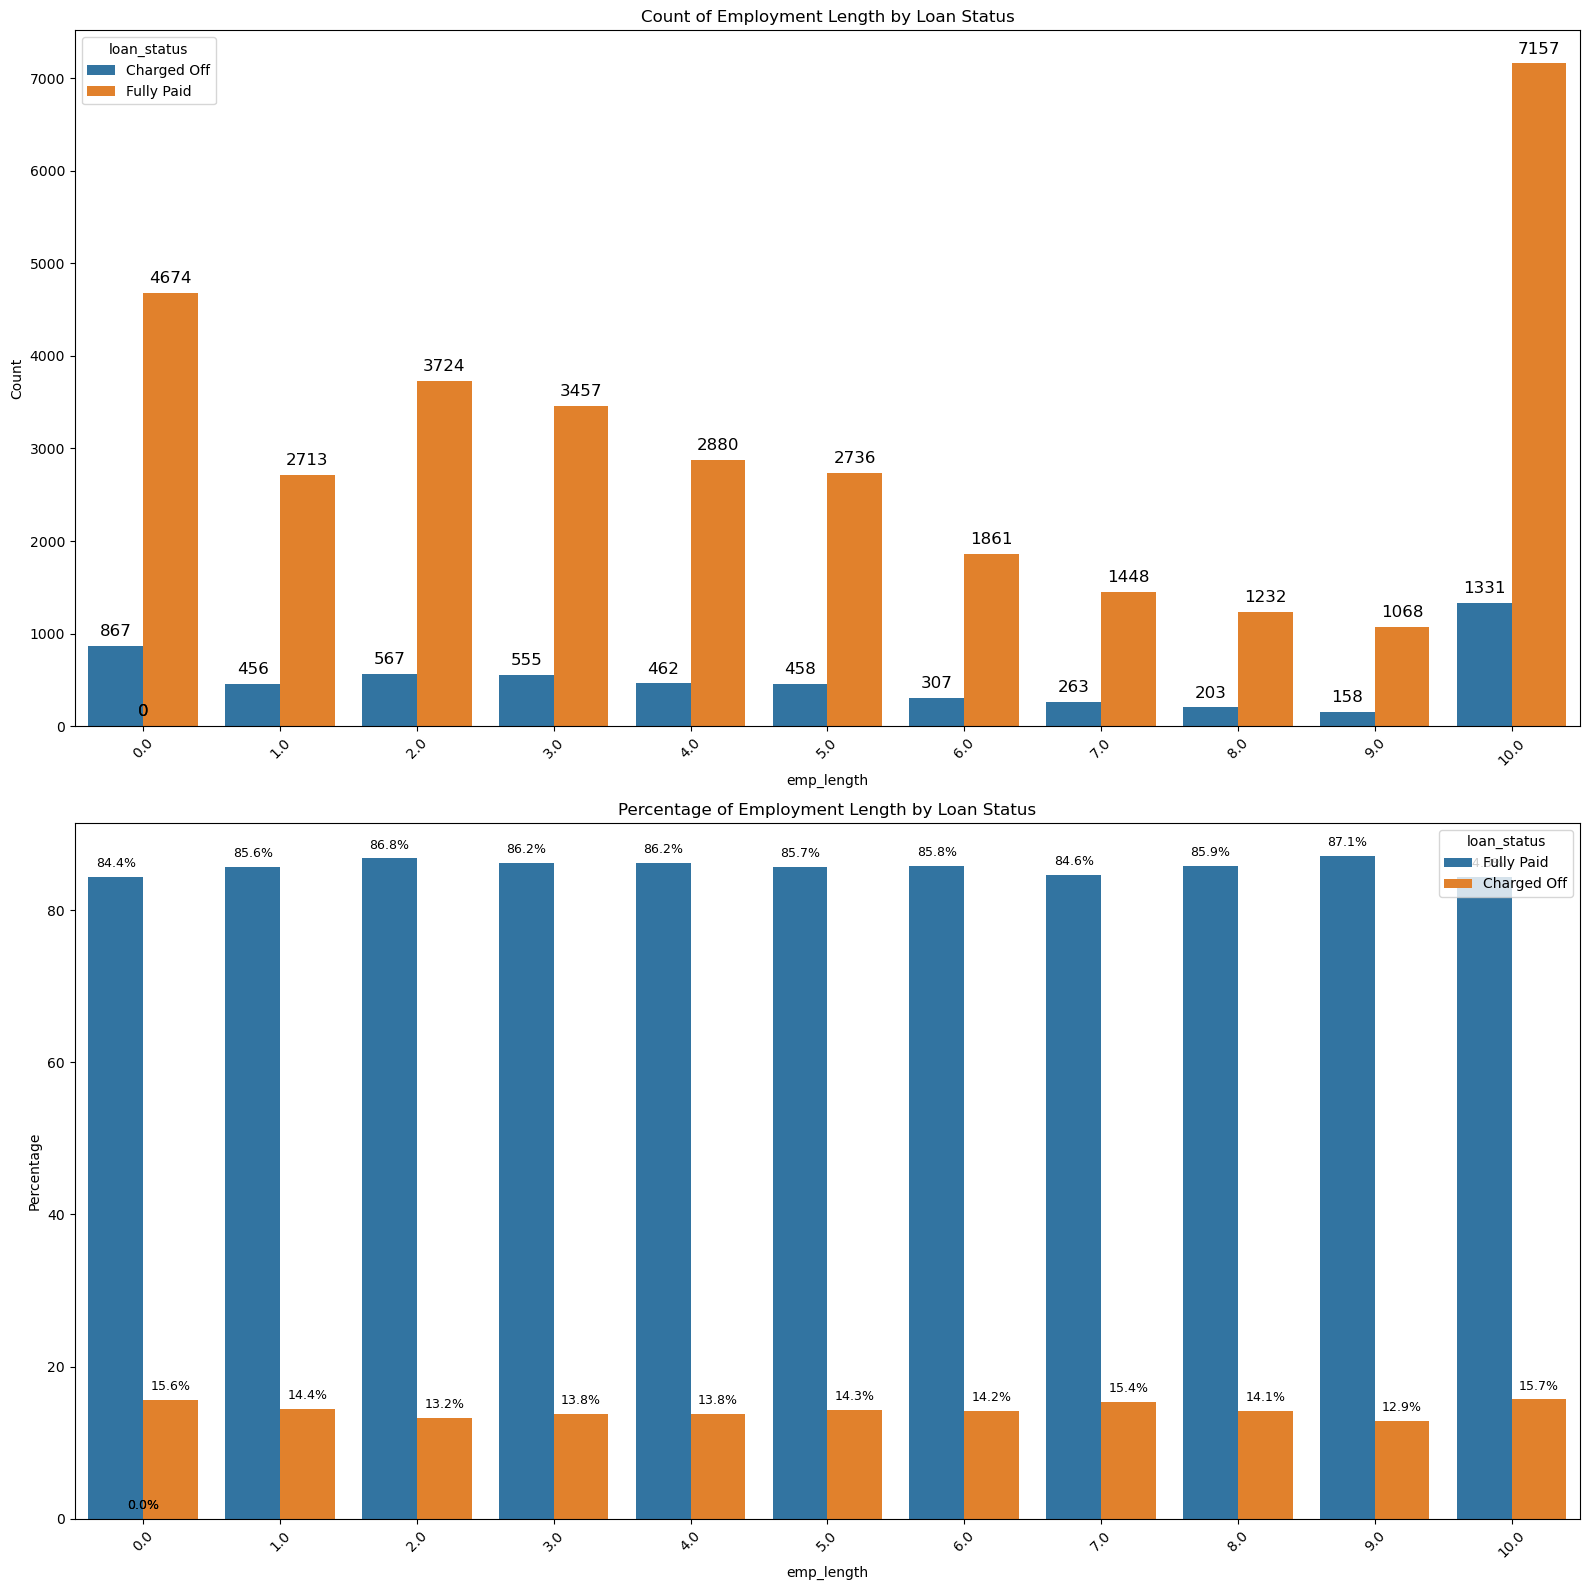

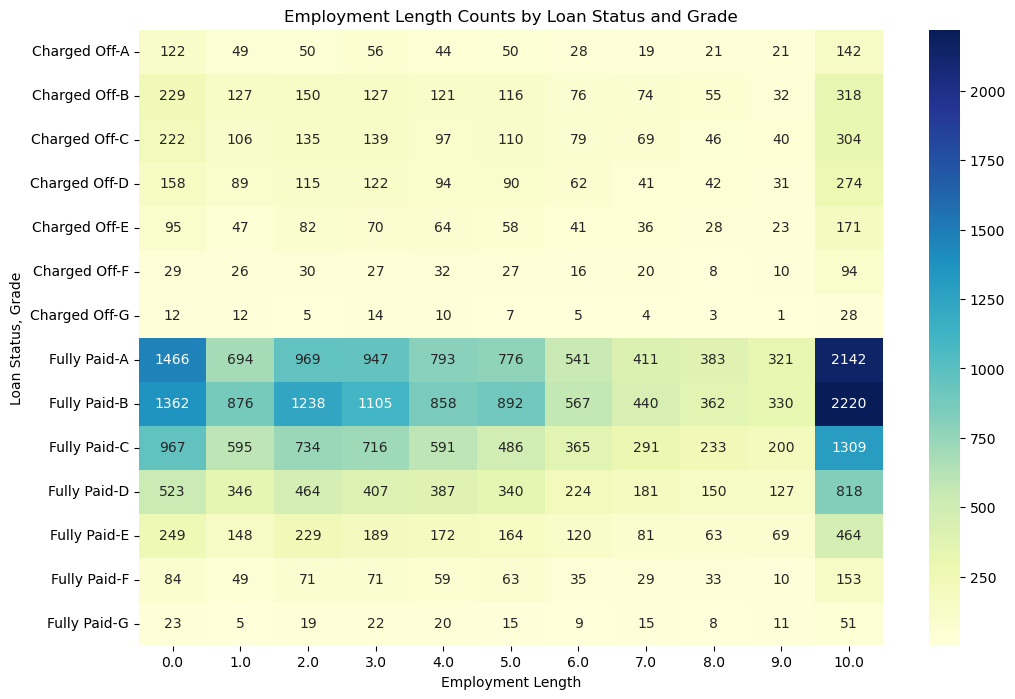

In [498]:
# Emp Length VS Loan status
plot_by_counts_and_percentage(loan_dataset, 'loan_status',  'emp_length')
plot_emp_length_by_status_grade(loan_dataset)



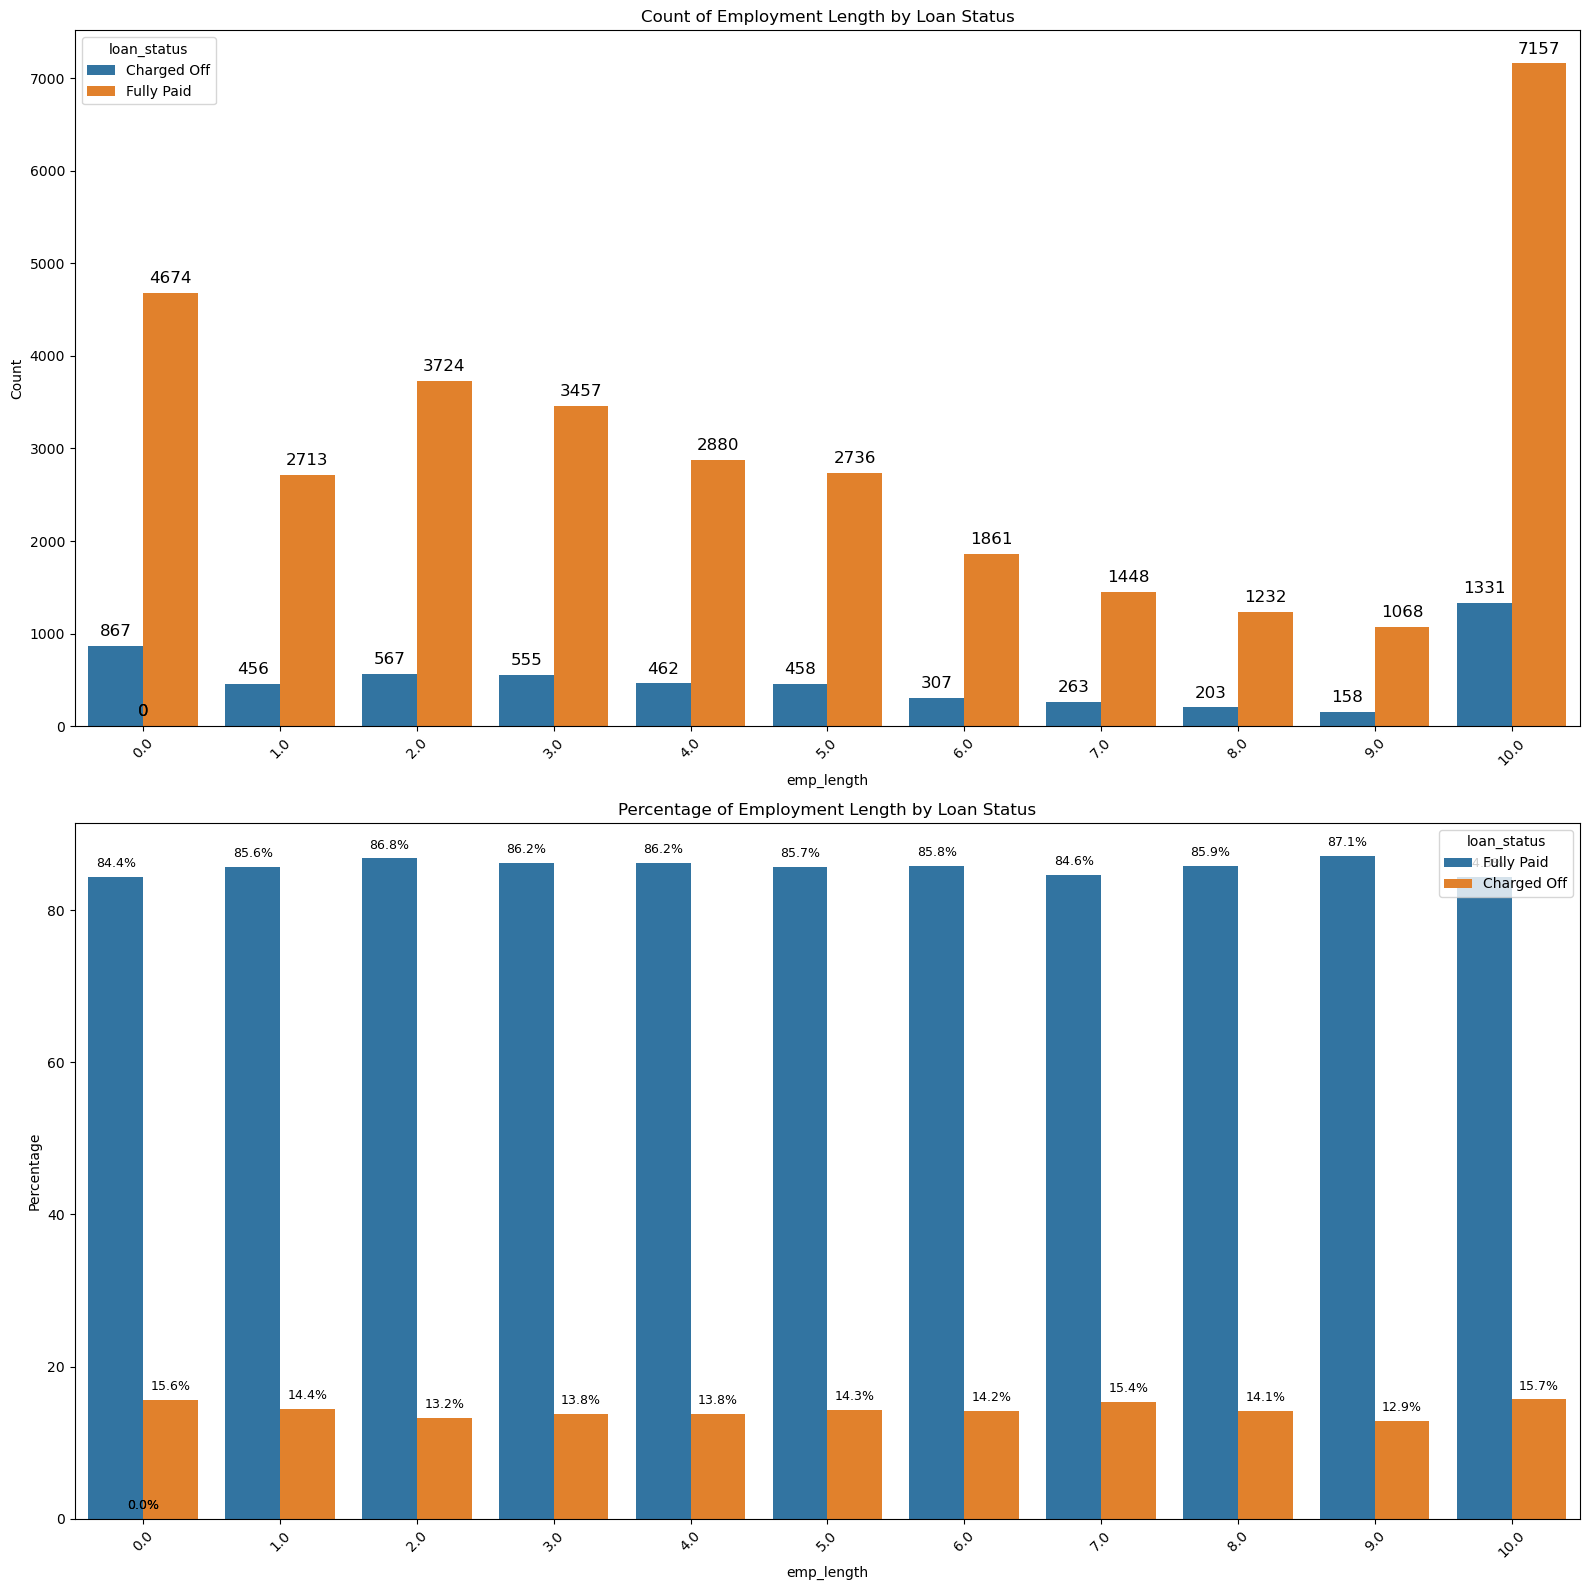

In [94]:
#### Highest number of default is happening with 10+ year experience applicant

In [97]:
#### Very High DTI has high charge off ratio

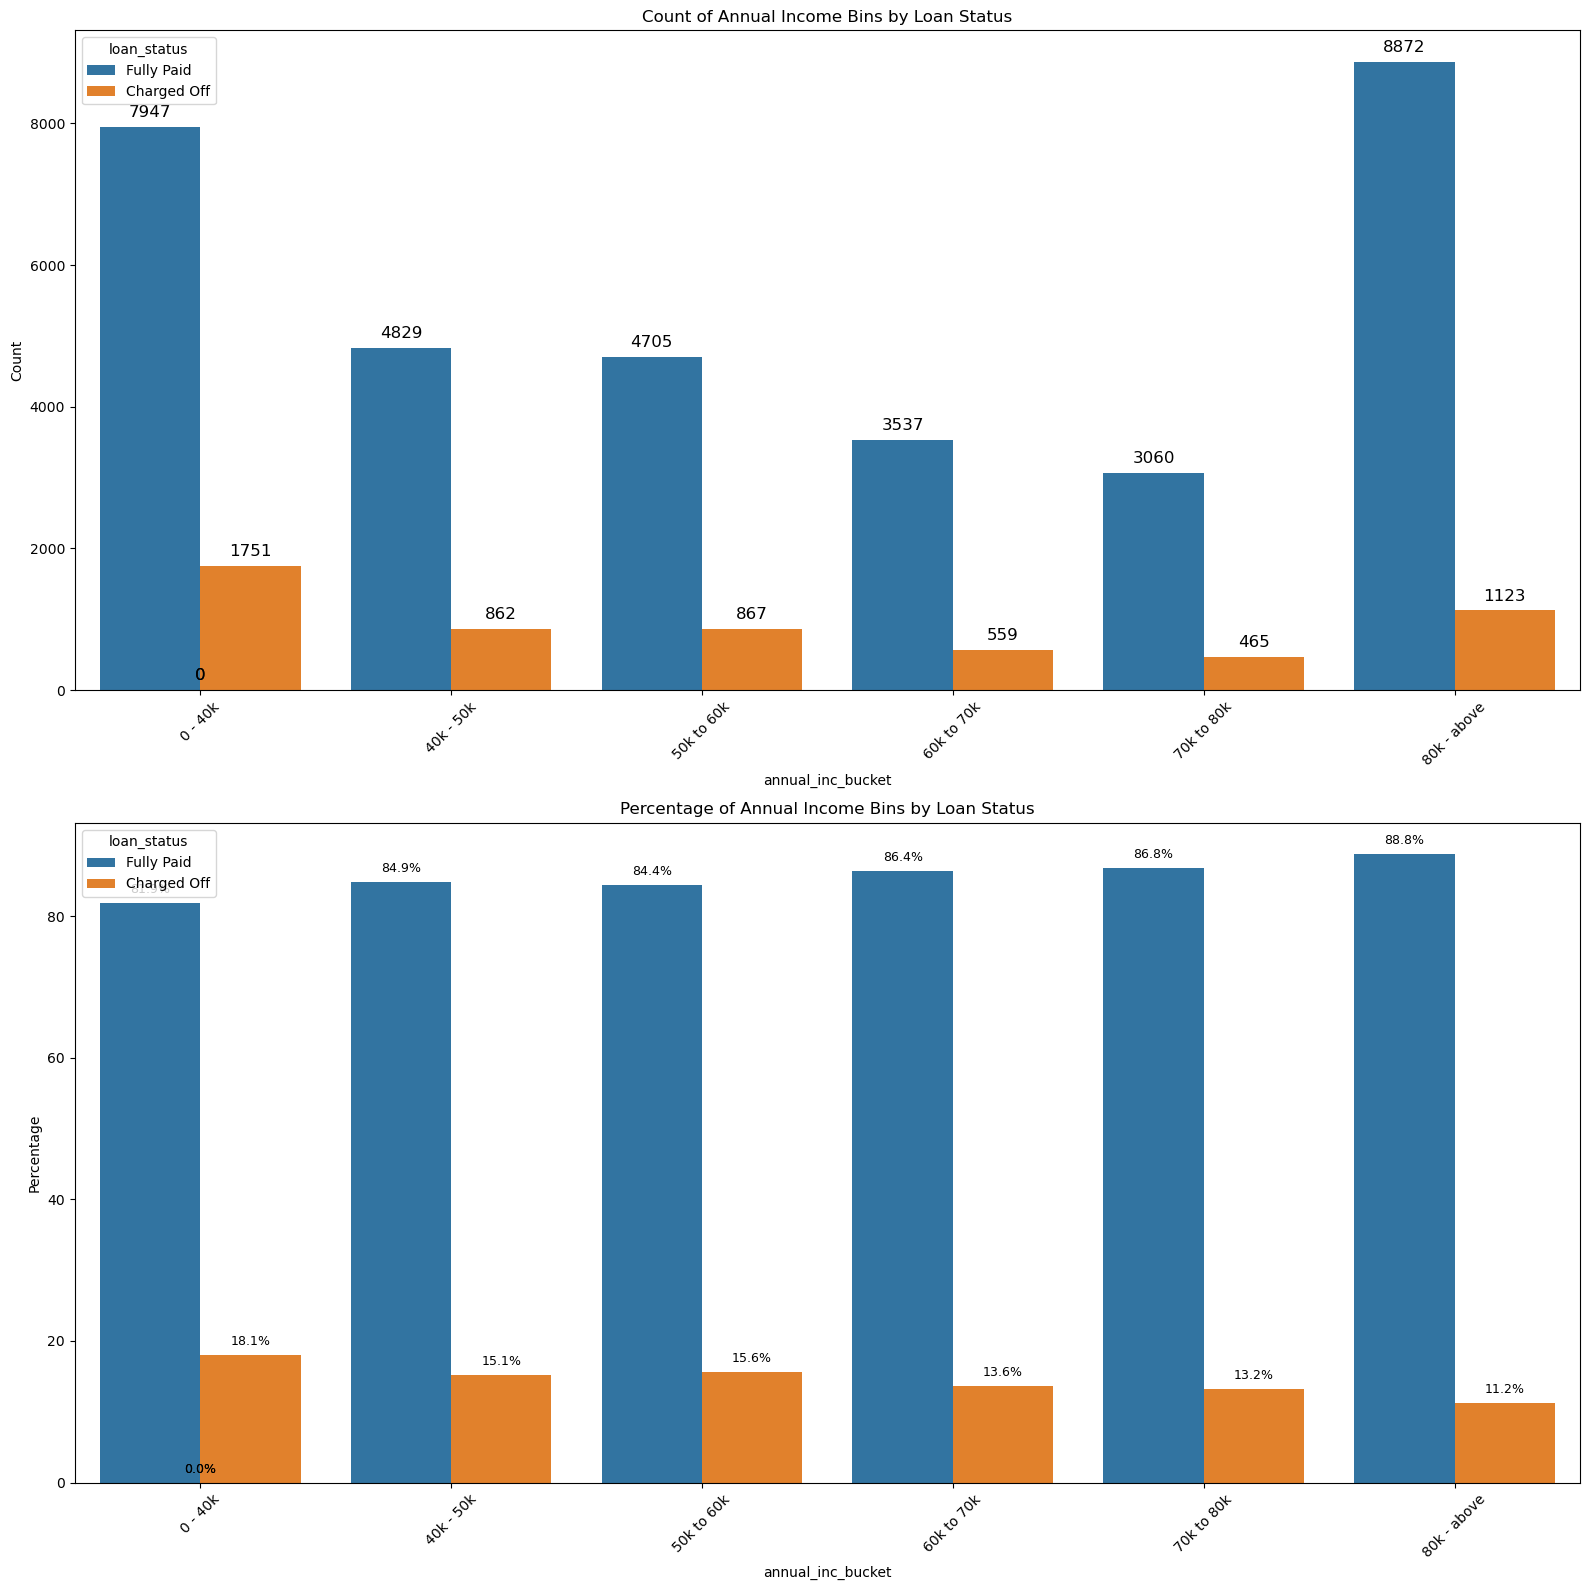

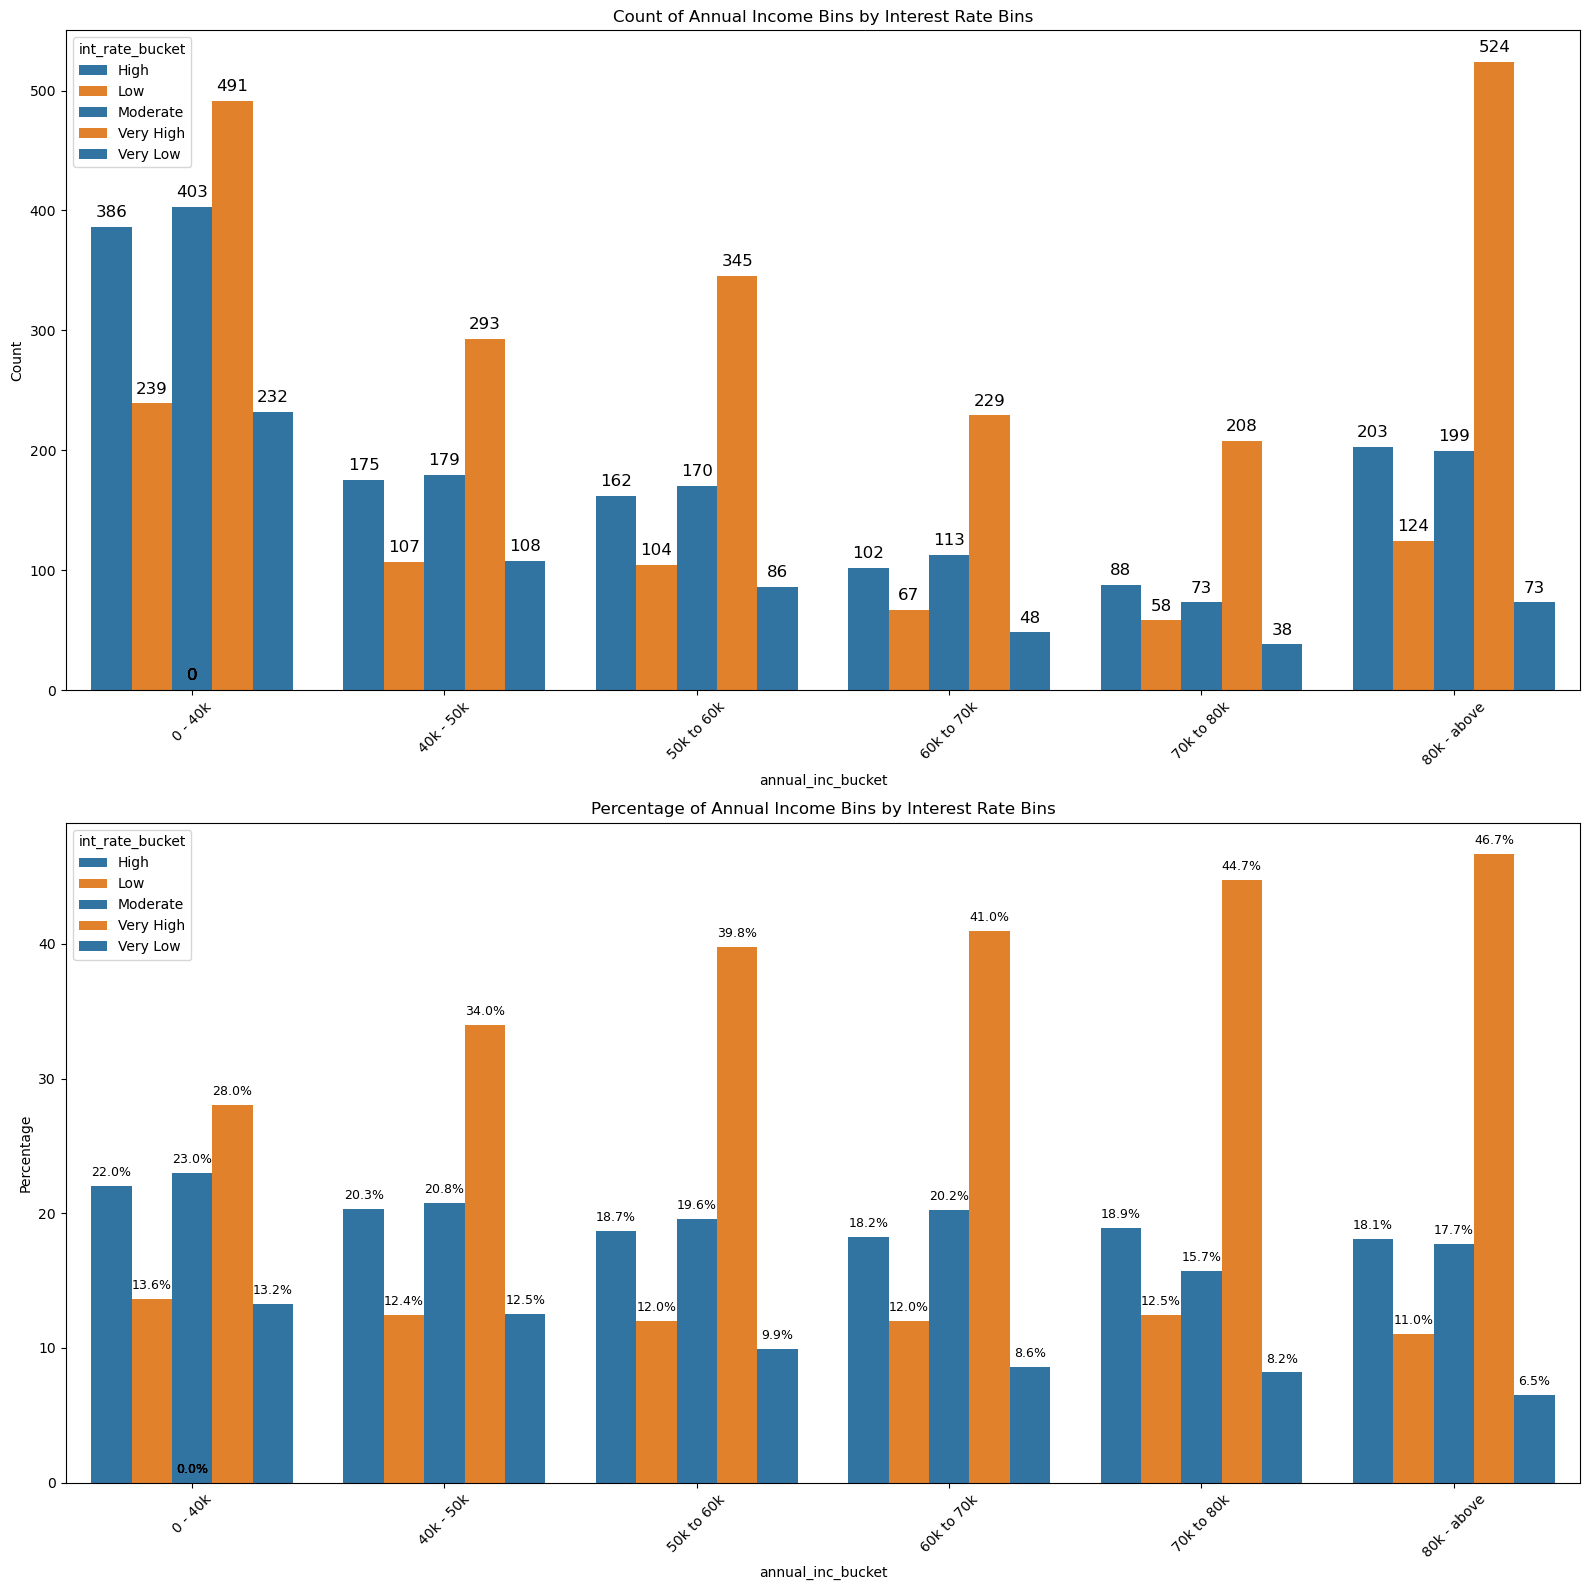

In [503]:
plot_by_counts_and_percentage(loan_dataset, 'loan_status','annual_inc_bucket')
#### Most of the charge off is in 0-40k annual income
plot_by_counts_and_percentage(loan_dataset[loan_dataset.loan_status == 'Charged Off'], 'int_rate_bucket','annual_inc_bucket')

#### one of the main reason is very high interest rate

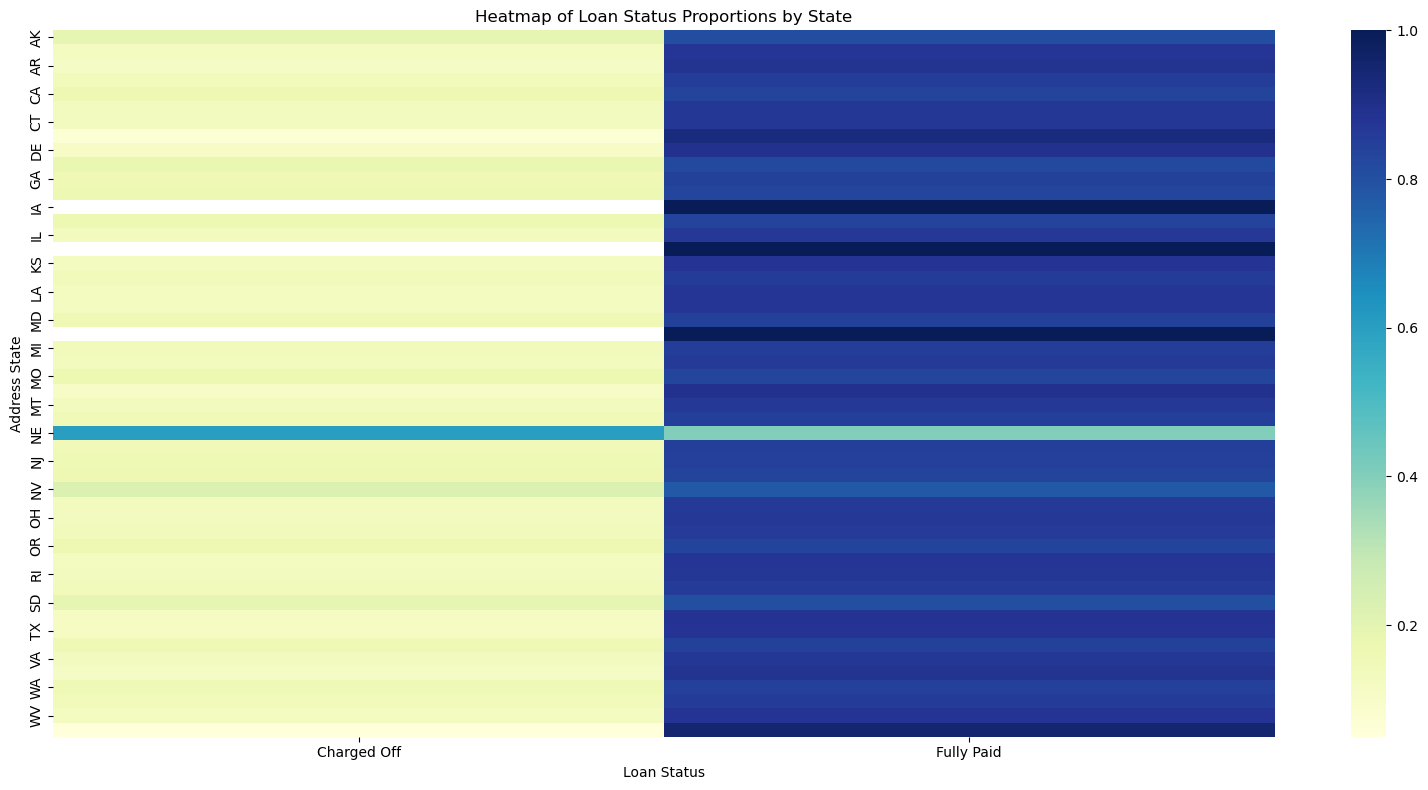

In [504]:
def plot_loan_status_by_state_heatmap(df):
    """Plots a heatmap of loan status proportions by state."""

    # Filter out 'Current' loans
    df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

    state_status = df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack()

    plt.figure(figsize=(16, 8))
    sns.heatmap(state_status, cmap='YlGnBu')
    plt.ylabel('Address State')
    plt.xlabel('Loan Status')
    plt.title('Heatmap of Loan Status Proportions by State')
    plt.tight_layout()
    plt.show()

plot_loan_status_by_state_heatmap(loan_dataset)


In [100]:
## The count of loan application from NE state is very low, so we can ignore it. Other than that there isn't much correlationship between state and charge off 

In [101]:
loan_dataset.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36935
1.0     1637
2.0        5
Name: count, dtype: int64

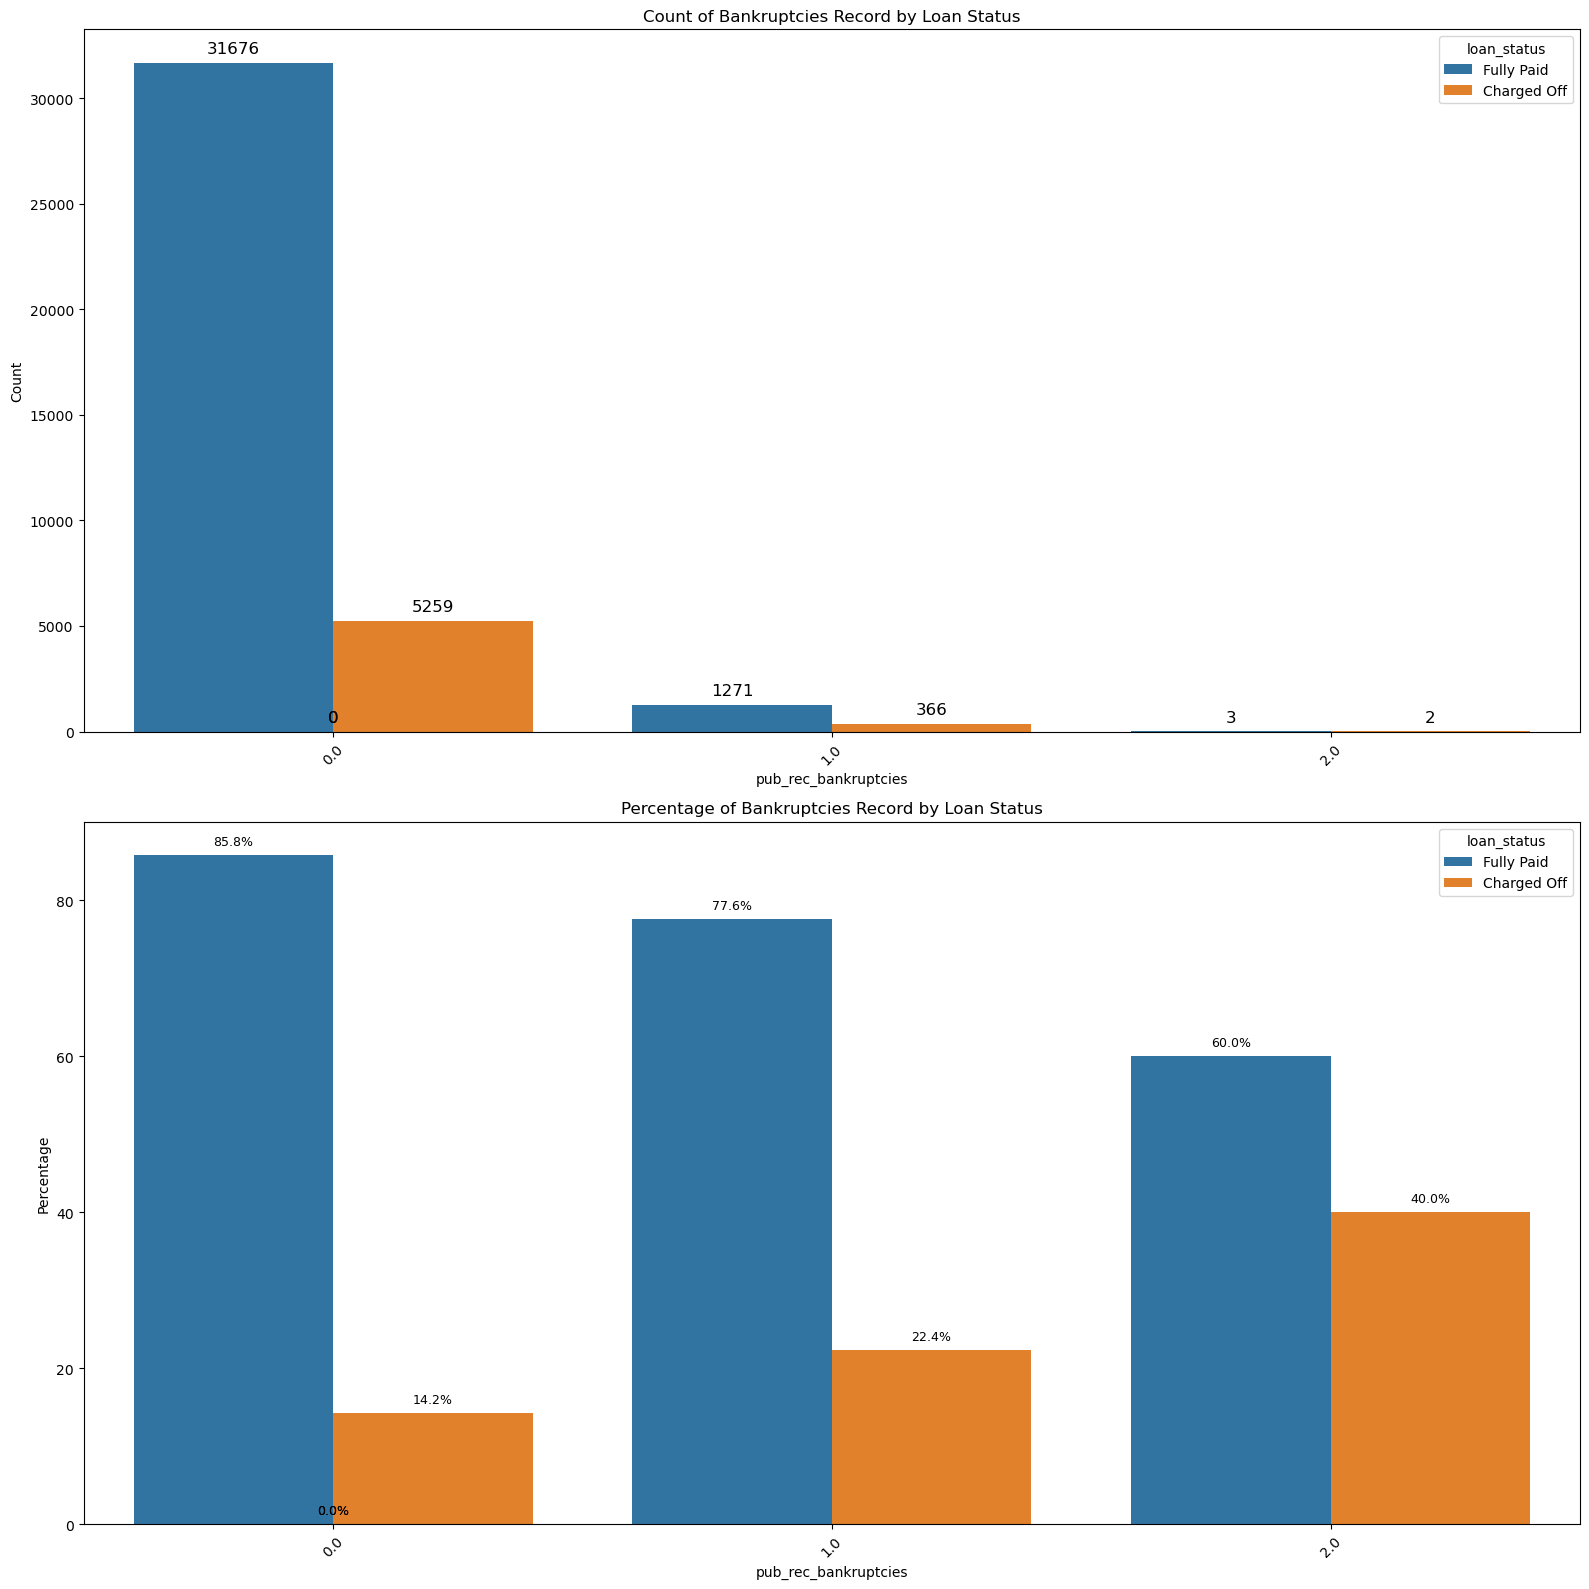

In [505]:
plot_by_counts_and_percentage(loan_dataset,'loan_status','pub_rec_bankruptcies')
#### High count of bankruptcies mean high chance of charge off 

### Segemented Analysis

In [510]:
def segmented_analysis_plot(df, segment_column, dist_column):
    """Performs segmented analysis by dist column."""
    segment_columns = df[segment_column].unique()
    hue_order = ['Fully Paid', 'Charged Off']  # Define consistent hue order
    palette = {'Fully Paid': '#1f77b4', 'Charged Off': '#ff7f0e'} #Define consistent colors

    for column in sorted(segment_columns):
        column_df = df[df[segment_column] == column]
        default_rate = column_df[column_df['loan_status'] == 'Charged Off'].shape[0] / column_df.shape[0] if column_df.shape[0] > 0 else 0
        print(f"  {column_titles[segment_column]}  {column}: Default Rate = {default_rate:.2%}")
        
        plt.figure(figsize=(8, 6))
        sns.histplot(x=column_df[dist_column], hue=column_df['loan_status'], palette=palette)
        plt.xticks(rotation='vertical')
        plt.title(f'{column_titles[dist_column]} Distribution for  {column_titles[segment_column]} {column}')
        plt.show()
       

In [ ]:
#Purpose VS Loan Status Per grade

segmented_analysis_plot(loan_dataset,'grade','purpose')


In [ ]:
### For grade E,F,G along with debt_consolidation and small buisness purpose has high charge off chance.

  Grade  A: Default Rate = 5.99%


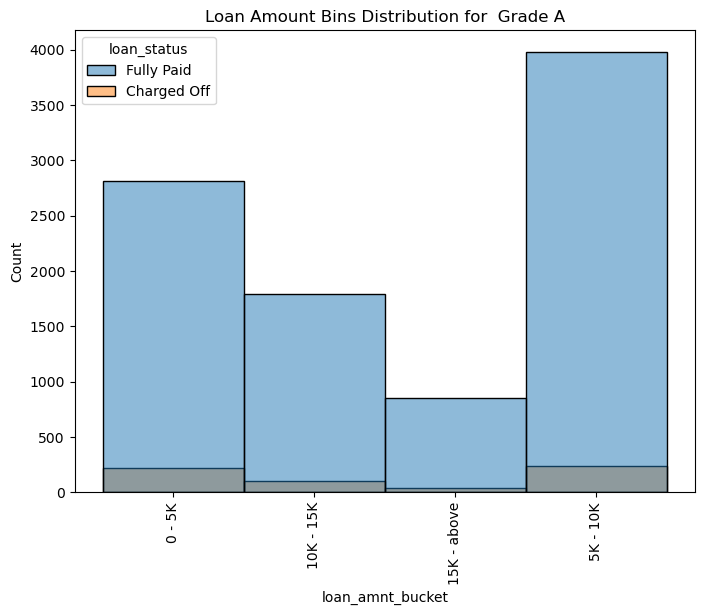

  Grade  B: Default Rate = 12.21%


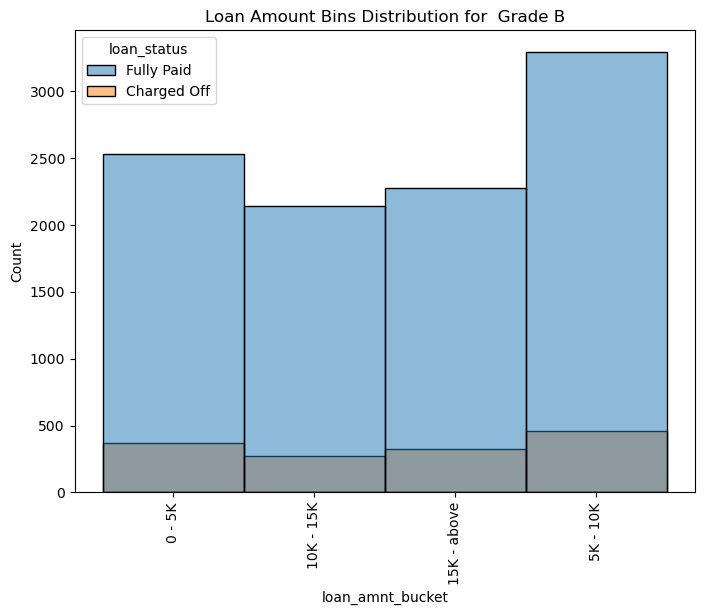

  Grade  C: Default Rate = 17.19%


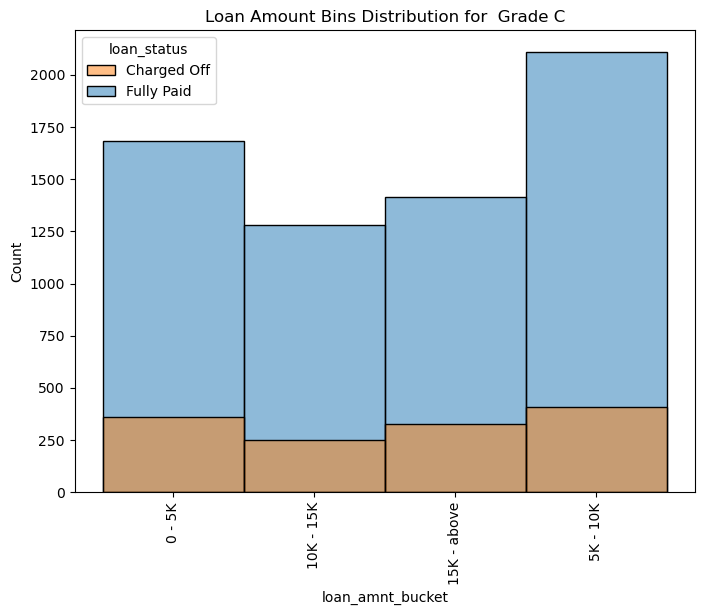

  Grade  D: Default Rate = 21.99%


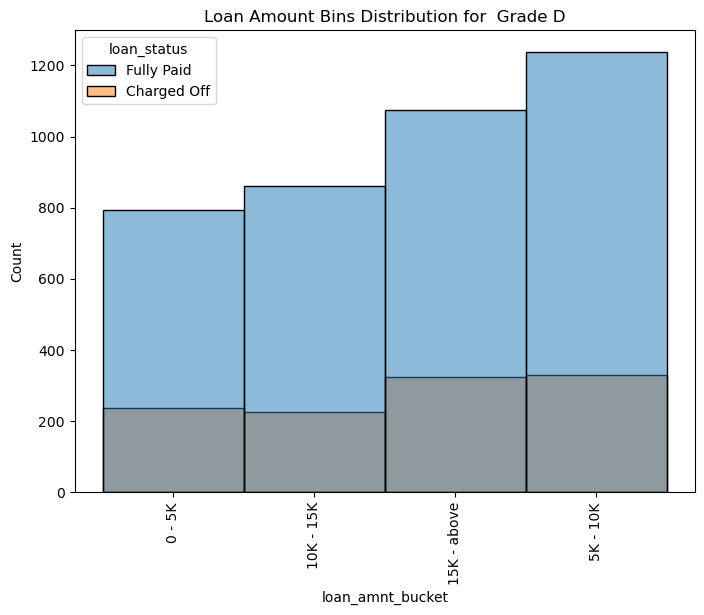

  Grade  E: Default Rate = 26.85%


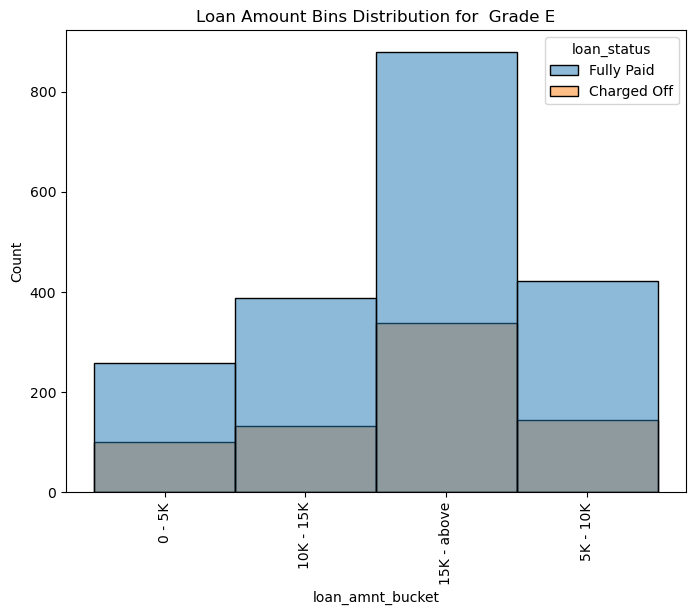

  Grade  F: Default Rate = 32.68%


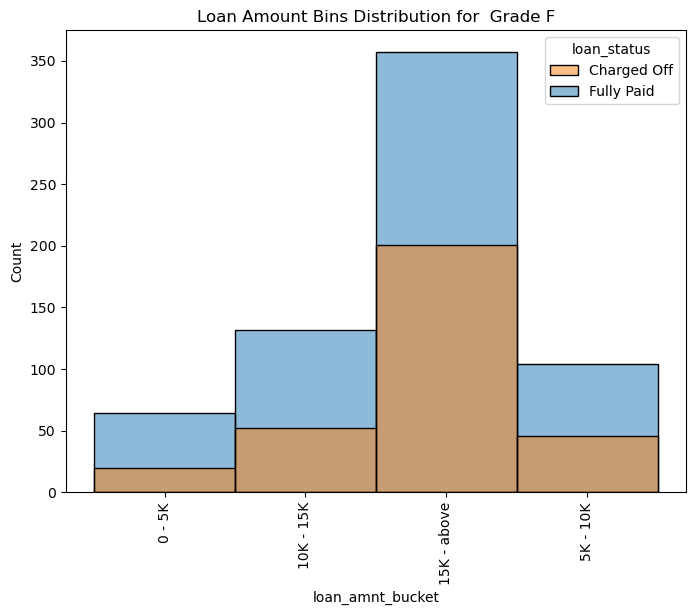

  Grade  G: Default Rate = 33.78%


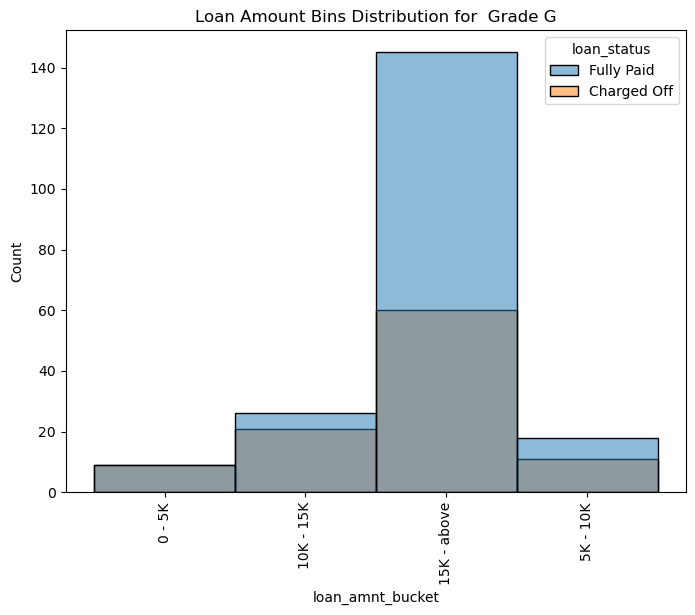

In [512]:
#Loan amount bin VS Loan Status Per grade
segmented_analysis_plot(loan_dataset,'grade','loan_amnt_bucket')

In [ ]:
### Better grade result in less charge off when we do analysis with status and loan amount

  Interest Rate Bins  High: Default Rate = 16.95%


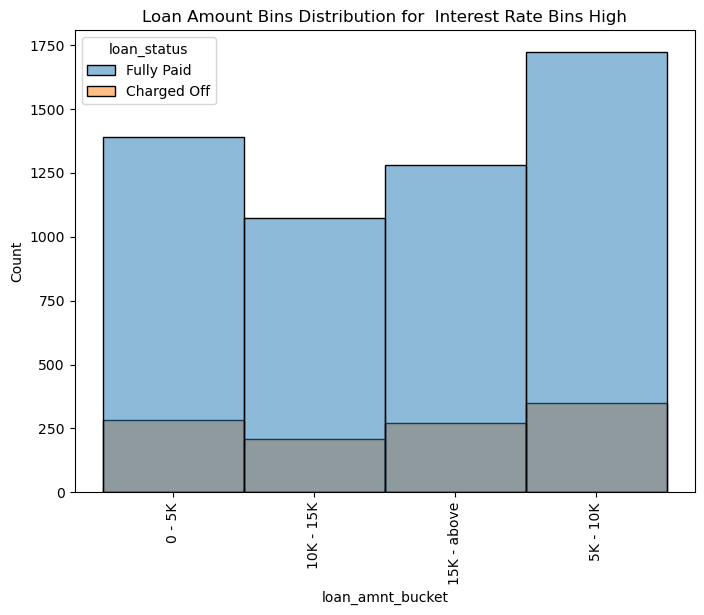

  Interest Rate Bins  Low: Default Rate = 10.73%


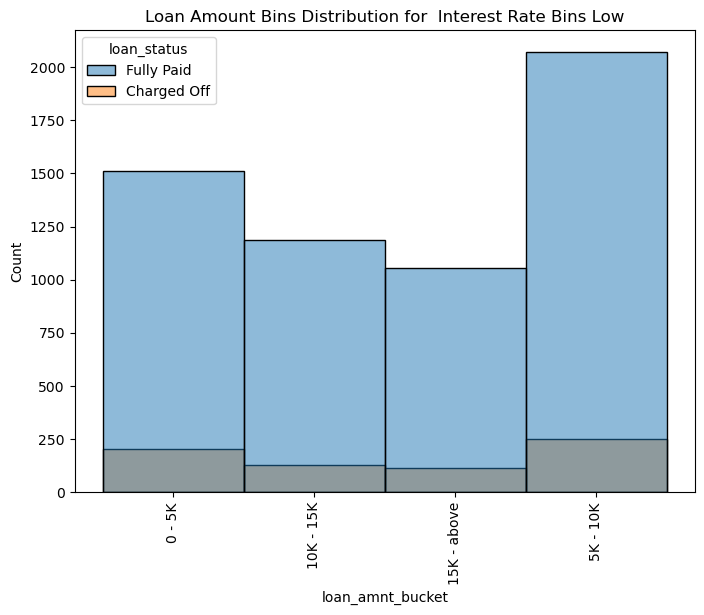

  Interest Rate Bins  Moderate: Default Rate = 14.82%


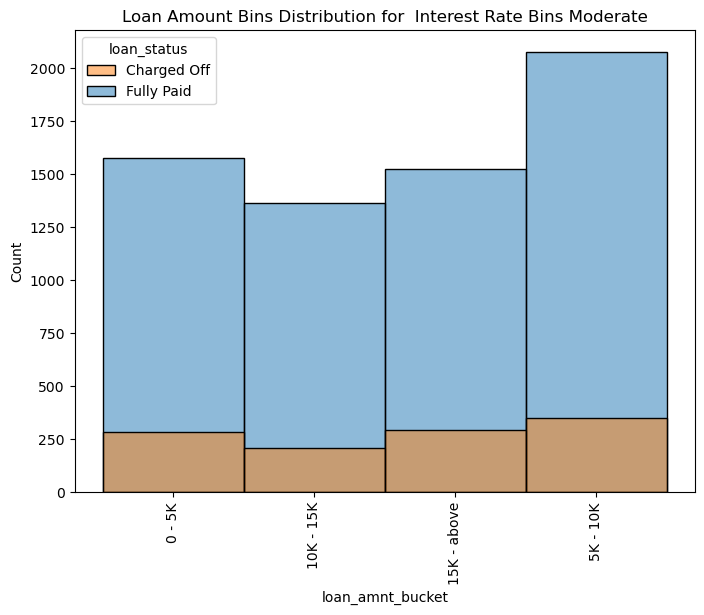

  Interest Rate Bins  Very High: Default Rate = 26.14%


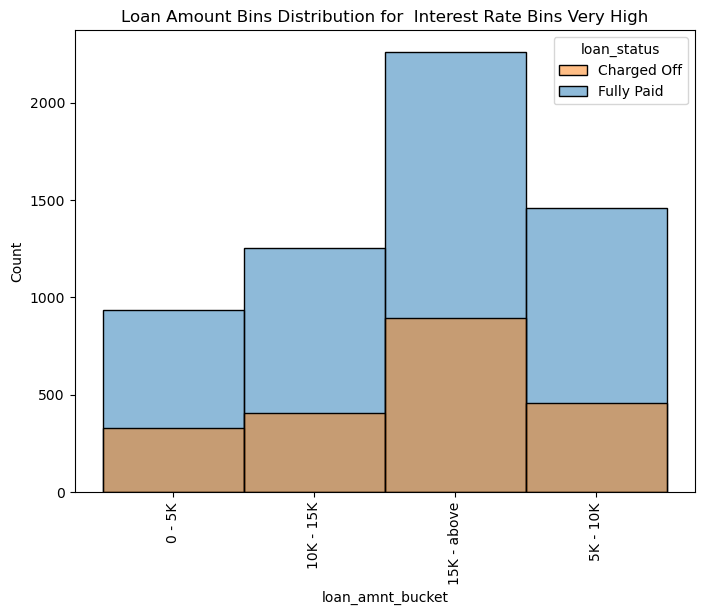

  Interest Rate Bins  Very Low: Default Rate = 5.96%


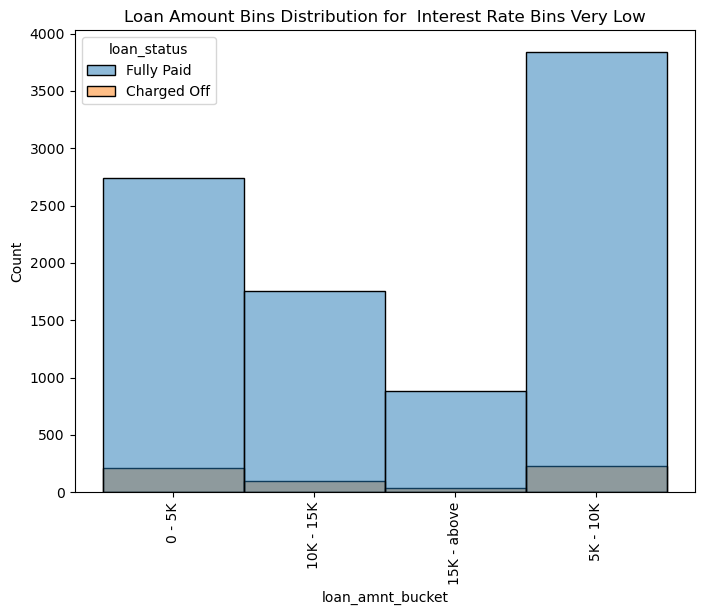

In [514]:
#Loan amount bin VS Loan Status Per interest rate bucket

segmented_analysis_plot(loan_dataset,'int_rate_bucket','loan_amnt_bucket')

In [ ]:
## Very high interest result in charge off when we compare it with loan amount and status

  Grade  A: Default Rate = 5.99%


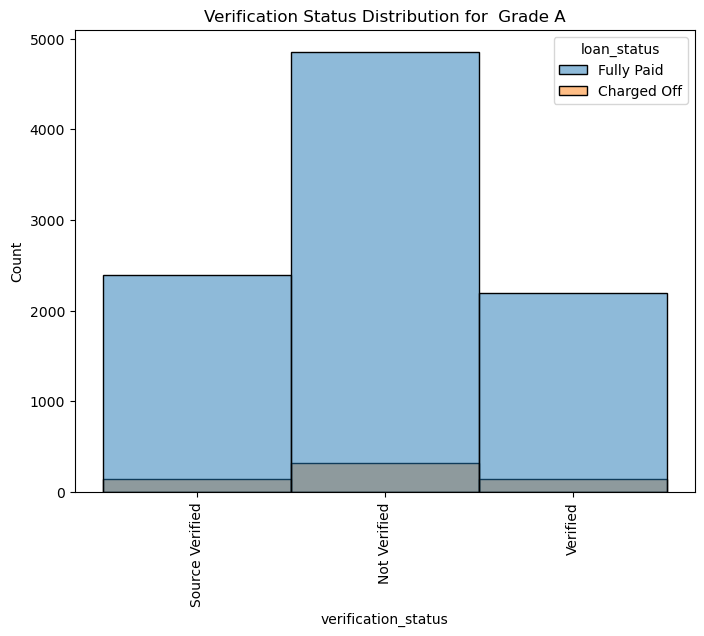

  Grade  B: Default Rate = 12.21%


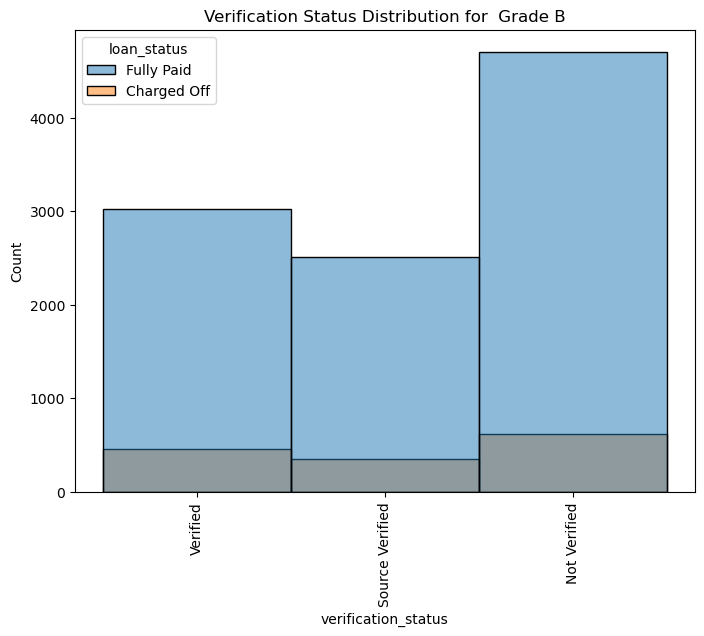

  Grade  C: Default Rate = 17.19%


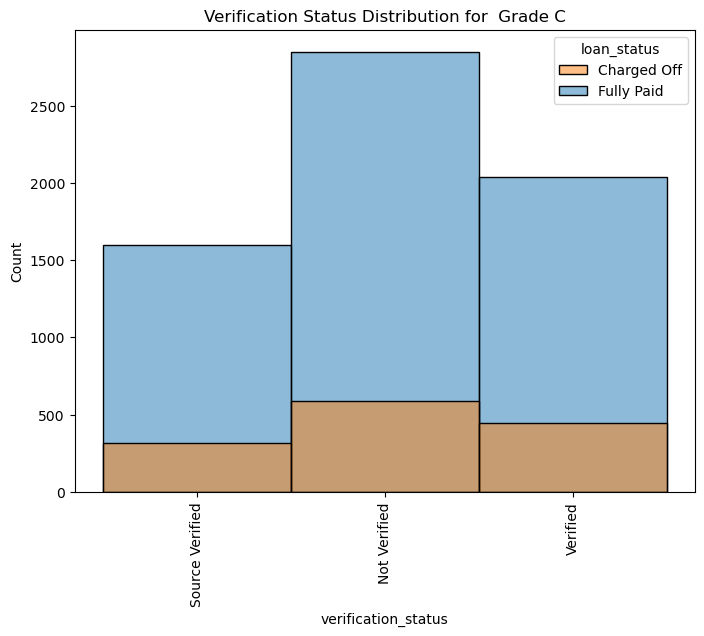

  Grade  D: Default Rate = 21.99%


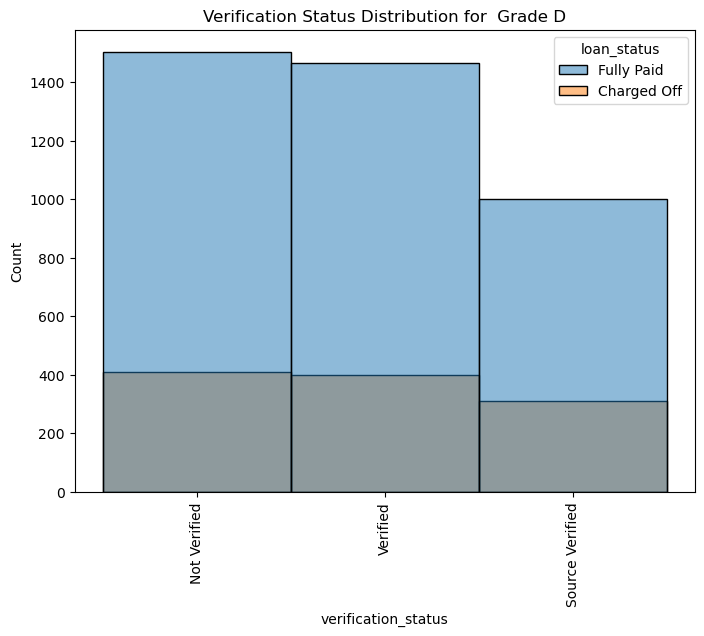

  Grade  E: Default Rate = 26.85%


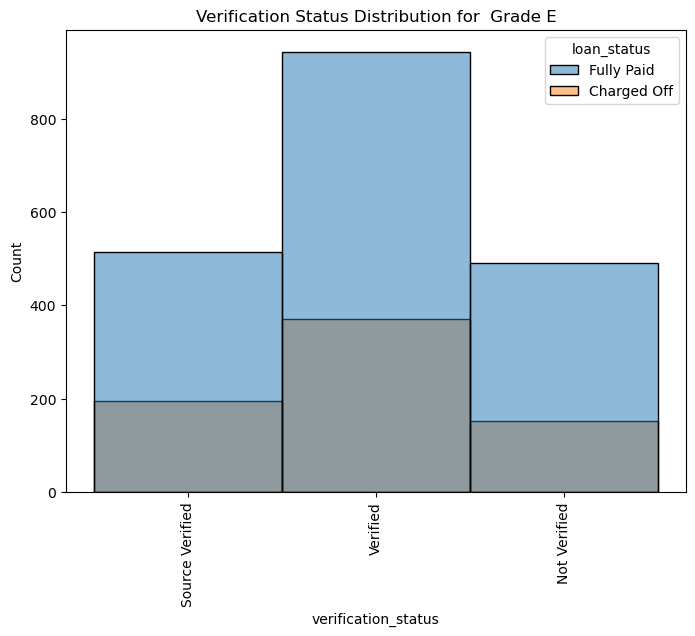

  Grade  F: Default Rate = 32.68%


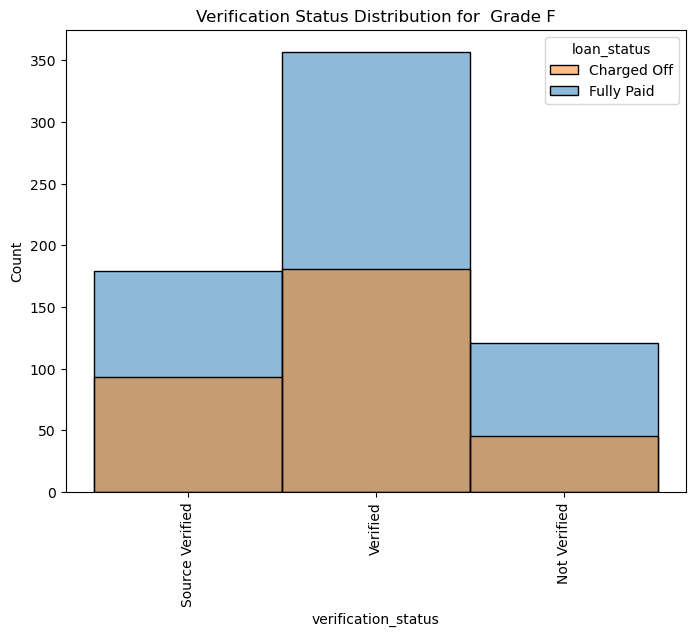

  Grade  G: Default Rate = 33.78%


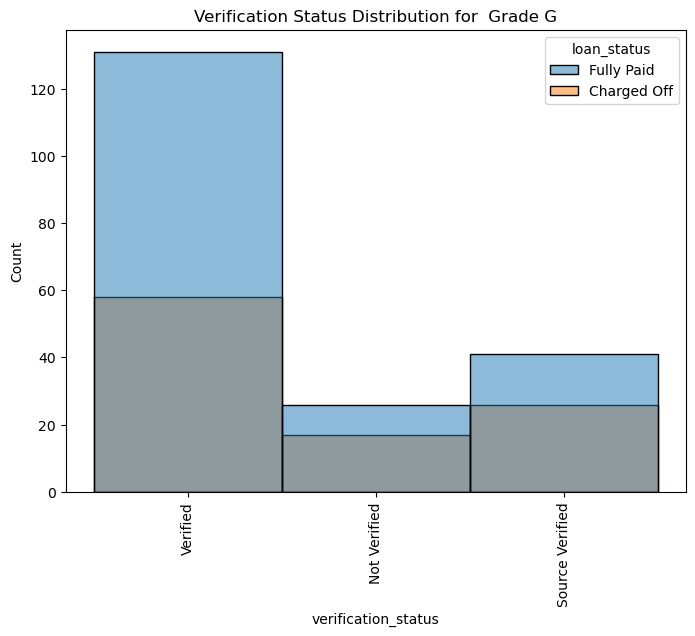

In [515]:
#Verification VS Loan Status Per grade


segmented_analysis_plot(loan_dataset,'grade','verification_status')

In [ ]:
#Poorly graded loan have high verification number. Seems issue in the process of verification

  Loan Term  36: Default Rate = 11.09%


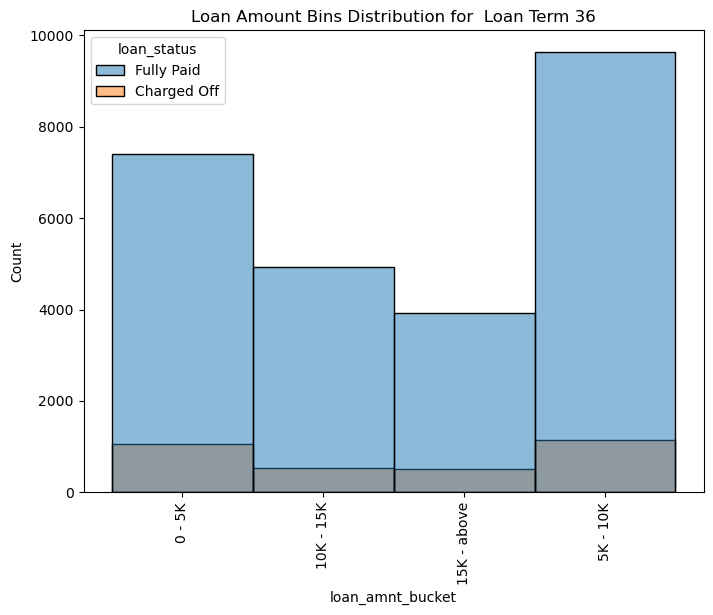

  Loan Term  60: Default Rate = 25.31%


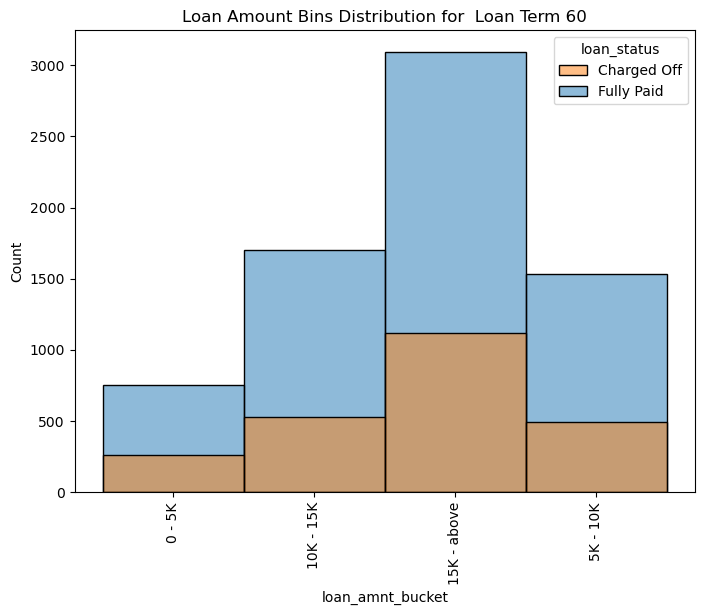

In [517]:
#Loan amount bin VS Loan Status Per term


segmented_analysis_plot(loan_dataset,'term','loan_amnt_bucket')

In [ ]:
# High term will result in higher charge off

  Loan Term  36: Default Rate = 11.09%


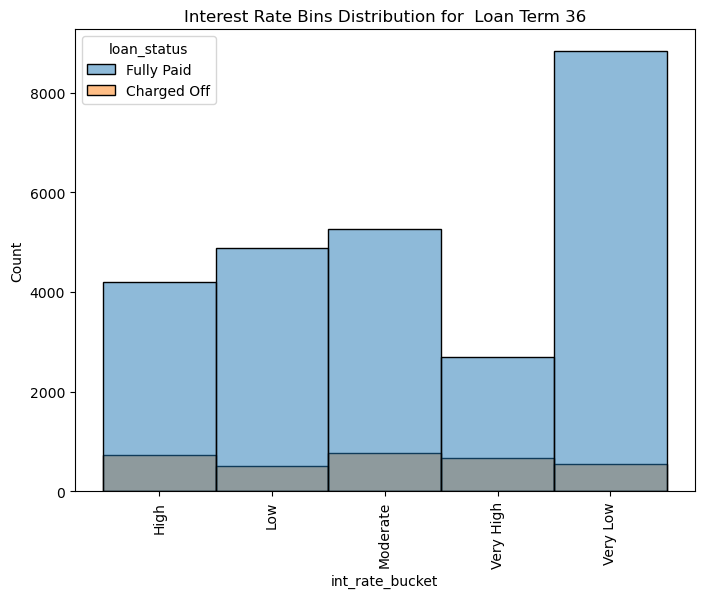

  Loan Term  60: Default Rate = 25.31%


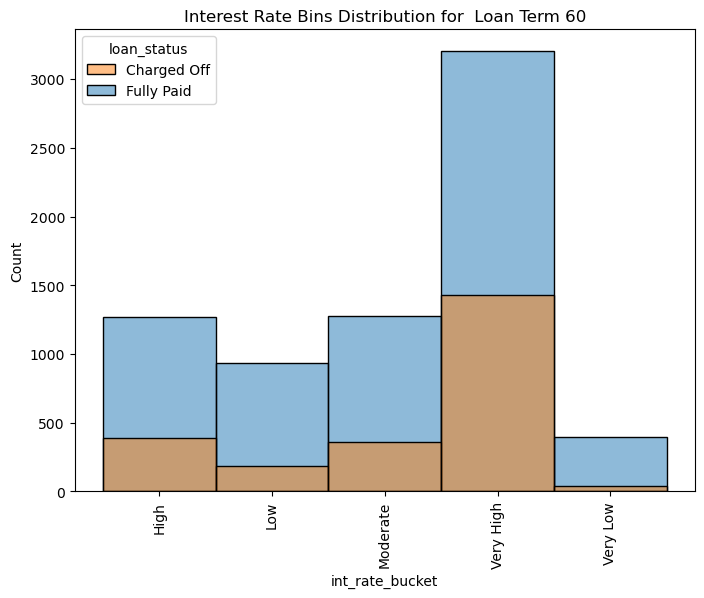

In [519]:
#interest rate bucket VS Loan Status Per term
segmented_analysis_plot(loan_dataset,'term','int_rate_bucket')

In [ ]:
# High term with high interest rate will result in charge off

  DTI Bins  0-5: Default Rate = 12.39%


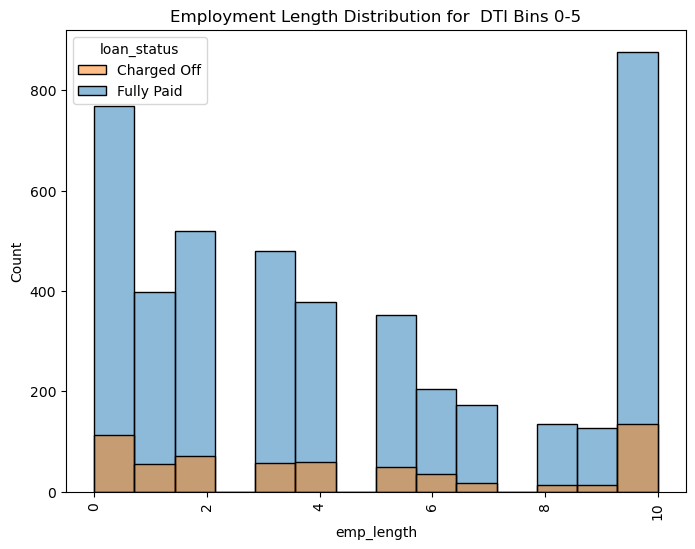

  DTI Bins  10-15: Default Rate = 14.54%


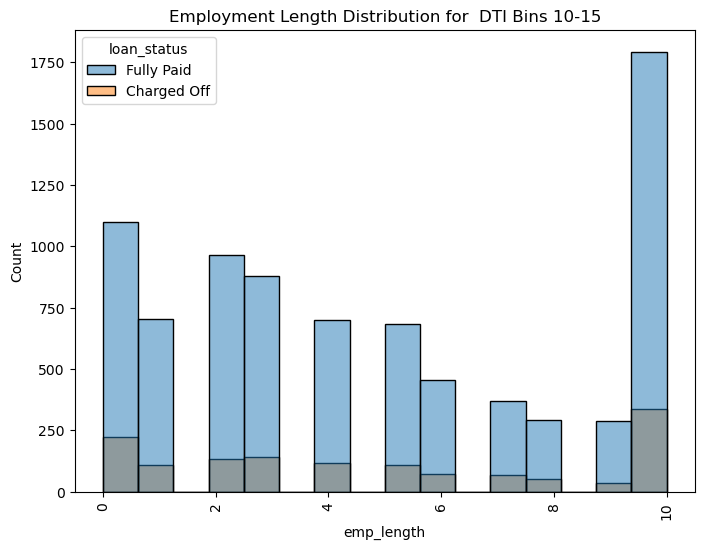

  DTI Bins  15-20: Default Rate = 15.80%


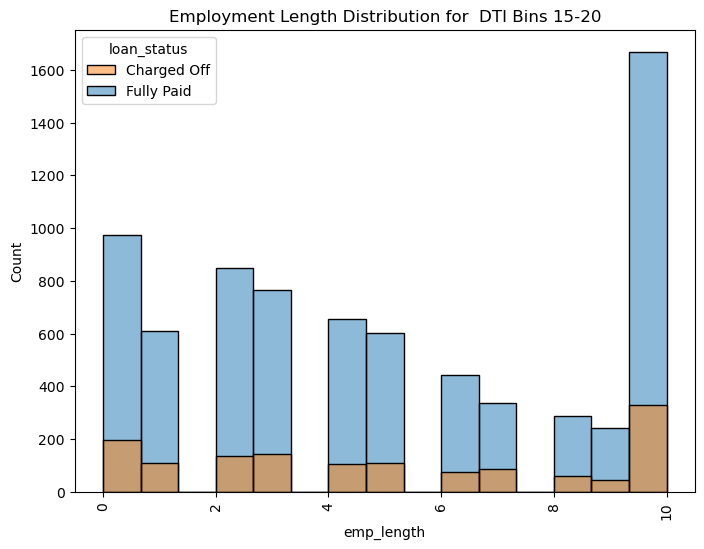

  DTI Bins  20-25: Default Rate = 16.99%


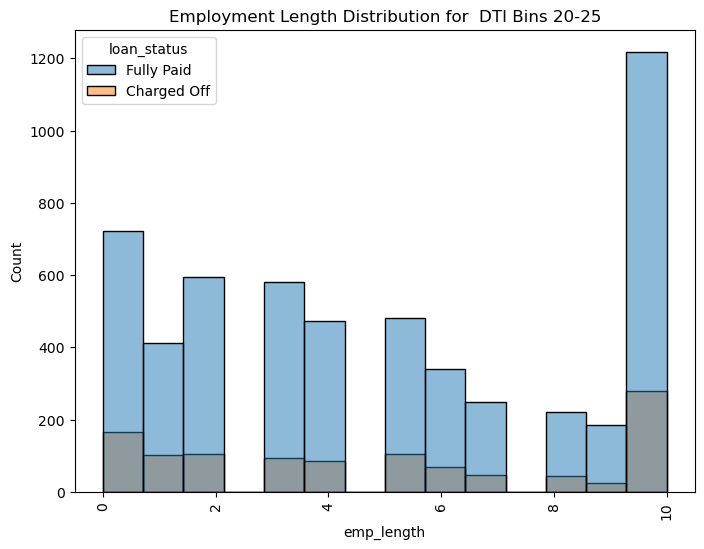

  DTI Bins  25+: Default Rate = 13.92%


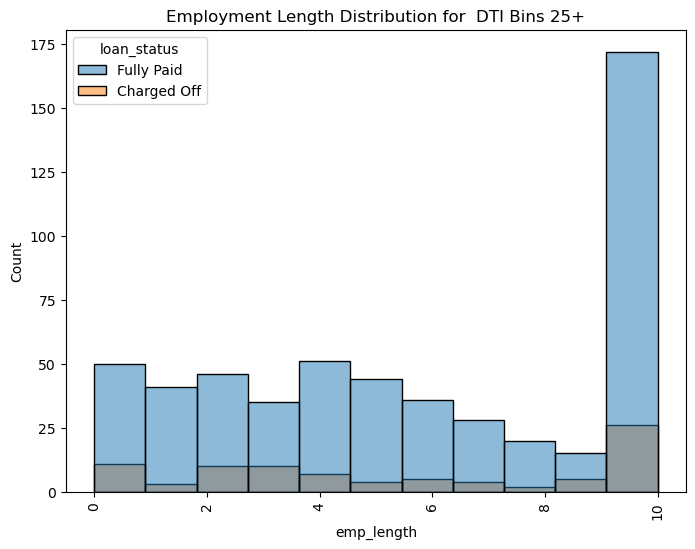

  DTI Bins  5-10: Default Rate = 12.73%


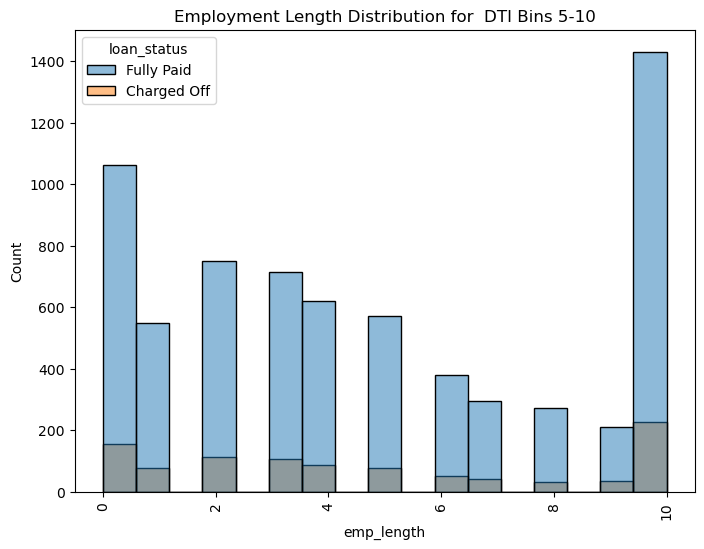

In [525]:

#emp_length VS Loan Status Per  dti_bucket
segmented_analysis_plot(loan_dataset,'dti_bucket','emp_length')
# DTI bin from  10 to 25 with 10+ year has higher chance of defaulting

  Verification Status  Not Verified: Default Rate = 12.83%


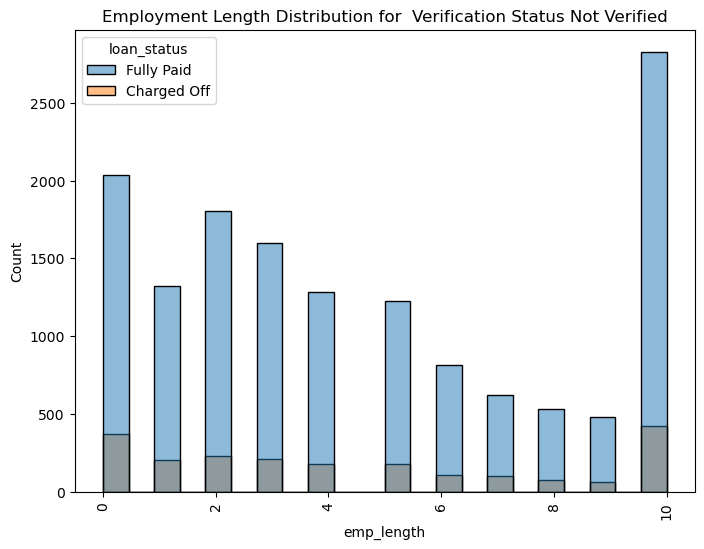

  Verification Status  Source Verified: Default Rate = 14.82%


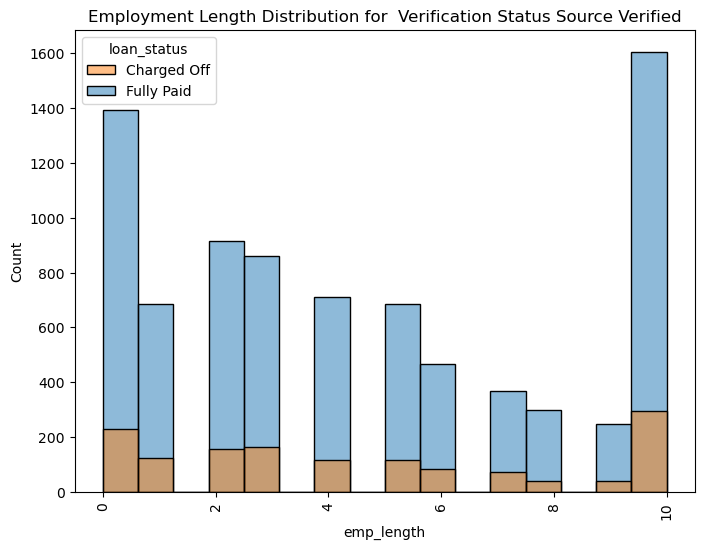

  Verification Status  Verified: Default Rate = 16.80%


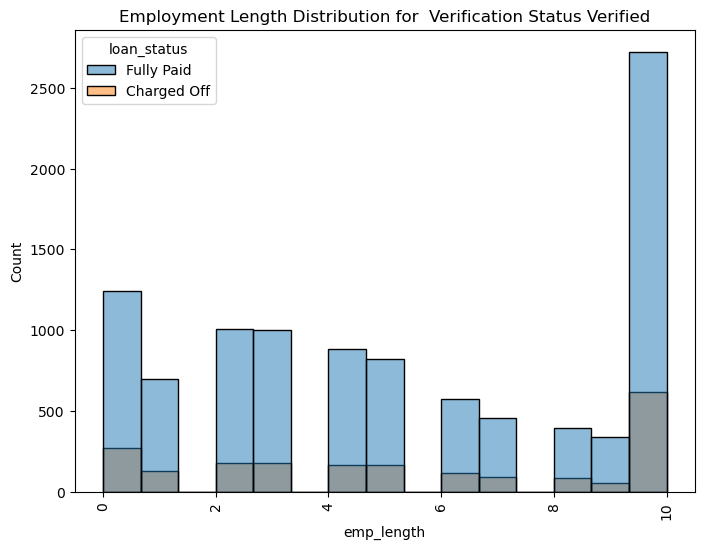

In [521]:

#Loan amount bin VS Loan Status Per  emp_length
segmented_analysis_plot(loan_dataset,'emp_length','loan_amnt_b')

In [ ]:
## If we give higher loan amount to employee with high emp_length is resulting ind default.

In [ ]:



# Select the numerical features for correlation analysis
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'emp_length', 'pub_rec_bankruptcies']

# Handle missing values (important for correlation calculation)
# You can use different strategies like imputation or dropping rows with missing values
loan_data_numerical = loan_dataset[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'emp_length', 'pub_rec_bankruptcies']]  # Drop rows with any missing values for simplicity

# Calculate the Pearson correlation matrix
correlation_matrix = loan_data_numerical.corr(method='pearson')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #fmt for 2 decimal places
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

# Print the correlation matrix as a table if needed
print("\nCorrelation Matrix:")
print(correlation_matrix)

#Further analysis based on the correlation matrix
# Example: Check correlation between loan amount and installment
correlation_loan_installment = correlation_matrix.loc['loan_amnt', 'installment']
print(f"\nCorrelation between Loan Amount and Installment: {correlation_loan_installment:.2f}")

# Example: Check correlation between interest rate and other variables
print("\nCorrelation with Interest Rate:")
print(correlation_matrix['int_rate'])

In [ ]:
### There is a negative correlation between dti and income. 
### installment and loan amount has high positive correlation

In [ ]:
#Pair plot

def plot_pairplot(df, numerical_features, hue_column=None):
    """Plots a pairplot for specified numerical features."""

    plt.figure(figsize=(12,12))
    if hue_column:
        sns.pairplot(df[numerical_features + [hue_column]], hue=hue_column, diag_kind='kde')
    else:
        sns.pairplot(df[numerical_features], diag_kind='kde')
    plt.show()

# Example usage with numerical features and hue:
numerical_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'emp_length', 'pub_rec_bankruptcies']
plot_pairplot(loan_dataset, numerical_features, hue_column='loan_status')



In [ ]:
generic_multivariate_scatter(loan_dataset, 'loan_amnt', 'int_rate', hue_col='loan_status')
##There's a higher concentration of "Charged Off" points at the higher end of the interest rate range, suggesting that loans with very high interest rates are more likely to default.
##Low Interest Rate Cluster: There's a dense cluster of "Fully Paid" loans at the lower end of the interest rate spectrum (around 5-7%), spanning various loan amounts. These could be loans with excellent credit scores or secured loans with lower risk.


In [ ]:
## Line chart

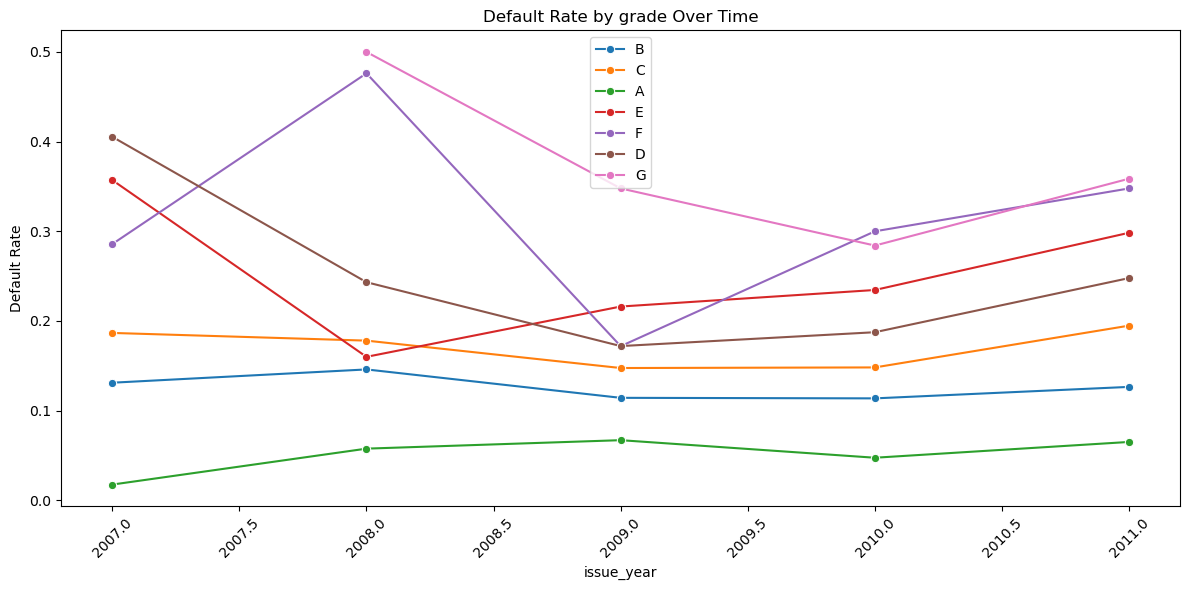

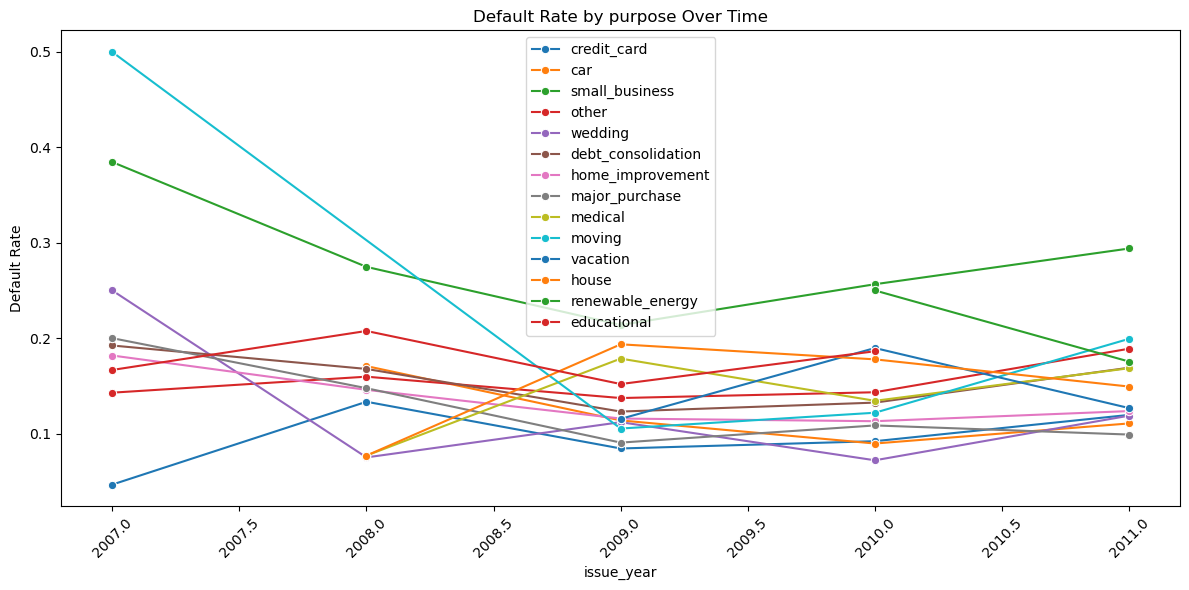

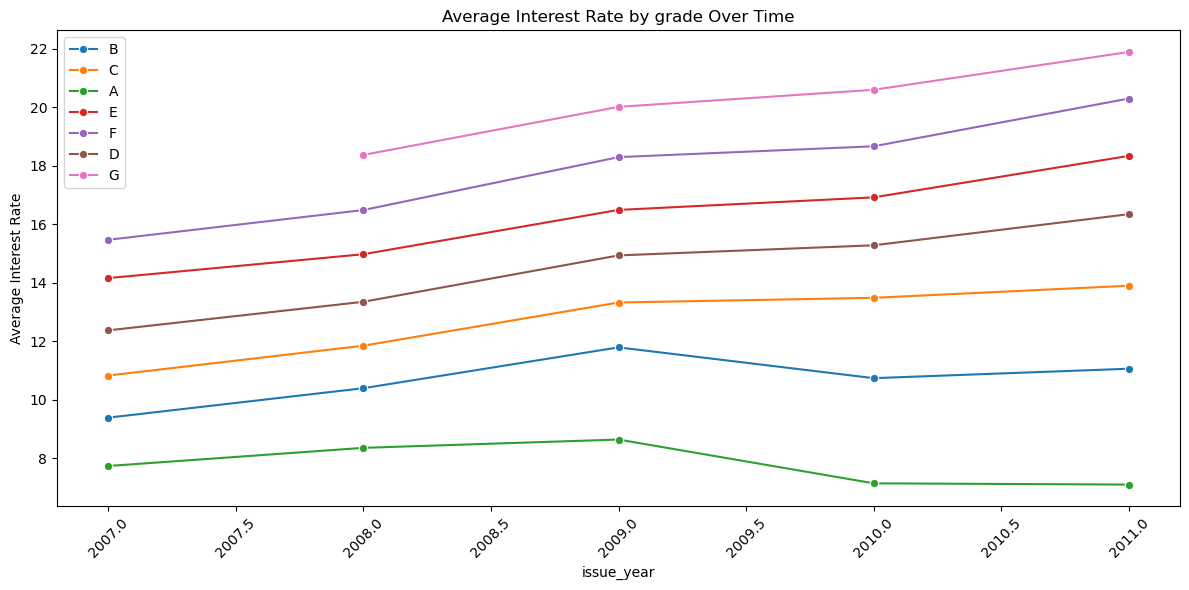

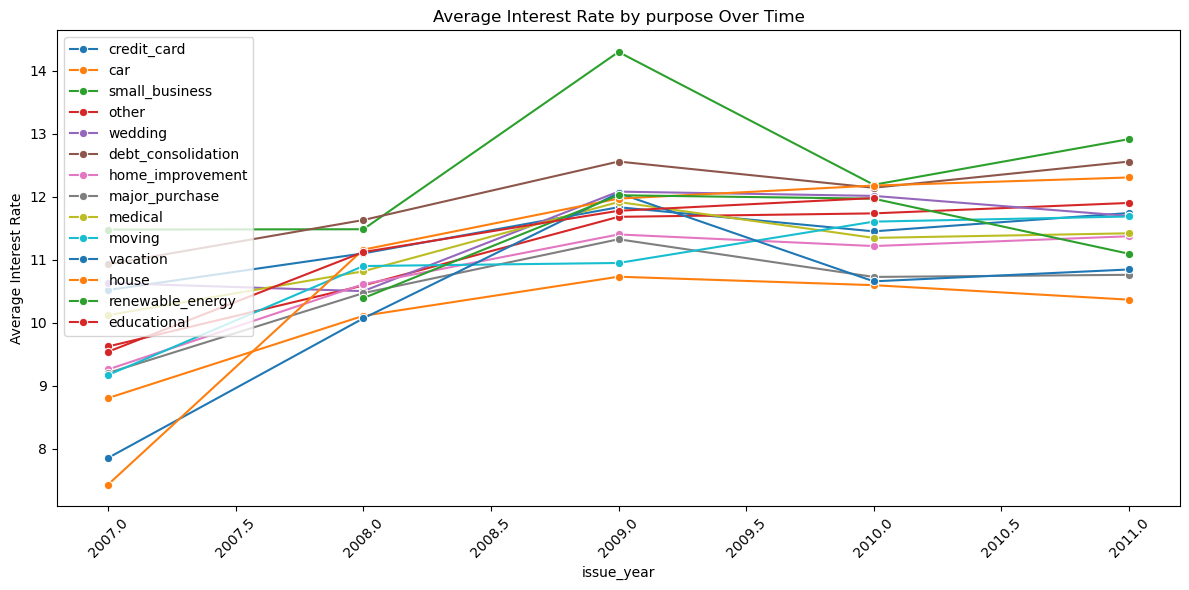

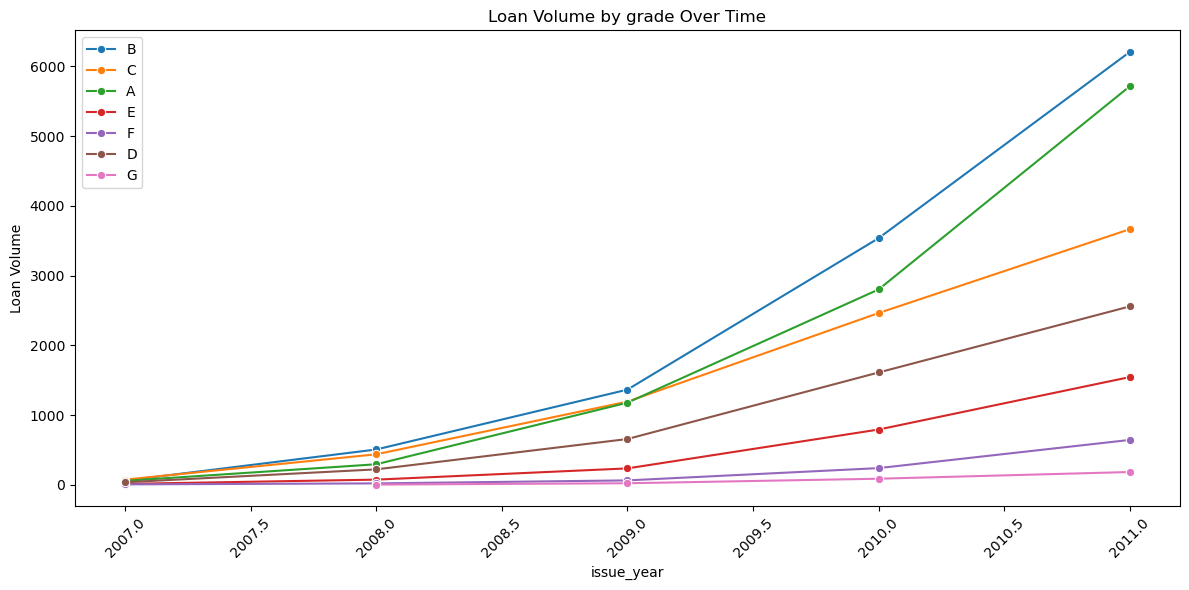

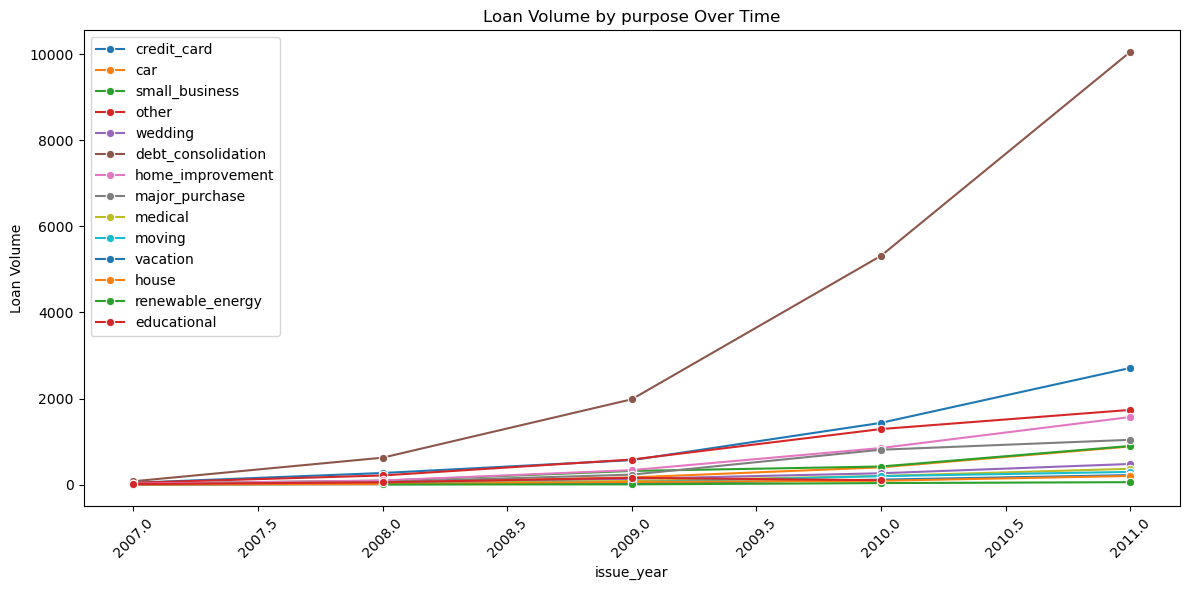

In [533]:


def plot_loan_volume_over_time(df, time_unit='year'):
    """Plots loan volume over time."""
    if time_unit == 'year':
        time_series = df.groupby('issue_year').size()
        plt.xlabel('Issue Year')
        title = 'Loan Volume by Year'
    elif time_unit == 'month':
        time_series = df.groupby(['issue_year', 'issue_month']).size()
        plt.xlabel('Issue Month')
        title = 'Loan Volume by Month'
    else:
        raise ValueError("time_unit must be 'year' or 'month'")

    plt.figure(figsize=(10, 6))
    time_series.plot(kind='line', marker='o')
    plt.title(title)
    plt.ylabel('Loan Volume')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_default_rate_over_time(df, time_unit='year'):
    """Plots default rate over time."""

    if time_unit == 'year':
        default_rate_by_time = df.groupby('issue_year')['loan_status'].value_counts(normalize=True).unstack()
        plt.xlabel('Issue Year')
        title = 'Default Rate by Year'
    elif time_unit == 'month':
        default_rate_by_time = df.groupby(['issue_year', 'issue_month'])['loan_status'].value_counts(normalize=True).unstack()
        plt.xlabel('Issue Month')
        title = 'Default Rate by Month'
    else:
        raise ValueError("time_unit must be 'year' or 'month'")

    plt.figure(figsize=(10, 6))
    if 'Charged Off' in default_rate_by_time: #handle cases where there is no charged off
        default_rate_by_time['Charged Off'].plot(kind='line', marker='o')
    plt.title(title)
    plt.ylabel('Default Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_avg_interest_rate_over_time(df, time_unit='year'):
    """Plots average interest rate over time."""
    if time_unit == 'year':
        avg_int_rate_by_time = df.groupby('issue_year')['int_rate'].mean()
        plt.xlabel('Issue Year')
        title = 'Average Interest Rate by Year'
    elif time_unit == 'month':
        avg_int_rate_by_time = df.groupby(['issue_year', 'issue_month'])['int_rate'].mean()
        plt.xlabel('Issue Month')
        title = 'Average Interest Rate by Month'
    else:
        raise ValueError("time_unit must be 'year' or 'month'")

    plt.figure(figsize=(10, 6))
    avg_int_rate_by_time.plot(kind='line', marker='o')
    plt.title(title)
    plt.ylabel('Average Interest Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_trends_by_category(df, category, time_unit='year', metric='default_rate'):
    """Plots trends by category (grade or purpose)."""
    # Filter out 'Current' loans
    df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]
    if time_unit == 'year':
        time_col = 'issue_year'
    elif time_unit == 'month':
        time_col = ['issue_year', 'issue_month']
    else:
        raise ValueError("time_unit must be 'year' or 'month'")
    
    plt.figure(figsize=(12, 6))
    for cat in df[category].unique():
        cat_df = df[df[category] == cat]
        if metric == 'default_rate':
            trend = cat_df.groupby(time_col)['loan_status'].value_counts(normalize=True).unstack()
            if 'Charged Off' in trend:
                sns.lineplot(data=trend, x=trend.index, y='Charged Off', marker='o', label=cat)
            plt.ylabel('Default Rate')
            title = f'Default Rate by {category} Over Time'
        elif metric == 'int_rate':
            trend = cat_df.groupby(time_col)['int_rate'].mean()
            sns.lineplot(x=trend.index, y=trend, marker='o', label=cat)
            plt.ylabel('Average Interest Rate')
            title = f'Average Interest Rate by {category} Over Time'
        elif metric == 'loan_volume':
            trend = cat_df.groupby(time_col).size()
            sns.lineplot(x=trend.index, y=trend, marker='o', label=cat)
            plt.ylabel('Loan Volume')
            title = f'Loan Volume by {category} Over Time'
        else:
            raise ValueError("metric must be 'default_rate' or 'int_rate' or 'loan_volume'")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_trends_by_category(loan_dataset, 'grade', 'year', 'default_rate')
plot_trends_by_category(loan_dataset, 'purpose', 'year', 'default_rate')
plot_trends_by_category(loan_dataset, 'grade', 'year', 'int_rate')
plot_trends_by_category(loan_dataset, 'purpose', 'year', 'int_rate')
plot_trends_by_category(loan_dataset, 'grade', 'year', 'loan_volume')
plot_trends_by_category(loan_dataset, 'purpose', 'year', 'loan_volume')


#### Key Observations for line plot:

* Higher Grades Have Lower Default Rates: This is the most consistent and expected trend. Grades A and B consistently have the lowest default rates, followed by C, and then the lower grades (D, E, F, G) have progressively higher default rates. This reflects the risk assessment process; borrowers with better creditworthiness (higher grades) are less likely to default.
* Impact of the 2008 Financial Crisis: There's a noticeable spike in default rates across all grades around 2008-2009. This corresponds to the global financial crisis, which significantly impacted loan performance across the board. The crisis likely led to job losses, economic hardship, and increased difficulty for borrowers to repay their loans.
* Recovery After the Crisis: After the peak in 2008-2009, default rates generally declined, although some grades (especially the lower ones) saw a more gradual recovery.
* Volatility in Lower Grades: The lower grades (D, E, F, G) exhibit more volatility in their default rates compared to the higher grades. This suggests that these borrowers are more sensitive to economic fluctuations.
* Grade F and G: Grades F and G have very high default rates, especially around the financial crisis. This reinforces the idea that these are the riskiest borrowers.


## Bivariate and Multi Variate analysis

### Summary or Inference

- **Verification Status**: Verified loan are showing higher charged off rate

- **High-Risk Loan Purposes**: Debt consolidation and credit card loans exhibit a higher percentage of defaults, indicating that borrowers seeking these loans might be in a financially vulnerable position.

- **Loan Amount and Interest Rate**: Most defaults occur for loan amounts between $5,600 and $16,500, particularly in the $5,000 to $10,000 range. These loan amounts often carry high to very high-interest rates, increasing the likelihood of default.
- **High Interest Rate**:  High interest rate  generally have high defaulting rates.

- **Grade and Homeownership**: Loan grade is negatively correlated with defaulting, implying that lower-grade loans are riskier. Additionally, loan applicants who do not own a house have a higher defaulting rate.
    * Low grade loan had a much more higher rate of defaulting during 2008 financial crisis.

- **Employment Tenure**: Unexpectedly, customers with longer employment tenures have a higher defaulting rate. This further investigated using pair plot and details mentioned in below point.

  * **Loan Amount and Employment Tenure Interaction**: As per pair plot, customer with higher amount of loan.Higher amount is   linked to higher interest. All these factor result in higher defaulting
  * **Confounding Factors for employee tenure**: It's possible that other confounding factors are at play, such as:
    * Age: Longer-tenured employees are likely older and might have different financial priorities or life events that impact their ability to repay (e.g., children's education, medical expenses).
    * Complacency: Lenders might be more lenient with underwriting standards for longer-tenured employees, assuming lower risk, which could lead to approving some riskier loans.

- **Bankruptcies and DTI**: A higher count of bankruptcies increases the chance of defaulting. High DTI is also a cause of defaulting, and it is negatively correlated with annual income, suggesting that high DTI often implies lower annual income.

- **Installment and Loan Term**: Installment and loan amount have a high positive correlation. Large-term loans with high-interest rates increase the likelihood of defaulting.

### Suggestions
 - Lending club need to re-examine its application verification process. A large portion of verified application are getting defaulted, it is either incompentency at the verification team end or some sort of corruption is involved.
 - If loan amount is less, then we should try to cap the loan term to 36 month.
 - If loan amount is high, we should have a combination higher tenure with medium interest rate. In long term, it will help in recovery of larger amount for investor.
 - Lenders need to be prepared for increased defaults during economic downturns. Lender could choose to lend less to lower-grade borrowers, especially during uncertain economic times, or charge significantly higher interest rates to compensate for the increased risk.
 - Implement stricter criteria for debt consolidation and credit card refinancing loans, including lower loan amounts, higher credit score requirements, and stricter DTI limits.
 - Verify the payoff of existing debts for debt consolidation loans to ensure responsible use of funds.
 - Implement risk-based pricing, adjusting interest rates based on borrower risk profiles.
 - Continuously monitor the relationship between interest rates and defaults to optimize pricing strategies.
 - Perform thorough background checks for bankruptcies and consider stricter criteria for applicants with a history of bankruptcies.
 - Enforce stricter DTI limits, especially for higher loan amounts or longer loan terms.
 - Encourage shorter loan terms, especially for higher-risk borrowers, to reduce overall interest paid and the risk of default.
 - For customer with long employement tenure, following factor need to taken into consideration
    * we need to check DTI value (to see whether existing financial burder is there).
    * Make sure that proper verification and risk analysis is done and no Complacency is done due to tenure
    * Even for longer-tenured employees, apply stricter underwriting standards for larger loan amounts. Don't assume that employment tenure alone guarantees low risk.
    * Use a combination capped loan amount (based on DTI, income and other factor) with high interest- short tenure, or low/medium interest with high tenure.
 
